In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/emtech/gpt/llm-qa-bench-hf


In [3]:
from dotenv import find_dotenv, load_dotenv
from app_modules.utils import *
from eval_modules.calc_repetitions import *

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=False)

force_recalculate = os.getenv("FORCE_RECALCULATE", "False").lower() == "true"
print(f"force_recalculate: {force_recalculate}")

/Users/inflaton/anaconda3/envs/llm-qa-bench/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...


loading: /Users/inflaton/code/emtech/gpt/llm-qa-bench-hf/eval_modules/calc_repetitions.py
loading env vars from: /Users/inflaton/code/emtech/gpt/llm-qa-bench-hf/.env.example
force_recalculate: False


In [4]:
len(webqsp_csv_result_files), len(ms_marco_csv_result_files)

(27, 27)

## Performance Scores

In [5]:
%%time

webqsp_result = load_webqsp_result(webqsp_csv_result_files)

loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.000.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.020.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.040.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.060.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.080.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.100.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.120.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.140.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.160.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.180.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.200.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.220.csv
df len: 1008
loading result file: ./data/

In [9]:
ms_marco_result = load_ms_marco_result_v2(ms_marco_csv_result_files[:1])
ms_marco_result["gemma-1.1-2b-it(RAG - Generic Prompt)"]["df_overall"]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading: /Users/inflaton/code/emtech/gpt/llm-qa-bench-hf/eval_modules/calc_repetitions.py
	model_name: gemma-1.1-2b-it(RAG - Generic Prompt)
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.000.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.020.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.040.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.060.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.080.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.100.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.120.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.140.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.160.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.180.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.200.csv
loading resu

model  repetition_penalty  word_count  inference_time  \
0   gemma-1.1-2b-it                1.00       13168      768.442492   
1   gemma-1.1-2b-it                1.02       12869      754.207930   
2   gemma-1.1-2b-it                1.04       12619      742.989720   
3   gemma-1.1-2b-it                1.06       12437      746.045151   
4   gemma-1.1-2b-it                1.08       12426      720.982495   
5   gemma-1.1-2b-it                1.10       12117      738.784031   
6   gemma-1.1-2b-it                1.12       12065      741.645677   
7   gemma-1.1-2b-it                1.14       11973      734.419552   
8   gemma-1.1-2b-it                1.16       11888      741.400211   
9   gemma-1.1-2b-it                1.18       11543      725.272796   
10  gemma-1.1-2b-it                1.20       11242      701.319989   
11  gemma-1.1-2b-it                1.22       11058      701.272297   
12  gemma-1.1-2b-it                1.24       10979      692.526211   
13  gemma-1.1-2b-it                1.26       11047      693.865983   
14  gemma-1.1-2b-it                1.28       10982      683.156549   
15  gemma-1.1-2b-it                1.30       11180      730.242093   

    inference_speed     bleu1    rougeL  answer_len  meteor_scores  \
0         17.135960  0.303934  0.351767     139.628       0.279687   
1         17.062934  0.302241  0.352723     136.162       0.279210   
2         16.984084  0.301466  0.353336     133.282       0.279232   
3         16.670573  0.299393  0.355385     131.400       0.278215   
4         17.234815  0.297423  0.354342     131.386       0.277372   
5         16.401275  0.291461  0.354067     128.430       0.274854   
6         16.267876  0.288148  0.353023     127.950       0.275090   
7         16.302671  0.290650  0.355663     126.860       0.276586   
8         16.034525  0.289390  0.356829     125.690       0.277128   
9         15.915391  0.285934  0.358654     122.796       0.275886   
10        16.029773  0.280741  0.358438     119.550       0.274903   
11        15.768483  0.280613  0.357157     117.690       0.272773   
12        15.853552  0.275948  0.356635     116.960       0.271547   
13        15.920942  0.276687  0.355107     117.670       0.270749   
14        16.075378  0.279184  0.354267     117.226       0.270684   
15        15.309991  0.280033  0.354124     118.818       0.271965   

    newline_score  repetition_score  total_repetitions      perf       rap  
0             0.0             0.868              0.868  0.279687  0.269930  
1             0.0             0.834              0.834  0.279210  0.269823  
2             0.0             0.834              0.834  0.279232  0.269844  
3             0.0             0.834              0.834  0.278215  0.268861  
4             0.0             0.834              0.834  0.277372  0.268047  
5             0.0             0.834              0.834  0.274854  0.265614  
6             0.0             1.480              1.480  0.275090  0.259533  
7             0.0             1.182              1.182  0.276586  0.263787  
8             0.0             0.532              0.532  0.277128  0.271027  
9             0.0             0.530              0.530  0.275886  0.269834  
10            0.0             0.388              0.388  0.274903  0.270432  
11            0.0             0.388              0.388  0.272773  0.268337  
12            0.0             0.388              0.388  0.271547  0.267131  
13            0.0             0.388              0.388  0.270749  0.266346  
14            0.0             0.388              0.388  0.270684  0.266282  
15            0.0             0.348              0.348  0.271965  0.267984

In [10]:
ms_marco_result = load_ms_marco_result_v2(ms_marco_csv_result_files)

	model_name: gemma-1.1-2b-it(RAG - Generic Prompt)
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.000.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.020.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.040.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.060.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.080.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.100.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.120.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.140.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.160.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.180.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.200.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.220.csv
loading result file: data

In [11]:
list(webqsp_result.keys())

['gemma-1.1-2b-it(RAG - Generic Prompt)',
 'gemma-1.1-2b-it(RAG - Chat Template)',
 'gemma-1.1-2b-it(Non-RAG)',
 'Phi-3-mini-128k-instruct(RAG - Generic Prompt)',
 'Phi-3-mini-128k-instruct(RAG - Chat Template)',
 'Phi-3-mini-128k-instruct(Non-RAG)',
 'gemma-1.1-7b-it(RAG - Generic Prompt)',
 'gemma-1.1-7b-it(RAG - Chat Template)',
 'gemma-1.1-7b-it(Non-RAG)',
 'Llama-2-7b-chat-hf(RAG - Generic Prompt)',
 'Llama-2-7b-chat-hf(RAG - Chat Template)',
 'Llama-2-7b-chat-hf(Non-RAG)',
 'Mistral-7B-Instruct-v0.2(RAG - Generic Prompt)',
 'Mistral-7B-Instruct-v0.2(RAG - Chat Template)',
 'Mistral-7B-Instruct-v0.2(Non-RAG)',
 'Meta-Llama-3-8B-Instruct(RAG - Generic Prompt)',
 'Meta-Llama-3-8B-Instruct(RAG - Chat Template)',
 'Meta-Llama-3-8B-Instruct(Non-RAG)',
 'Llama-2-13b-chat-hf(RAG - Generic Prompt)',
 'Llama-2-13b-chat-hf(RAG - Chat Template)',
 'Llama-2-13b-chat-hf(Non-RAG)',
 'Llama-2-70b-chat-hf(RAG - Generic Prompt)',
 'Llama-2-70b-chat-hf(RAG - Chat Template)',
 'Llama-2-70b-chat-hf(N

In [12]:
list(ms_marco_result.keys())

['gemma-1.1-2b-it(RAG - Generic Prompt)',
 'gemma-1.1-2b-it(RAG - Chat Template)',
 'gemma-1.1-2b-it(Non-RAG)',
 'Phi-3-mini-128k-instruct(RAG - Generic Prompt)',
 'Phi-3-mini-128k-instruct(RAG - Chat Template)',
 'Phi-3-mini-128k-instruct(Non-RAG)',
 'gemma-1.1-7b-it(RAG - Generic Prompt)',
 'gemma-1.1-7b-it(RAG - Chat Template)',
 'gemma-1.1-7b-it(Non-RAG)',
 'Llama-2-7b-chat-hf(RAG - Generic Prompt)',
 'Llama-2-7b-chat-hf(RAG - Chat Template)',
 'Llama-2-7b-chat-hf(Non-RAG)',
 'Mistral-7B-Instruct-v0.2(RAG - Generic Prompt)',
 'Mistral-7B-Instruct-v0.2(RAG - Chat Template)',
 'Mistral-7B-Instruct-v0.2(Non-RAG)',
 'Meta-Llama-3-8B-Instruct(RAG - Generic Prompt)',
 'Meta-Llama-3-8B-Instruct(RAG - Chat Template)',
 'Meta-Llama-3-8B-Instruct(Non-RAG)',
 'Llama-2-13b-chat-hf(RAG - Generic Prompt)',
 'Llama-2-13b-chat-hf(RAG - Chat Template)',
 'Llama-2-13b-chat-hf(Non-RAG)',
 'Llama-2-70b-chat-hf(RAG - Generic Prompt)',
 'Llama-2-70b-chat-hf(RAG - Chat Template)',
 'Llama-2-70b-chat-hf(N

In [13]:
for w, m in zip(webqsp_result.keys(), ms_marco_result.keys()):
    assert w == m, f"`{w}` != `{m}`"

In [14]:
results = {"WebQSP": webqsp_result, "MS MARCO": ms_marco_result}

In [15]:
ms_marco_result["Meta-Llama-3-8B-Instruct(RAG - Generic Prompt)"][
    "df_list_repetition_penalty"
][0]

id                                           question  \
0     15177                               albany mn population   
1    114414                     current weather in volcano, ca   
2      9083  ____________________ is considered the father ...   
3    281439  how many days is an appraisal good for a fanni...   
4     40287                       average pharmacy tech salary   
..      ...                                                ...   
495  518269                            the pool shower company   
496  442806          longest tenured american football players   
497  460250                   mt. view baptist in pendleton sc   
498  549739               what actress disappeared for a while   
499  658265                what ethnicity is the surname sabol   

                                                answer  word_count  \
0     According to the 2010 census, the population ...          70   
1     According to the provided weather forecast, t...         106   
2     Hippocrates. [ \n\nHippocrates is considered ...        1942   
3     An appraisal for a Fannie Mae loan is good fo...        1855   
4     According to the text, the average pharmacy t...        1790   
..                                                 ...         ...   
495   The Pool Shower Company is a company that spe...        1698   
496   Hanson is the only active NFL-er that was a m...        1641   
497   The address of Mount View Baptist Church in P...          78   
498   Honeysuckle Weeks, the actress who starred in...        1787   
499   The surname Sabol is of African-Nguni origin....          25   

                                          ground_truth  newline_score  \
0    ['The population of Albany, Minnesota is 2,662...              0   
1    ['The Volcano forecast for Apr 12 is 52 degree...              0   
2    ['Hippocrates is considered the father of mode...              0   
3    ['An appraisal is good for 120 days from the d...              0   
4    ['The average salary for a pharmacy technician...              0   
..                                                 ...            ...   
495  ['The Pool Shower, Inc. is a Georgia Domestic ...              0   
496  ['Hanson is the longest tenured American footb...              0   
497  ['Mount Able Baptist Church is located at the ...              0   
498  ['The actress disappeared for a while Honeysuc...              0   
499  ['The ethnicity of the surname Sabol is Africa...              0   

     repetition_score  total_repetitions  answer_len  
0                   0                  0         354  
1                   0                  0         510  
2               10916              10916       10943  
3                8346               8346        8880  
4                9352               9352       10235  
..                ...                ...         ...  
495              7670               7670        8281  
496              8358               8358        9087  
497                 0                  0         379  
498              7884               7884        9314  
499                 0                  0         124  

[500 rows x 9 columns]

In [16]:
ms_marco_result["Meta-Llama-3-8B-Instruct(RAG - Generic Prompt)"]["df_overall"]

model  repetition_penalty  word_count  inference_time  \
0   Meta-Llama-3-8B-Instruct                1.00      539033    18544.462751   
1   Meta-Llama-3-8B-Instruct                1.02      442757    15389.006496   
2   Meta-Llama-3-8B-Instruct                1.04      367055    12818.961329   
3   Meta-Llama-3-8B-Instruct                1.06      320290    11154.161998   
4   Meta-Llama-3-8B-Instruct                1.08      260588     8877.137683   
5   Meta-Llama-3-8B-Instruct                1.10      212182     7148.137865   
6   Meta-Llama-3-8B-Instruct                1.12      185486     6184.505262   
7   Meta-Llama-3-8B-Instruct                1.14      151949     5181.290157   
8   Meta-Llama-3-8B-Instruct                1.16      138526     4710.395158   
9   Meta-Llama-3-8B-Instruct                1.18      118540     3971.562125   
10  Meta-Llama-3-8B-Instruct                1.20       98276     3589.737776   
11  Meta-Llama-3-8B-Instruct                1.22      103164     3514.781682   
12  Meta-Llama-3-8B-Instruct                1.24      102830     3627.801693   
13  Meta-Llama-3-8B-Instruct                1.26      106650     3657.039531   
14  Meta-Llama-3-8B-Instruct                1.28      107863     3738.154798   
15  Meta-Llama-3-8B-Instruct                1.30      114193     4108.954028   

    inference_speed     bleu1    rougeL  answer_len  meteor_scores  \
0         29.067059  0.015785  0.098054    5513.498       0.157257   
1         28.770993  0.018354  0.122313    4544.118       0.184347   
2         28.633755  0.021353  0.139836    3804.808       0.204908   
3         28.714842  0.024014  0.147398    3280.840       0.217568   
4         29.354958  0.029212  0.165970    2689.884       0.234429   
5         29.683535  0.034992  0.171291    2194.586       0.243584   
6         29.992051  0.038411  0.179270    1896.074       0.248781   
7         29.326480  0.045939  0.180931    1589.444       0.251817   
8         29.408573  0.049988  0.178638    1475.550       0.250068   
9         29.847198  0.057773  0.182844    1263.596       0.255136   
10        27.376930  0.067948  0.182096    1080.602       0.259133   
11        29.351467  0.063382  0.174693    1140.032       0.252649   
12        28.344989  0.059127  0.162428    1144.346       0.239877   
13        29.162933  0.057577  0.158124    1158.190       0.234670   
14        28.854610  0.054099  0.146744    1226.414       0.223924   
15        27.791258  0.048500  0.134673    1382.508       0.214855   

    newline_score  repetition_score  total_repetitions      perf       rap  
0           0.820          4213.944           4214.764  0.157257  0.043372  
1           0.000          3378.542           3378.542  0.184347  0.052223  
2           0.000          2754.910           2754.910  0.204908  0.059537  
3           5.138          2233.720           2238.858  0.217568  0.064908  
4           0.000          1682.928           1682.928  0.234429  0.072609  
5           0.052          1176.850           1176.902  0.243584  0.079229  
6           0.000           924.796            924.796  0.248781  0.083744  
7           0.134           594.924            595.058  0.251817  0.090523  
8           0.104           457.552            457.656  0.250068  0.093661  
9           0.858           241.692            242.550  0.255136  0.106203  
10          0.808           132.172            132.980  0.259133  0.120232  
11          1.678           106.048            107.726  0.252649  0.122001  
12          3.726            38.766             42.492  0.239877  0.139456  
13          4.186            74.390             78.576  0.234670  0.120509  
14          4.790            49.608             54.398  0.223924  0.123792  
15          4.510            22.200             26.710  0.214855  0.137307

In [17]:
calc_rap_scores(
    ms_marco_result["Meta-Llama-3-8B-Instruct(RAG - Generic Prompt)"],
    precision="bleu1",
    recall="rougeL",
)

([0.82,
  0.0,
  0.0,
  5.138,
  0.0,
  0.052,
  0.0,
  0.134,
  0.104,
  0.858,
  0.808,
  1.678,
  3.726,
  4.186,
  4.79,
  4.51],
 [4213.944,
  3378.542,
  2754.91,
  2233.72,
  1682.928,
  1176.85,
  924.796,
  594.924,
  457.552,
  241.692,
  132.172,
  106.048,
  38.766,
  74.39,
  49.608,
  22.2],
 [0.02719201846793996,
  0.031917799844163264,
  0.03704926996674215,
  0.04129956541175274,
  0.049680666585778924,
  0.058112305023558526,
  0.06326662169012268,
  0.07327414013002626,
  0.07811625049131313,
  0.08780241455580858,
  0.0989673708788816,
  0.09301582486156491,
  0.08669541711344392,
  0.0844163453733729,
  0.07905422660832272,
  0.07131614693041032],
 [0.007499586316265119,
  0.00904183667108327,
  0.010764876226149512,
  0.012321012290135868,
  0.015387497476160706,
  0.018901907399804217,
  0.021296752596476152,
  0.02634057766705406,
  0.02925782795089062,
  0.036548592242804885,
  0.04591866812221424,
  0.04491625142787879,
  0.05040158355238035,
  0.0433500996214

In [18]:
ms_marco_result["Meta-Llama-3-8B-Instruct(RAG - Generic Prompt)"][
    "df_overall"
].describe()

repetition_penalty     word_count  inference_time  inference_speed  \
count           16.000000      16.000000       16.000000        16.000000   
mean             1.150000  210586.375000     7263.505646        28.980102   
std              0.095219  137827.230092     4767.319553         0.708537   
min              1.000000   98276.000000     3514.781682        27.376930   
25%              1.075000  107559.750000     3717.875981        28.694570   
50%              1.150000  145237.500000     4945.842658        29.114996   
75%              1.225000  275513.500000     9446.393762        29.368361   
max              1.300000  539033.000000    18544.462751        29.992051   

           bleu1     rougeL   answer_len  meteor_scores  newline_score  \
count  16.000000  16.000000    16.000000      16.000000      16.000000   
mean    0.042903   0.157831  2211.530625       0.229563       1.675250   
std     0.017111   0.024658  1378.768064       0.028251       2.018153   
min     0.015785   0.098054  1080.602000       0.157257       0.000000   
25%     0.027913   0.145017  1209.358000       0.216890       0.039000   
50%     0.047220   0.164199  1532.497000       0.237273       0.814000   
75%     0.057626   0.178796  2837.623000       0.250506       3.841000   
max     0.067948   0.182844  5513.498000       0.259133       5.138000   

       repetition_score  total_repetitions       perf        rap  
count         16.000000          16.000000  16.000000  16.000000  
mean        1130.190125        1131.865375   0.229563   0.094332  
std         1342.795801        1342.107678   0.028251   0.030862  
min           22.200000          26.710000   0.157257   0.043372  
25%           98.133500         100.438500   0.216890   0.070684  
50%          526.238000         526.357000   0.237273   0.092092  
75%         1820.626000        1821.910500   0.250506   0.120882  
max         4213.944000        4214.764000   0.259133   0.139456

In [19]:
ms_marco_result["Meta-Llama-3-8B-Instruct(RAG - Chat Template)"][
    "df_overall"
].describe()

repetition_penalty    word_count  inference_time  inference_speed  \
count           16.000000     16.000000       16.000000        16.000000   
mean             1.150000  41737.000000     1401.833149        29.739971   
std              0.095219   4871.381132      146.932328         0.601848   
min              1.000000  34511.000000     1206.201093        28.611315   
25%              1.075000  37774.750000     1282.814333        29.335155   
50%              1.150000  41653.500000     1377.900461        29.750301   
75%              1.225000  45284.250000     1498.101329        30.285327   
max              1.300000  50145.000000     1662.909845        30.643014   

           bleu1     rougeL  answer_len  meteor_scores  newline_score  \
count  16.000000  16.000000   16.000000      16.000000           16.0   
mean    0.162200   0.275054  442.170875       0.320087            0.0   
std     0.022688   0.033233   59.322749       0.020973            0.0   
min     0.121962   0.214860  358.216000       0.280413            0.0   
25%     0.145672   0.252649  393.673500       0.305327            0.0   
50%     0.163905   0.278434  438.714000       0.322633            0.0   
75%     0.180457   0.301892  483.368000       0.339109            0.0   
max     0.196769   0.320432  549.816000       0.343879            0.0   

       repetition_score  total_repetitions       perf        rap  
count         16.000000          16.000000  16.000000  16.000000  
mean           0.155125           0.155125   0.320087   0.318064  
std            0.113448           0.113448   0.020973   0.022250  
min            0.022000           0.022000   0.280413   0.276744  
25%            0.023500           0.023500   0.305327   0.302288  
50%            0.172000           0.172000   0.322633   0.320138  
75%            0.251500           0.251500   0.339109   0.337978  
max            0.310000           0.310000   0.343879   0.343551

In [20]:
def calc_mean_dfs(dfs):
    columns = [
        "rpp",
        "newline_score",
        "repetition_score",
        "total_repetitions",
        "answer_len",
        "perf",
        "rap",
    ]
    result = {k: [] for k in columns}
    result["rpp"] = dfs[0]["repetition_penalty"].tolist()

    for column in columns[1:]:
        # print(f"column: {column}")
        values = []

        for i in range(len(result["rpp"])):
            total_models = 0
            value = 0
            for df in dfs:
                # print(f"df: {df['model'].iloc[0]}")
                if i < len(df[column]):
                    value += df[column][i]
                    total_models += 1

            value = value / total_models
            values.append(value)

        result[column] = values

    return pd.DataFrame(result)

In [21]:
model_name_exts = [
    "RAG - Generic Prompt",
    "RAG - Chat Template",
    "Non-RAG",
]


def calc_mean_across_models(results):
    mean_results = {}
    for model_name_ext in model_name_exts:
        dfs = []
        for model_name in results.keys():
            if model_name_ext not in model_name:
                continue
            dfs.append(results[model_name]["df_overall"])
        mean_results[model_name_ext] = calc_mean_dfs(dfs)

    return mean_results

In [22]:
webqsp_mean = calc_mean_across_models(webqsp_result)

In [23]:
webqsp_mean["RAG - Generic Prompt"]

rpp  newline_score  repetition_score  total_repetitions   answer_len  \
0   1.00      38.189705        561.844246         600.033951  1051.755622   
1   1.02      20.779431        400.229828         421.009259   839.065256   
2   1.04      20.331129        276.183201         296.514330   668.636905   
3   1.06       6.619709        202.762235         209.381944   543.128197   
4   1.08       3.668871        131.307319         134.976190   430.707451   
5   1.10       4.614969         98.426146         103.041116   365.571539   
6   1.12       0.757826         73.871142          74.628968   314.451940   
7   1.14       0.081349         52.854828          52.936177   280.668871   
8   1.16       0.325176         30.546186          30.871362   261.389550   
9   1.18       0.312831         22.487103          22.799934   275.221230   
10  1.20       2.994709         17.291336          20.286045   295.419422   
11  1.22       1.231261          9.806548          11.037809   336.681878   
12  1.24       4.577396          3.665521           8.242917   389.210233   
13  1.26       0.120150          8.340608           8.460758   424.133267   
14  1.28       0.091270          5.773589           5.864859   450.457782   
15  1.30       2.883818          8.432544          11.316362   493.754409   

        perf       rap  
0   0.519111  0.281771  
1   0.497380  0.293595  
2   0.491109  0.316028  
3   0.492865  0.349699  
4   0.490800  0.387784  
5   0.484787  0.389845  
6   0.486805  0.406683  
7   0.485084  0.419796  
8   0.480601  0.424899  
9   0.479230  0.421500  
10  0.473009  0.415048  
11  0.470364  0.418684  
12  0.468578  0.425926  
13  0.463383  0.426482  
14  0.449744  0.418088  
15  0.443126  0.398768

In [24]:
webqsp_mean["RAG - Chat Template"]

rpp  newline_score  repetition_score  total_repetitions  answer_len  \
0   1.00       0.000000          0.833223           0.833223  229.788470   
1   1.02       0.000000          1.008708           1.008708  232.081900   
2   1.04       0.008267          0.011574           0.019841  233.588183   
3   1.06       0.082423          0.023705           0.106128  232.149030   
4   1.08       0.159502          0.043430           0.202932  235.666997   
5   1.10       0.123016          0.168430           0.291446  240.371032   
6   1.12       0.174934          0.520944           0.695877  243.534832   
7   1.14       0.126213          0.568783           0.694996  247.917549   
8   1.16       0.163360          0.333664           0.497024  255.987324   
9   1.18       0.158069          0.055996           0.214065  265.112213   
10  1.20       0.187280          0.450838           0.638117  273.190807   
11  1.22       0.126543          0.094466           0.221010  287.165785   
12  1.24       0.131614          0.617174           0.748787  321.990300   
13  1.26       1.798060          1.727403           3.525463  390.274361   
14  1.28       0.118011          2.078426           2.196437  489.530754   
15  1.30       1.396183          2.923151           4.319334  609.255181   

        perf       rap  
0   0.500660  0.488046  
1   0.502872  0.488628  
2   0.512241  0.511874  
3   0.510086  0.508650  
4   0.507515  0.505234  
5   0.507374  0.502573  
6   0.506261  0.495701  
7   0.506450  0.495666  
8   0.507493  0.499491  
9   0.505895  0.503711  
10  0.499438  0.490019  
11  0.501018  0.497917  
12  0.500463  0.489414  
13  0.496857  0.473016  
14  0.496359  0.477389  
15  0.489566  0.467119

In [25]:
webqsp_mean["Non-RAG"]

rpp  newline_score  repetition_score  total_repetitions  answer_len  \
0   1.00       0.001102        164.715168         164.716270  619.500441   
1   1.02       0.001102         76.205578          76.206680  533.651455   
2   1.04       0.009921         24.331790          24.341711  486.360009   
3   1.06       0.038911         11.270392          11.309303  447.247354   
4   1.08       0.069004          3.370150           3.439153  441.739418   
5   1.10       0.055666          0.667108           0.722773  443.996693   
6   1.12       0.066027          0.836640           0.902668  444.781966   
7   1.14       0.080798          0.929012           1.009810  447.516865   
8   1.16       0.114528          0.441689           0.556217  458.972994   
9   1.18       0.142526          0.870150           1.012676  464.729497   
10  1.20       0.129078          0.800154           0.929233  482.881283   
11  1.22       0.153660          0.766093           0.919753  517.131393   
12  1.24       0.150573          1.234017           1.384590  575.102954   
13  1.26       0.551146          2.781195           3.332341  630.718695   
14  1.28       0.256393          2.219356           2.475750  733.012235   
15  1.30       0.292438          3.163470           3.455908  861.403770   

        perf       rap  
0   0.541891  0.494974  
1   0.540391  0.507218  
2   0.540897  0.512662  
3   0.544289  0.519796  
4   0.543483  0.526576  
5   0.537669  0.531560  
6   0.536882  0.529629  
7   0.538050  0.530398  
8   0.539333  0.531702  
9   0.534543  0.525047  
10  0.536738  0.518419  
11  0.528500  0.513925  
12  0.523687  0.502936  
13  0.522344  0.489349  
14  0.515118  0.490385  
15  0.512079  0.485836

In [26]:
ms_marco_mean = calc_mean_across_models(ms_marco_result)

In [27]:
ms_marco_mean["RAG - Generic Prompt"]

rpp  newline_score  repetition_score  total_repetitions   answer_len  \
0   1.00       0.854889        609.529778         610.384667  1156.581556   
1   1.02       0.438444        461.565333         462.003778   950.921778   
2   1.04       0.000000        360.420444         360.420444   807.881556   
3   1.06       0.614444        276.260889         276.875333   688.821111   
4   1.08       0.007778        206.226889         206.234667   588.382444   
5   1.10       0.009111        142.038667         142.047778   505.928444   
6   1.12       0.047111        108.027556         108.074667   459.556000   
7   1.14       0.026222         68.145111          68.171333   413.347778   
8   1.16       0.029333         53.660667          53.690000   401.407778   
9   1.18       0.106000         30.009556          30.115556   391.996000   
10  1.20       0.155778         16.121778          16.277556   383.428444   
11  1.22       0.334889         14.186222          14.521111   402.590222   
12  1.24       0.438222          7.405333           7.843556   452.727111   
13  1.26       0.484889         10.982444          11.467333   482.797111   
14  1.28       0.639556          8.282222           8.921778   540.459778   
15  1.30       0.554444         11.310667          11.865111   549.674444   

        perf       rap  
0   0.268724  0.166076  
1   0.255955  0.160005  
2   0.255644  0.173230  
3   0.256785  0.182120  
4   0.255790  0.185439  
5   0.253799  0.207248  
6   0.253503  0.215640  
7   0.252995  0.222604  
8   0.248814  0.215521  
9   0.244672  0.218290  
10  0.241032  0.218294  
11  0.235522  0.208215  
12  0.228276  0.202379  
13  0.222450  0.194413  
14  0.214793  0.190125  
15  0.207989  0.191788

In [28]:
ms_marco_mean["RAG - Chat Template"]

rpp  newline_score  repetition_score  total_repetitions  answer_len  \
0   1.00       0.000000          1.517111           1.517111  375.280889   
1   1.02       0.014444          1.156667           1.171111  376.539556   
2   1.04       0.015111          1.154889           1.170000  382.003333   
3   1.06       0.189778          1.810889           2.000667  385.052444   
4   1.08       0.296889          1.864667           2.161556  390.558667   
5   1.10       0.268667          0.053778           0.322444  388.675111   
6   1.12       0.227556          0.052444           0.280000  389.750000   
7   1.14       0.309333          0.584889           0.894222  399.574889   
8   1.16       0.298000          0.480222           0.778222  403.916444   
9   1.18       0.166889          0.064222           0.231111  408.917778   
10  1.20       0.231556          0.096444           0.328000  417.480000   
11  1.22       0.243111          0.149333           0.392444  424.386222   
12  1.24       0.232444          0.187556           0.420000  439.989111   
13  1.26       1.148667          0.521333           1.670000  491.550222   
14  1.28       0.309556          1.774000           2.083556  572.211778   
15  1.30       0.393333          2.498222           2.891556  647.298222   

        perf       rap  
0   0.319696  0.309581  
1   0.318142  0.309264  
2   0.310444  0.301630  
3   0.296906  0.285382  
4   0.292581  0.280879  
5   0.292296  0.291111  
6   0.289543  0.288511  
7   0.287103  0.281021  
8   0.284146  0.278950  
9   0.282442  0.281459  
10  0.279192  0.277578  
11  0.276770  0.274755  
12  0.274674  0.272288  
13  0.269725  0.261616  
14  0.267581  0.258936  
15  0.261455  0.252188

In [29]:
ms_marco_mean["Non-RAG"]

rpp  newline_score  repetition_score  total_repetitions   answer_len  \
0   1.00       0.390222          0.930222           1.320444   935.649111   
1   1.02       0.416444          1.501333           1.917778   928.708222   
2   1.04       5.222667          0.878000           6.100667   928.709556   
3   1.06       5.578444          1.260000           6.838444   913.011778   
4   1.08       4.856000          1.500889           6.356889   911.295778   
5   1.10       4.989333          0.672222           5.661556   912.621111   
6   1.12       5.170444          0.804667           5.975111   921.061111   
7   1.14       4.537111          0.516444           5.053556   921.176889   
8   1.16       4.992444          0.803111           5.795556   933.783333   
9   1.18       4.669333          0.770222           5.439556   951.190889   
10  1.20       4.822667          0.941556           5.764222   986.915556   
11  1.22       6.708000          2.431778           9.139778  1061.860889   
12  1.24       5.142444          5.918000          11.060444  1145.432889   
13  1.26       4.820222          3.702889           8.523111  1228.959111   
14  1.28       5.388222          3.295111           8.683333  1319.871556   
15  1.30       5.358667          4.326889           9.685556  1422.252667   

        perf       rap  
0   0.216605  0.207792  
1   0.217741  0.206788  
2   0.216537  0.200748  
3   0.214472  0.199880  
4   0.213436  0.197061  
5   0.212161  0.201009  
6   0.211431  0.200168  
7   0.210212  0.199790  
8   0.208787  0.197629  
9   0.207022  0.195368  
10  0.205503  0.192696  
11  0.204154  0.186481  
12  0.201611  0.183170  
13  0.199324  0.182785  
14  0.196994  0.180545  
15  0.195405  0.176087

In [47]:
mappings = {
    "total_repetitions": "MTR",
    "rpp": "Repetition Penalty Parameter",
    "newline_score": "Mean Whitespace Score",
    "repetition_score": "Mean Repetition Score",
    "answer_len": "Mean Answer Length",
}


def find_display_name(column, dataset_name, rap_only=True):
    for k, v in mappings.items():
        if k in column:
            return v
    ret = "F1" if "WebQSP" in dataset_name else "METEOR"
    return (
        ret
        if "perf" in column
        else f"RAP-{ret}" if rap_only else f"{ret} and RAP-{ret}"
    )

In [48]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns


def plot_mean_scores(mean_results):
    # make the font size bigger
    sns.set_context("talk")

    markers = ["D", "o", "s"]
    colors = ["blue", "orange", "green"]
    fig, ax = plt.subplots(2, 2, figsize=(20, 7))
    # print(f"ax: {ax.shape}")
    columns = ["total_repetitions", "perf"]

    for col, key in enumerate(mean_results.keys()):
        for index, model_name_ext in enumerate(model_name_exts):
            df = mean_results[key][model_name_ext]
            for row, column in enumerate(columns):
                # print(f"key: {key}, model_name_ext: {model_name_ext}, column: {column}")
                sns.lineplot(
                    x="rpp",
                    y=column,
                    data=df,
                    ax=ax[row][col],
                    label=model_name_ext,
                    marker=markers[index],
                    color=colors[index],
                    legend=row == 0 and col == 0,
                )
                xlabel = "Repetition Penalty Parameter" if row == 1 else None
                ax[row][col].set_xlabel(xlabel)
                ylabel = find_display_name(column, key)
                ax[row][col].set_ylabel(ylabel)

                ax[row][col].set_title(
                    f"({chr(97 + row * 2 + col)}) {key} - Average {find_display_name(column, key)}"
                )

    # fig.suptitle(f"Mean Scores Across Models")
    # make the plot look nice
    plt.tight_layout()
    plt.show()

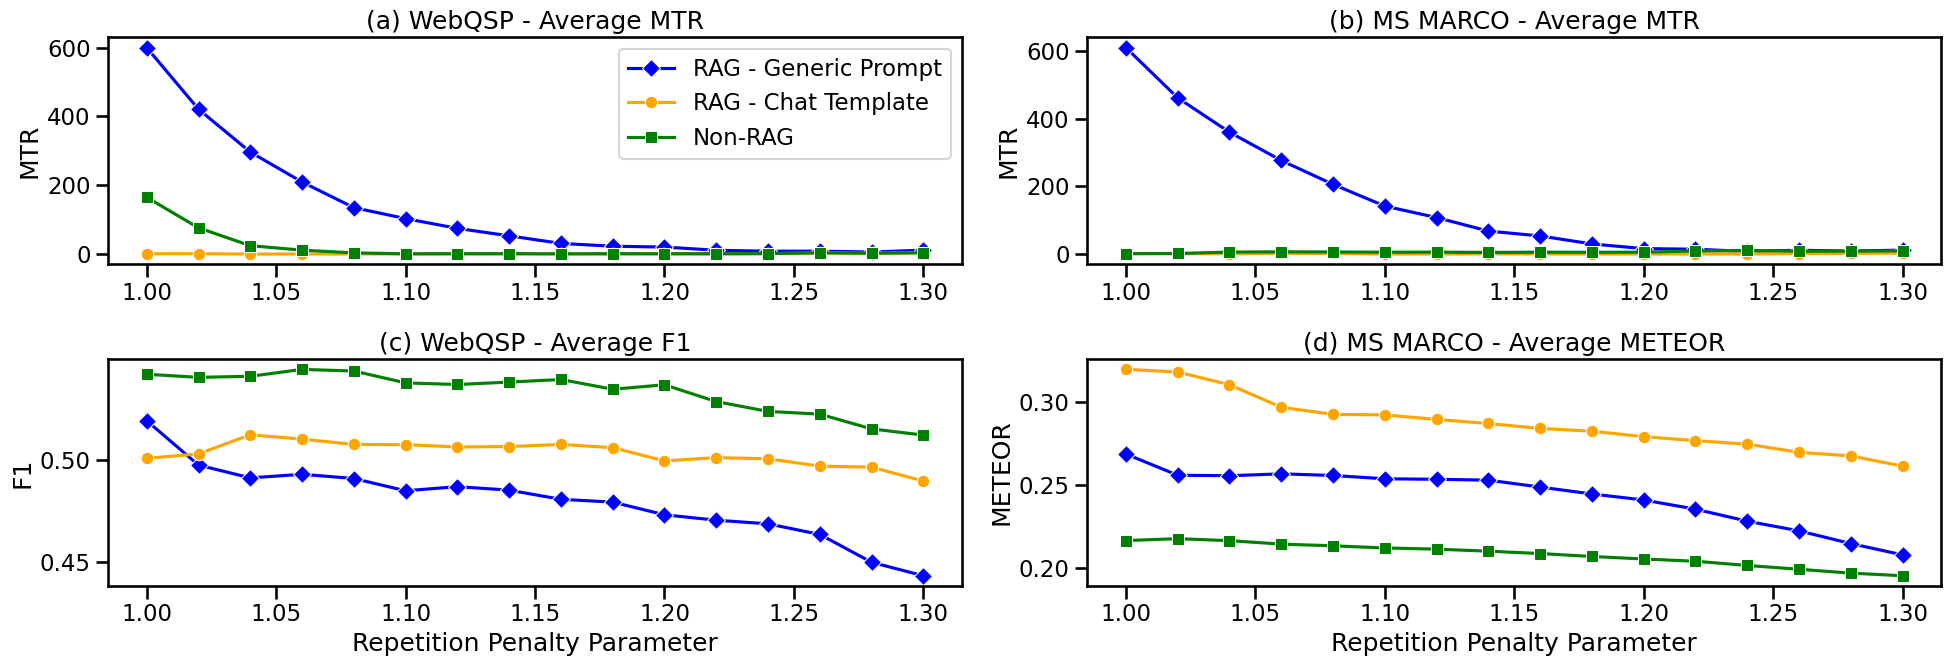

In [49]:
mean_results_cross_models = {
    "WebQSP": webqsp_mean,
    "MS MARCO": ms_marco_mean,
}
plot_mean_scores(mean_results_cross_models)

In [50]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns


def plot_detailed_mean_scores_bar_charts(mean_results):
    # make the font size bigger
    sns.set_context("poster")

    markers = ["D", "o", "s", "v", "X", "p", "*", "h"]
    colors = [
        "blue",
        "orange",
        "green",
        "red",
        "brown",
        "pink",
        "gray",
        "olive",
        "cyan",
    ]

    fig, ax = plt.subplots(2, 3, figsize=(30, 12))
    columns = [
        "newline_score",
        "repetition_score",
        # "answer_len",
    ]  #

    for row, dataset_name in enumerate(mean_results.keys()):
        for col, model_name_ext in enumerate(model_name_exts):
            df = mean_results[dataset_name][model_name_ext]
            for index, column in enumerate(columns):
                # print(f"key: {key}, model_name_ext: {model_name_ext}, column: {column}")
                if False:  # column == columns[-1]:
                    current_ax = ax[row][col].twinx()

                    sns.lineplot(
                        x="rpp",
                        y=column,
                        data=df,
                        ax=current_ax,
                        label=find_display_name(column, dataset_name),
                        marker=markers[index],
                        color=colors[index],
                        legend=False,
                    )
                else:
                    current_ax = ax[row][col]

                    bottom = 0
                    for i, column in enumerate(columns):
                        # Plot the 'A' column
                        bar1 = sns.barplot(
                            x="rpp",
                            y=column,
                            data=df,
                            color=colors[i],
                            ax=current_ax,
                            bottom=bottom,
                            label=find_display_name(column, dataset_name),
                            legend=False,
                        )
                        bottom += df[column]

                    xticklabels = [
                        f"{1 + label * 0.02:.2f}" for label in current_ax.get_xticks()
                    ]
                    current_ax.set_xticklabels(xticklabels, rotation=90)

                xlabel = "Repetition Penalty Parameter" if row == 1 else None
                current_ax.set_xlabel(xlabel)

                if col == 0:
                    ylabel = "Mean Repetition Metrics"
                else:
                    ylabel = None
                current_ax.set_ylabel(ylabel)

                ax[row][col].set_title(
                    f"({chr(97 + row * 2 + col)}) {dataset_name} - {model_name_ext}"
                )

    handles, labels = current_ax.get_legend_handles_labels()

    fig.legend(
        handles[:2],
        labels[:2],
        bbox_to_anchor=(0.5, -0.08),
        loc="lower center",
    )

    plt.tight_layout()
    plt.show()

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/2909438704.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/2909438704.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/2909438704.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/2909438704.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

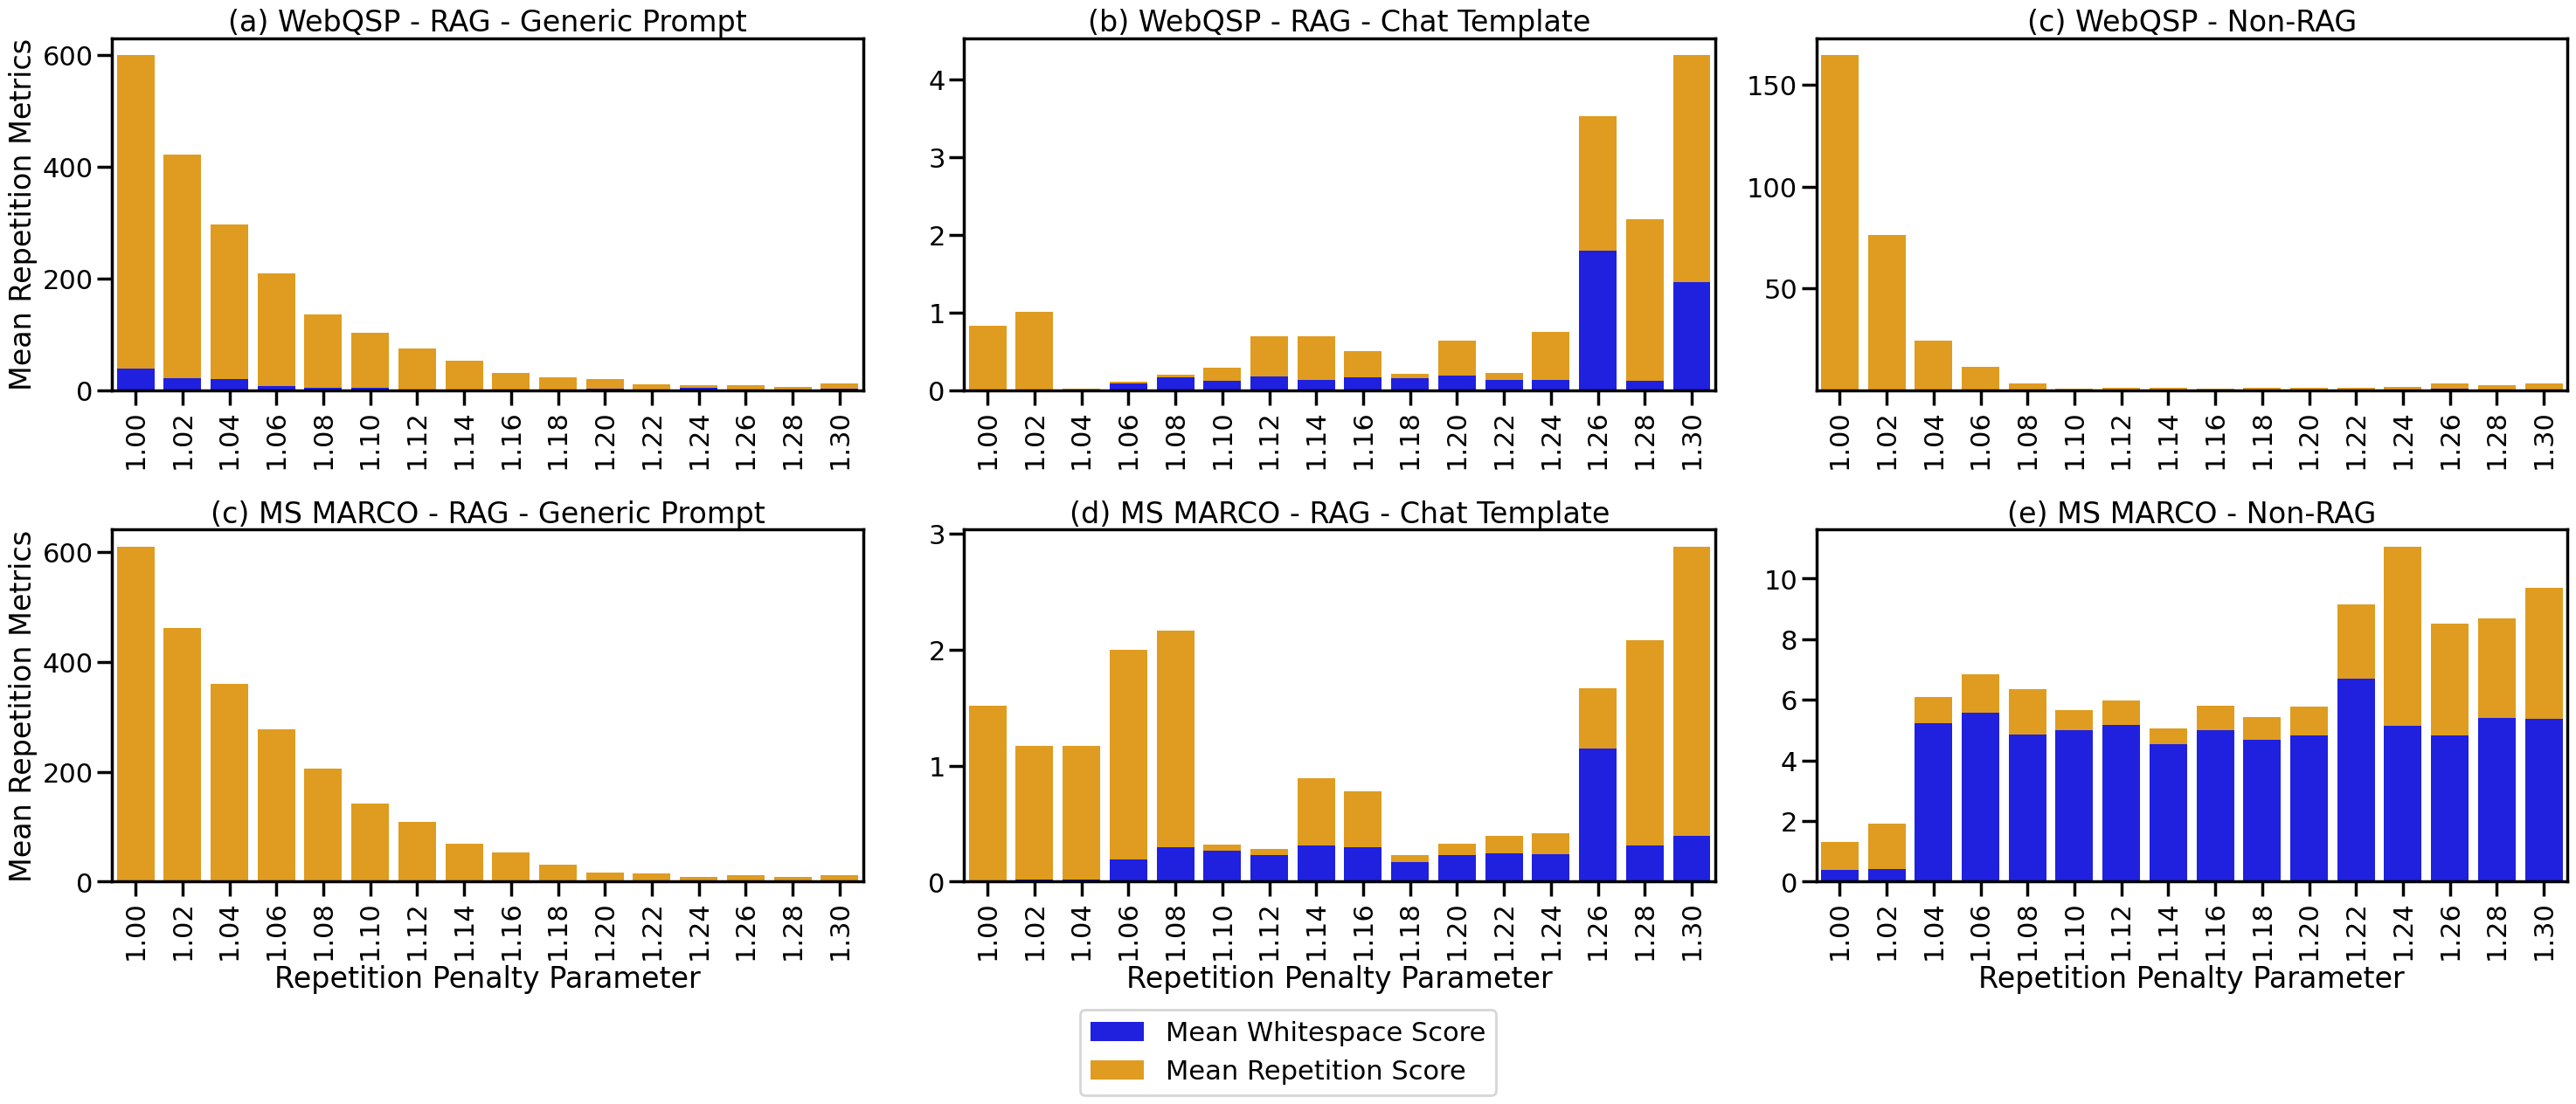

In [51]:
plot_detailed_mean_scores_bar_charts(mean_results_cross_models)

In [52]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns


def plot_detailed_mean_scores(mean_results):
    # make the font size bigger
    sns.set_context("poster")

    markers = ["D", "o", "s", "v", "X", "p", "*", "h"]
    colors = [
        "blue",
        "orange",
        "green",
        "red",
        "brown",
        "pink",
        "gray",
        "olive",
        "cyan",
    ]

    fig, ax = plt.subplots(2, 3, figsize=(30, 10))
    columns = [
        "newline_score",
        "repetition_score",
        "total_repetitions",
        "answer_len",
    ]  #

    for row, dataset_name in enumerate(mean_results.keys()):
        for col, model_name_ext in enumerate(model_name_exts):
            df = mean_results[dataset_name][model_name_ext]
            for index, column in enumerate(columns):
                # print(f"key: {key}, model_name_ext: {model_name_ext}, column: {column}")
                current_ax = (
                    ax[row][col].twinx() if column == columns[-1] else ax[row][col]
                )
                sns.lineplot(
                    x="rpp",
                    y=column,
                    data=df,
                    ax=current_ax,
                    label=find_display_name(column, dataset_name),
                    marker=markers[index],
                    color=colors[index],
                    legend=False,
                )

                xlabel = "Repetition Penalty Parameter" if row == 1 else None
                current_ax.set_xlabel(xlabel)

                if col == 0:
                    ylabel = (
                        "Mean Answer Length"
                        if column == columns[-1]
                        else "Mean Repetition Metrics"
                    )
                else:
                    ylabel = None
                current_ax.set_ylabel(ylabel)

                ax[row][col].set_title(
                    f"({chr(97 + row * 2 + col)}) {dataset_name} - {model_name_ext}"
                )

    handles, labels = ax[row][col].get_legend_handles_labels()
    handles2, labels2 = current_ax.get_legend_handles_labels()
    fig.legend(
        handles + handles2,
        labels + labels2,
        bbox_to_anchor=(0.5, -0.17),
        loc="lower center",
    )

    plt.tight_layout()
    plt.show()

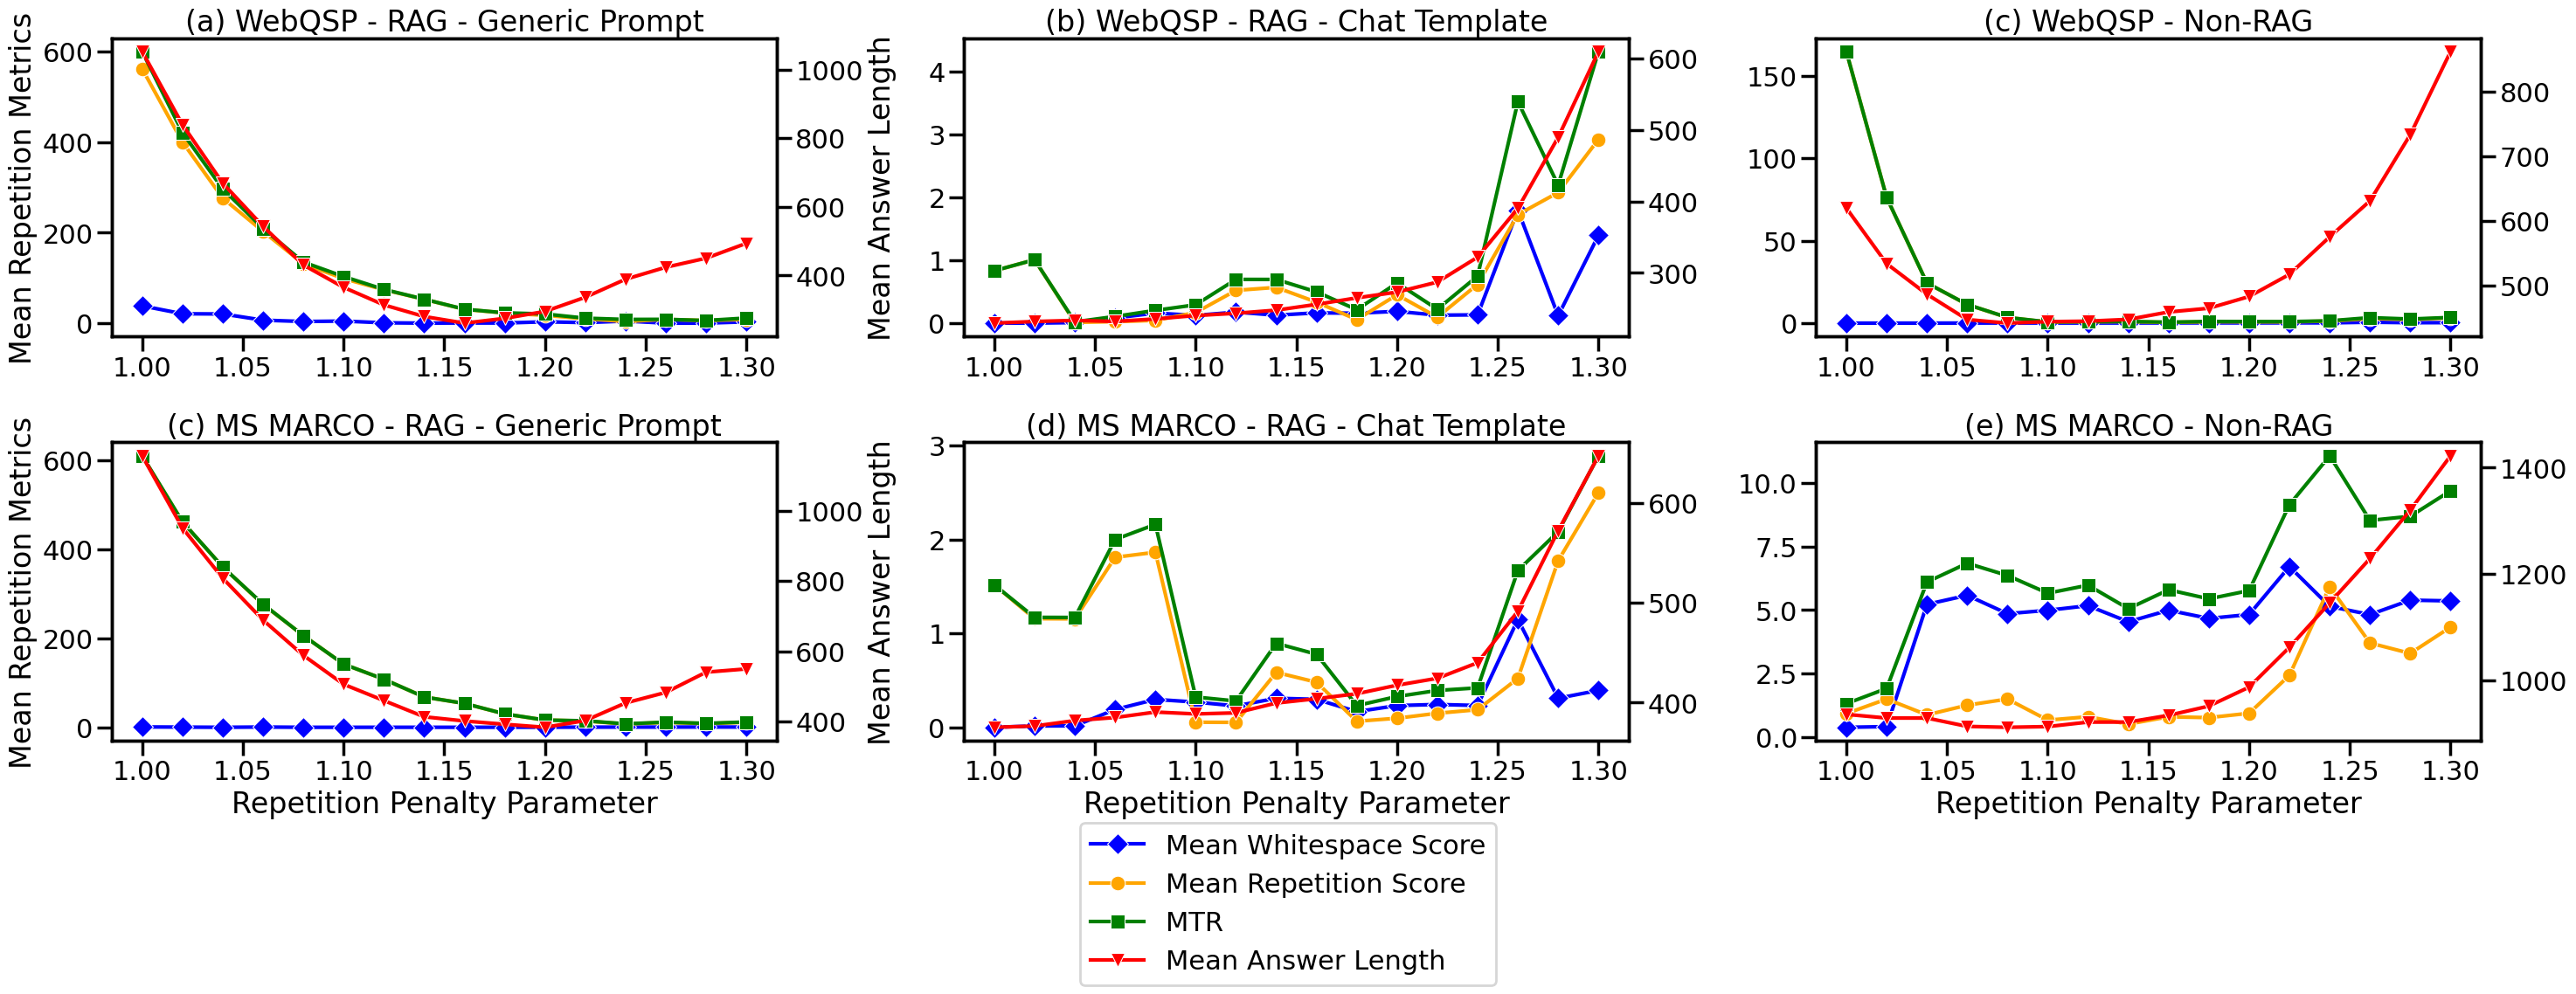

In [53]:
plot_detailed_mean_scores(mean_results_cross_models)

In [54]:
model_names = []
for key in webqsp_result.keys():
    model_name = key.split("(")[0]
    if model_name not in model_names:
        model_names.append(model_name)
        # print(f"model_name: {shorter(model_name)}")


def shorter(model_name):
    return (
        model_name.replace("Meta-", "")
        .replace("-Instruct", "")
        .replace("-chat-hf", "")
        .replace("-v0.2", "")
        .replace("-it", "")
        .replace("gemma", "Gemma")
        .replace("-128k-instruct", "")
        .replace("b", "B")
    )


disply_model_names = [shorter(model_name) for model_name in model_names]
for m, d in zip(model_names, disply_model_names):
    print(f"{m} -> {d}")

gemma-1.1-2b-it -> Gemma-1.1-2B
Phi-3-mini-128k-instruct -> Phi-3-mini
gemma-1.1-7b-it -> Gemma-1.1-7B
Llama-2-7b-chat-hf -> Llama-2-7B
Mistral-7B-Instruct-v0.2 -> Mistral-7B
Meta-Llama-3-8B-Instruct -> Llama-3-8B
Llama-2-13b-chat-hf -> Llama-2-13B
Llama-2-70b-chat-hf -> Llama-2-70B
Meta-Llama-3-70B-Instruct -> Llama-3-70B


In [55]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns


def plot_detailed_repetitions(results, model_name=None, title=True):
    # make the font size bigger
    sns.set_context("poster")

    markers = ["D", "o", "s", "x", "P", "v", "X", "p", "*", "h"]
    colors = [
        "blue",
        "orange",
        "green",
        "red",
        "purple",
        "brown",
        "pink",
        "gray",
        "olive",
        "cyan",
    ]
    bar_colors = ["blue", "orange"]

    fig, ax = plt.subplots(2, 3, figsize=(30, 10))
    # print(f"ax: {ax.shape}")
    columns = [
        "newline_score",
        "repetition_score",
        # "answer_len",
    ]  #

    for row, dataset_name in enumerate(results.keys()):
        for col, model_name_ext in enumerate(model_name_exts):
            for key in results[dataset_name].keys():
                if model_name not in key or model_name_ext not in key:
                    continue

                df = results[dataset_name][key]["df_overall"]
                print("newline_score len:", len(df["newline_score"]))

                current_ax = ax[row][col]

                bottom = 0
                for i, column in enumerate(columns):
                    print(
                        f"key: {key}, model_name_ext: {model_name_ext}, column: {column}"
                    )
                    bar1 = sns.barplot(
                        x="repetition_penalty",
                        y=column,
                        data=df,
                        color=colors[i],
                        ax=current_ax,
                        bottom=bottom,
                        label=find_display_name(column, dataset_name),
                        legend=False,
                    )
                    bottom += df[column]

                xticklabels = [
                    f"{1 + label * 0.02:.2f}" for label in current_ax.get_xticks()
                ]
                current_ax.set_xticklabels(xticklabels, rotation=90)

                xlabel = "Repetition Penalty Parameter" if row == 1 else None
                ax[row][col].set_xlabel(xlabel)

                ylabel = "Mean Repetition Metrics" if col == 0 else None
                ax[row][col].set_ylabel(ylabel)

                ax[row][col].set_title(
                    f"({chr(97 + row * 3 + col)}) {dataset_name} - {model_name_ext}"
                )
    if title:
        fig.suptitle(f"Model - {shorter(model_name)}")

    handles, labels = ax[row][col].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        bbox_to_anchor=(0.5, -0.1),
        loc="lower center",
    )

    # make the plot look nice
    plt.tight_layout()
    plt.show()

Model: gemma-1.1-2b-it
newline_score len: 16
key: gemma-1.1-2b-it(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: gemma-1.1-2b-it(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: gemma-1.1-2b-it(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: newline_score
key: gemma-1.1-2b-it(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: repetition_score
newline_score len: 16
key: gemma-1.1-2b-it(Non-RAG), model_name_ext: Non-RAG, column: newline_score
key: gemma-1.1-2b-it(Non-RAG), model_name_ext: Non-RAG, column: repetition_score
newline_score len: 16
key: gemma-1.1-2b-it(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: gemma-1.1-2b-it(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: gemma-1.1-2b-it(RAG - Chat Template), model_name_ext: RAG - Chat Template,

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

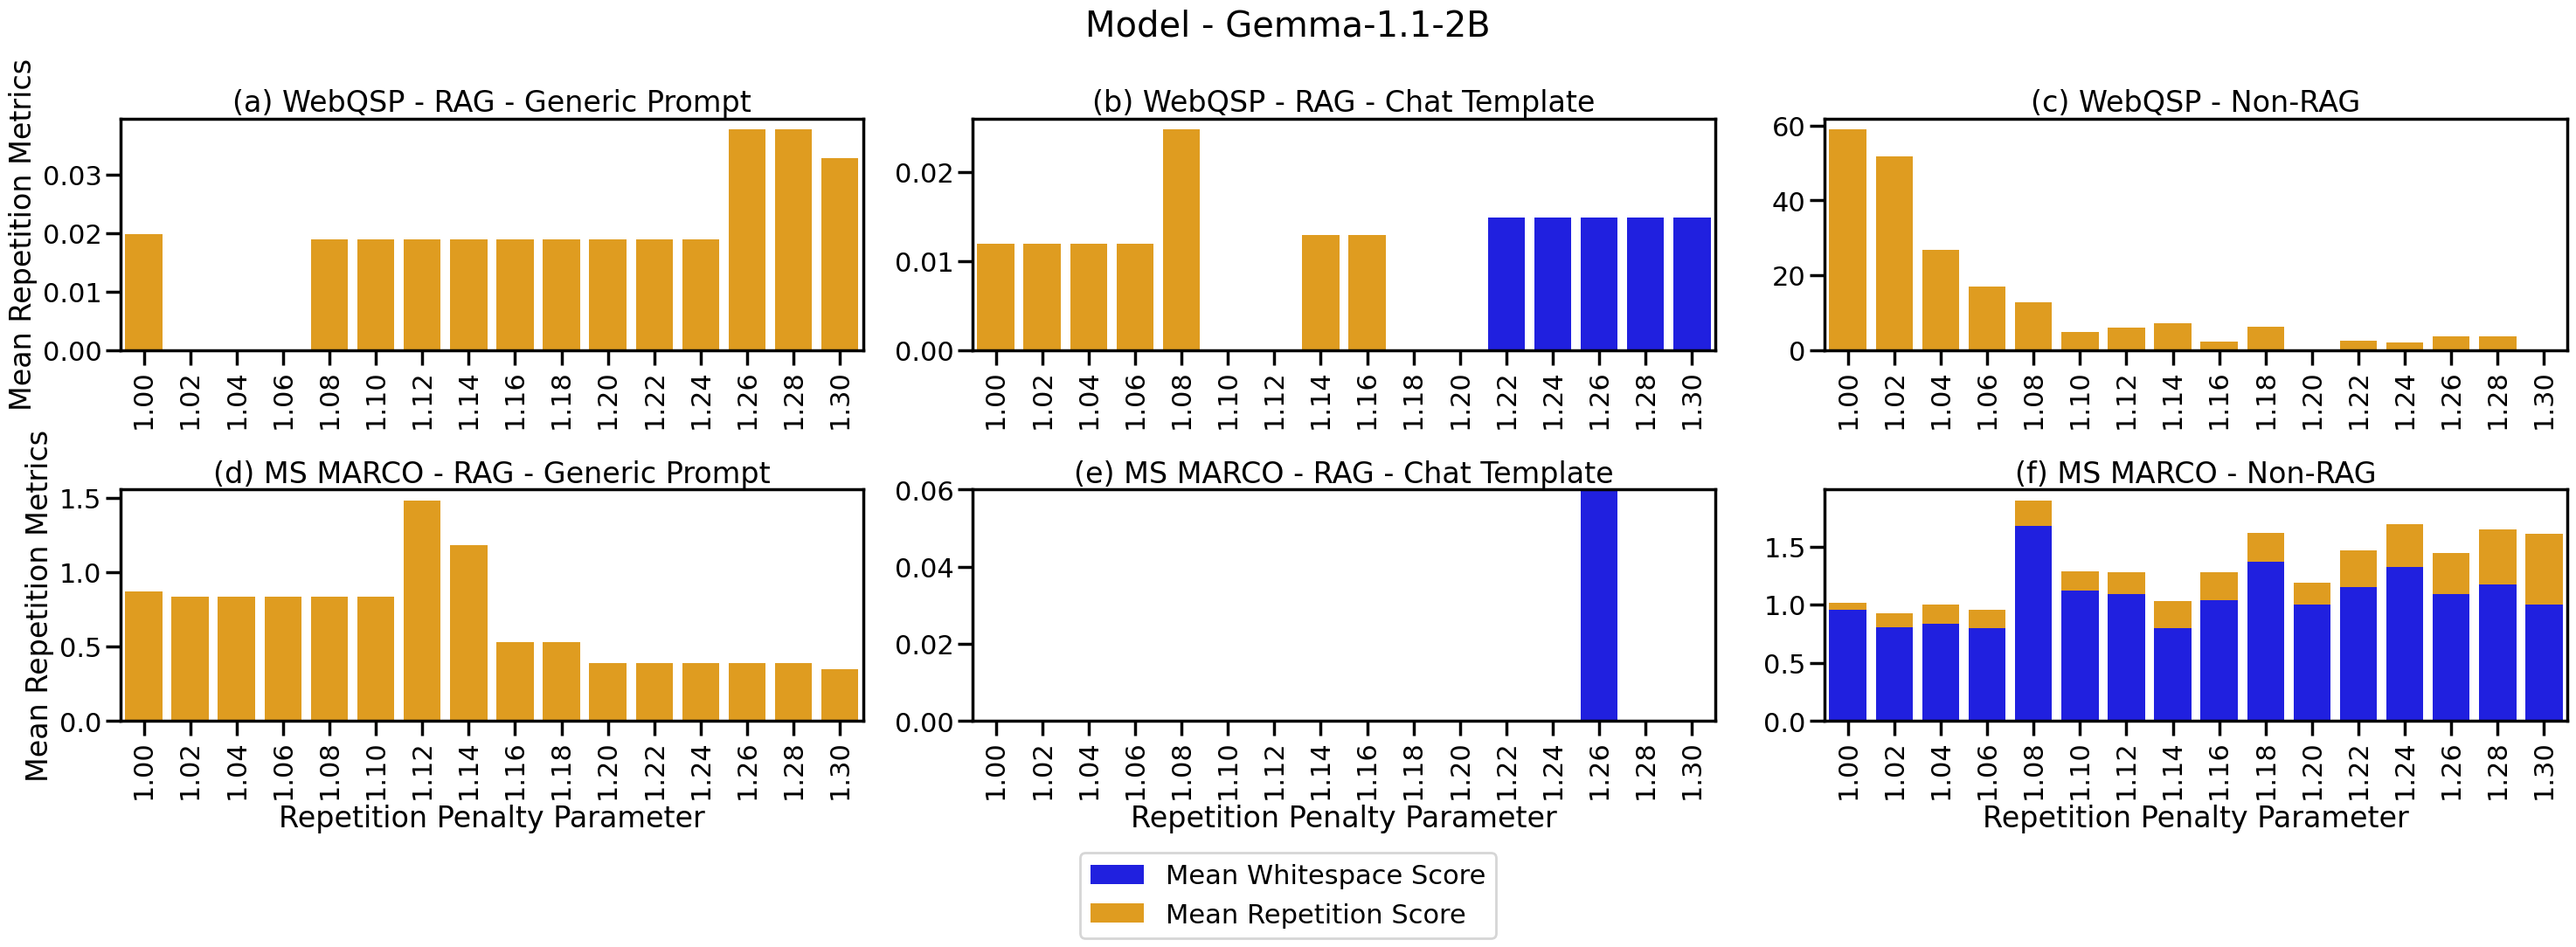

Model: Phi-3-mini-128k-instruct
newline_score len: 16
key: Phi-3-mini-128k-instruct(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Phi-3-mini-128k-instruct(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: Phi-3-mini-128k-instruct(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: newline_score
key: Phi-3-mini-128k-instruct(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: repetition_score
newline_score len: 16
key: Phi-3-mini-128k-instruct(Non-RAG), model_name_ext: Non-RAG, column: newline_score
key: Phi-3-mini-128k-instruct(Non-RAG), model_name_ext: Non-RAG, column: repetition_score
newline_score len: 16
key: Phi-3-mini-128k-instruct(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Phi-3-mini-128k-instruct(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 1

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

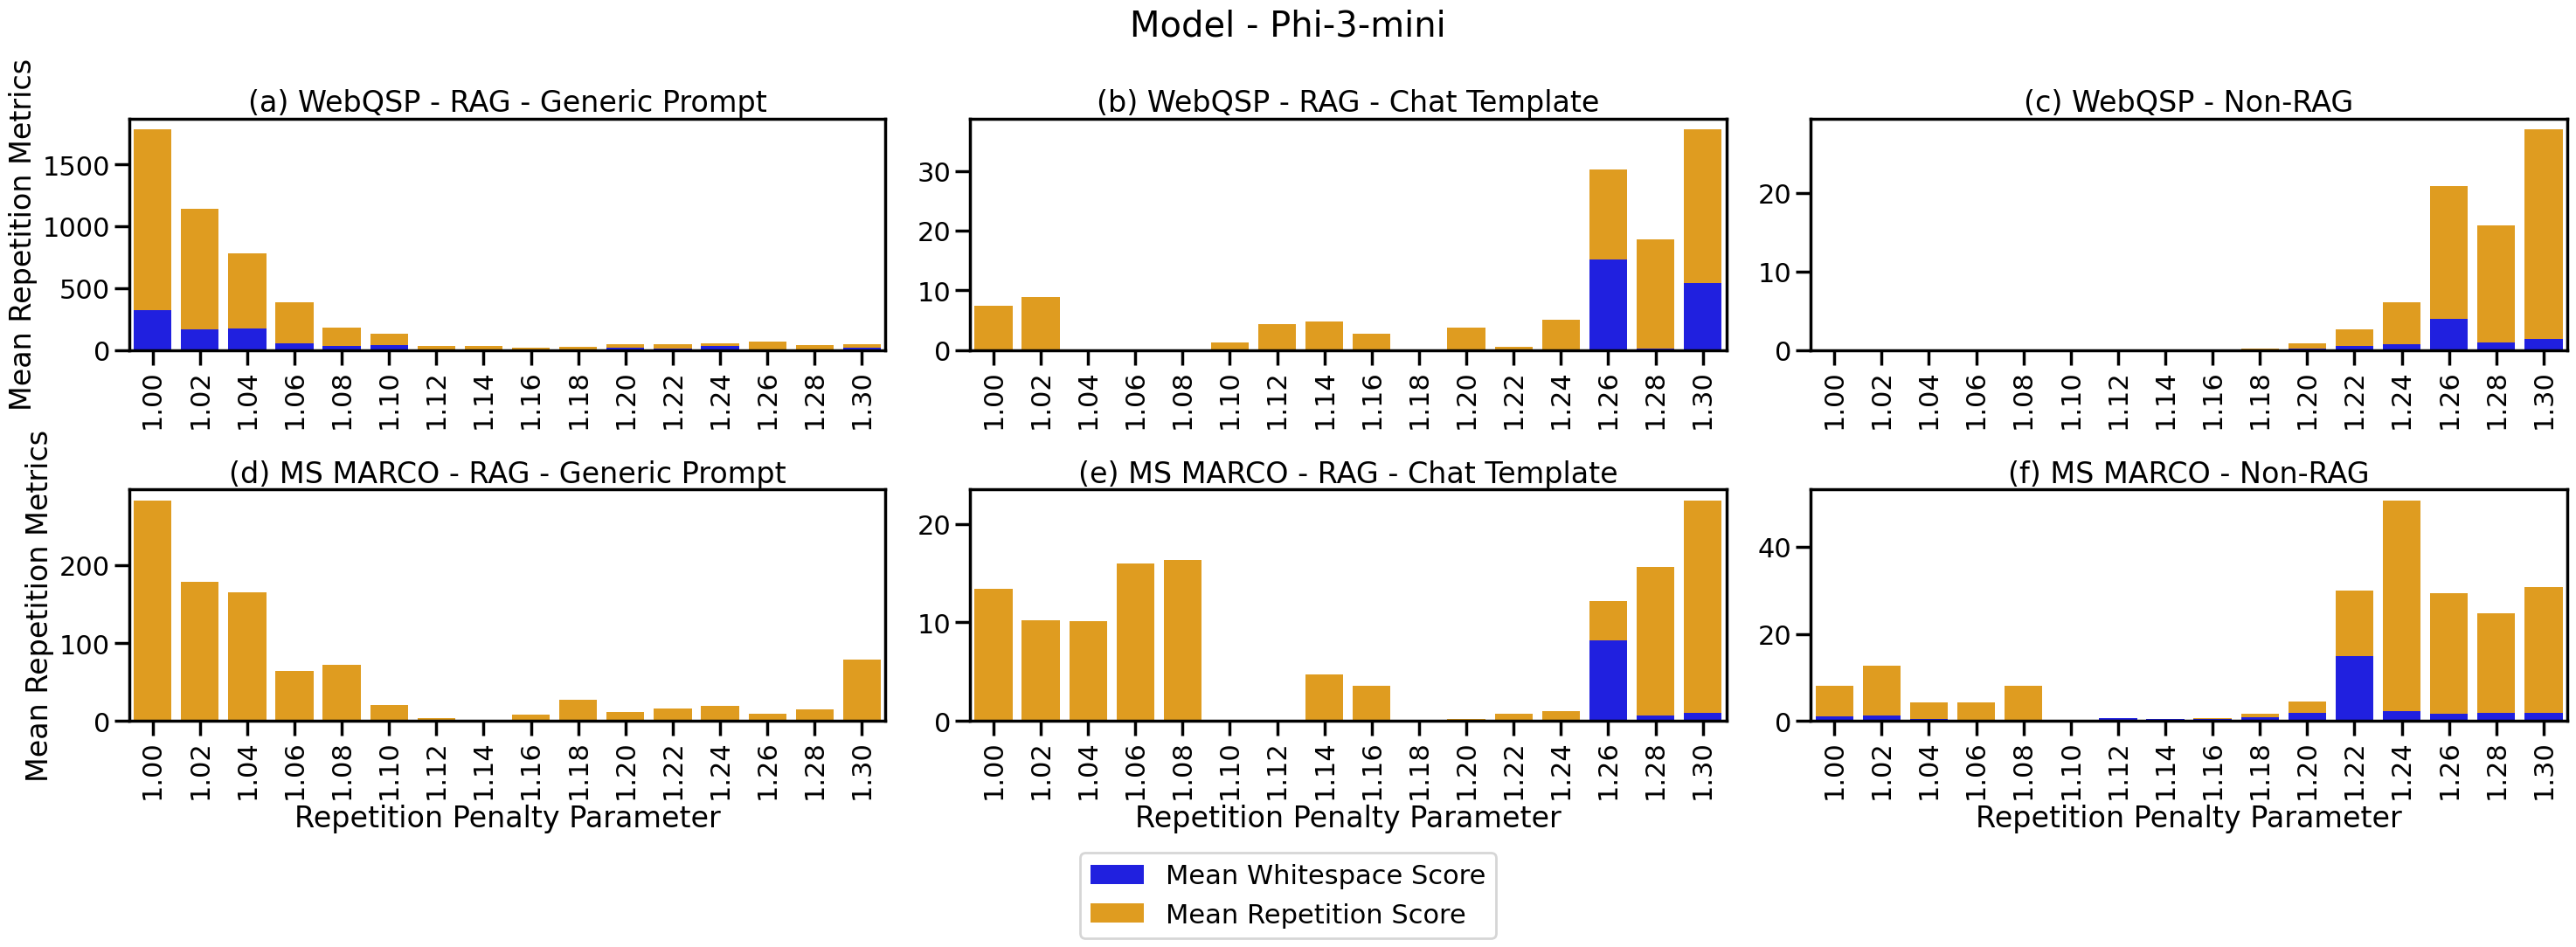

Model: gemma-1.1-7b-it
newline_score len: 16
key: gemma-1.1-7b-it(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: gemma-1.1-7b-it(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: gemma-1.1-7b-it(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: newline_score
key: gemma-1.1-7b-it(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: repetition_score
newline_score len: 16
key: gemma-1.1-7b-it(Non-RAG), model_name_ext: Non-RAG, column: newline_score
key: gemma-1.1-7b-it(Non-RAG), model_name_ext: Non-RAG, column: repetition_score
newline_score len: 16
key: gemma-1.1-7b-it(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: gemma-1.1-7b-it(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: gemma-1.1-7b-it(RAG - Chat Template), model_name_ext: RAG - Chat Template,

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

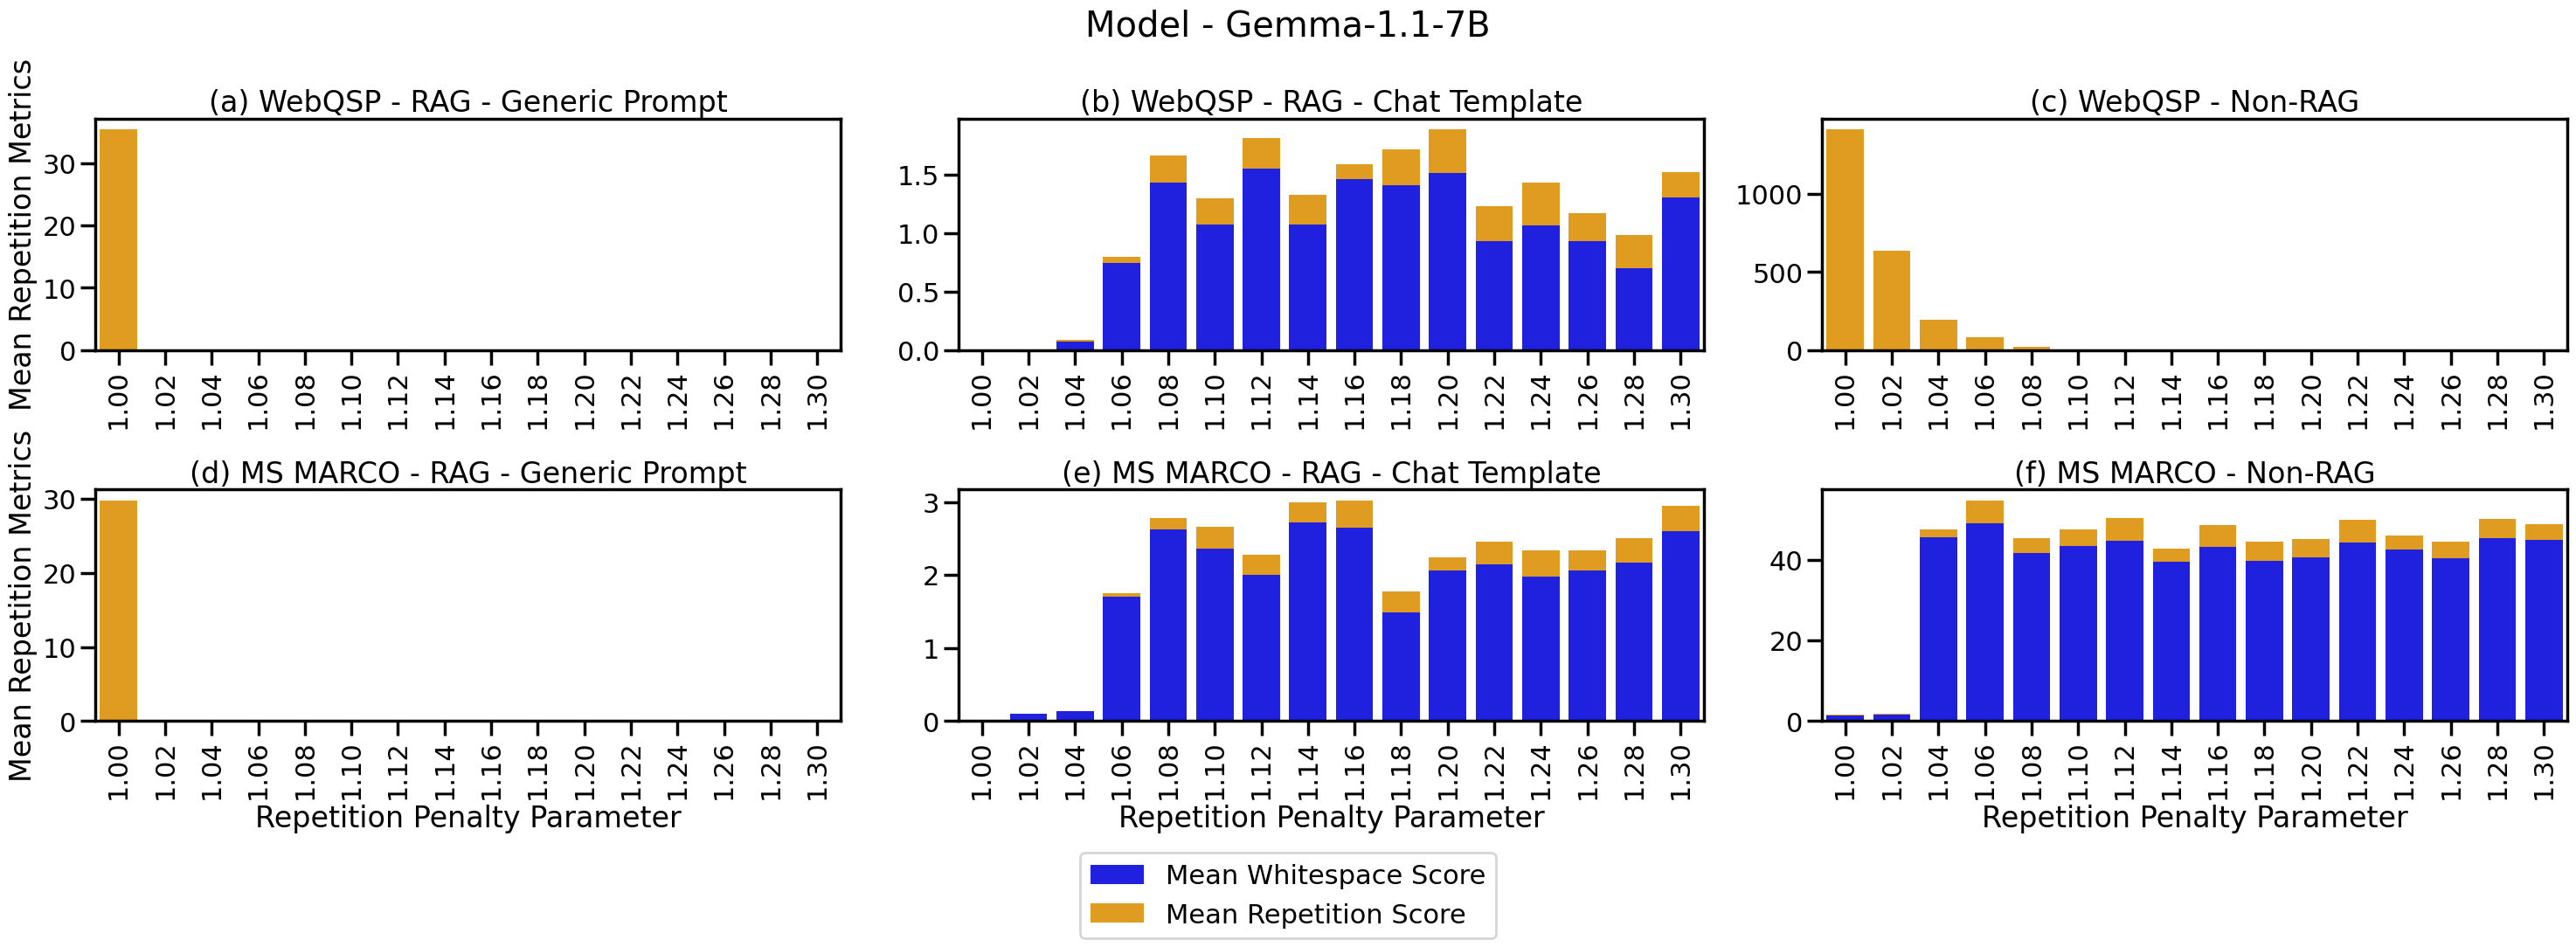

Model: Llama-2-7b-chat-hf
newline_score len: 16
key: Llama-2-7b-chat-hf(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Llama-2-7b-chat-hf(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: Llama-2-7b-chat-hf(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: newline_score
key: Llama-2-7b-chat-hf(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: repetition_score
newline_score len: 16
key: Llama-2-7b-chat-hf(Non-RAG), model_name_ext: Non-RAG, column: newline_score
key: Llama-2-7b-chat-hf(Non-RAG), model_name_ext: Non-RAG, column: repetition_score
newline_score len: 16
key: Llama-2-7b-chat-hf(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Llama-2-7b-chat-hf(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: Llama-2-7b-chat-hf(RAG - Chat Template), model_

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

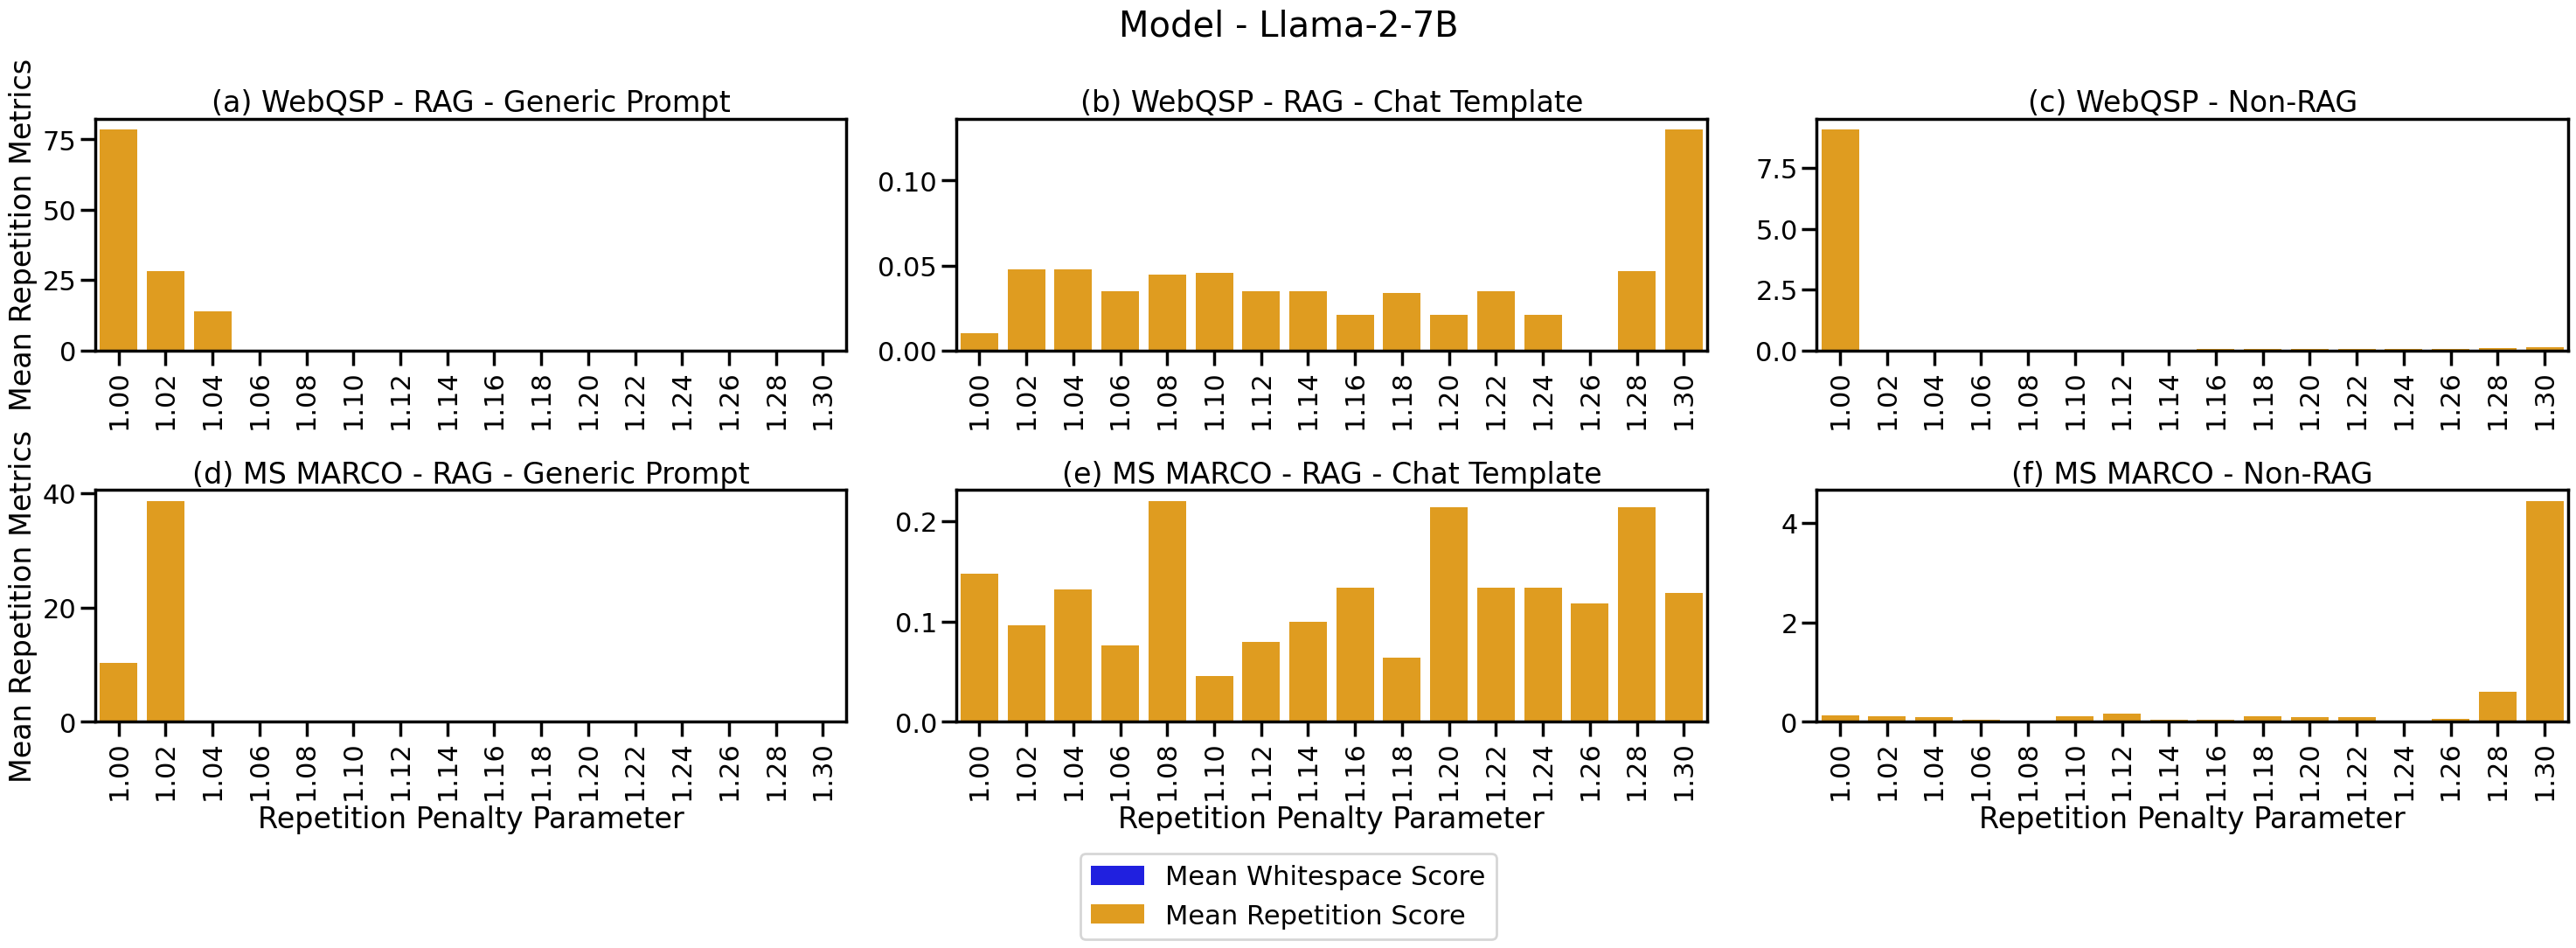

Model: Mistral-7B-Instruct-v0.2
newline_score len: 16
key: Mistral-7B-Instruct-v0.2(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Mistral-7B-Instruct-v0.2(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: Mistral-7B-Instruct-v0.2(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: newline_score
key: Mistral-7B-Instruct-v0.2(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: repetition_score
newline_score len: 16
key: Mistral-7B-Instruct-v0.2(Non-RAG), model_name_ext: Non-RAG, column: newline_score
key: Mistral-7B-Instruct-v0.2(Non-RAG), model_name_ext: Non-RAG, column: repetition_score
newline_score len: 16
key: Mistral-7B-Instruct-v0.2(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Mistral-7B-Instruct-v0.2(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 1

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

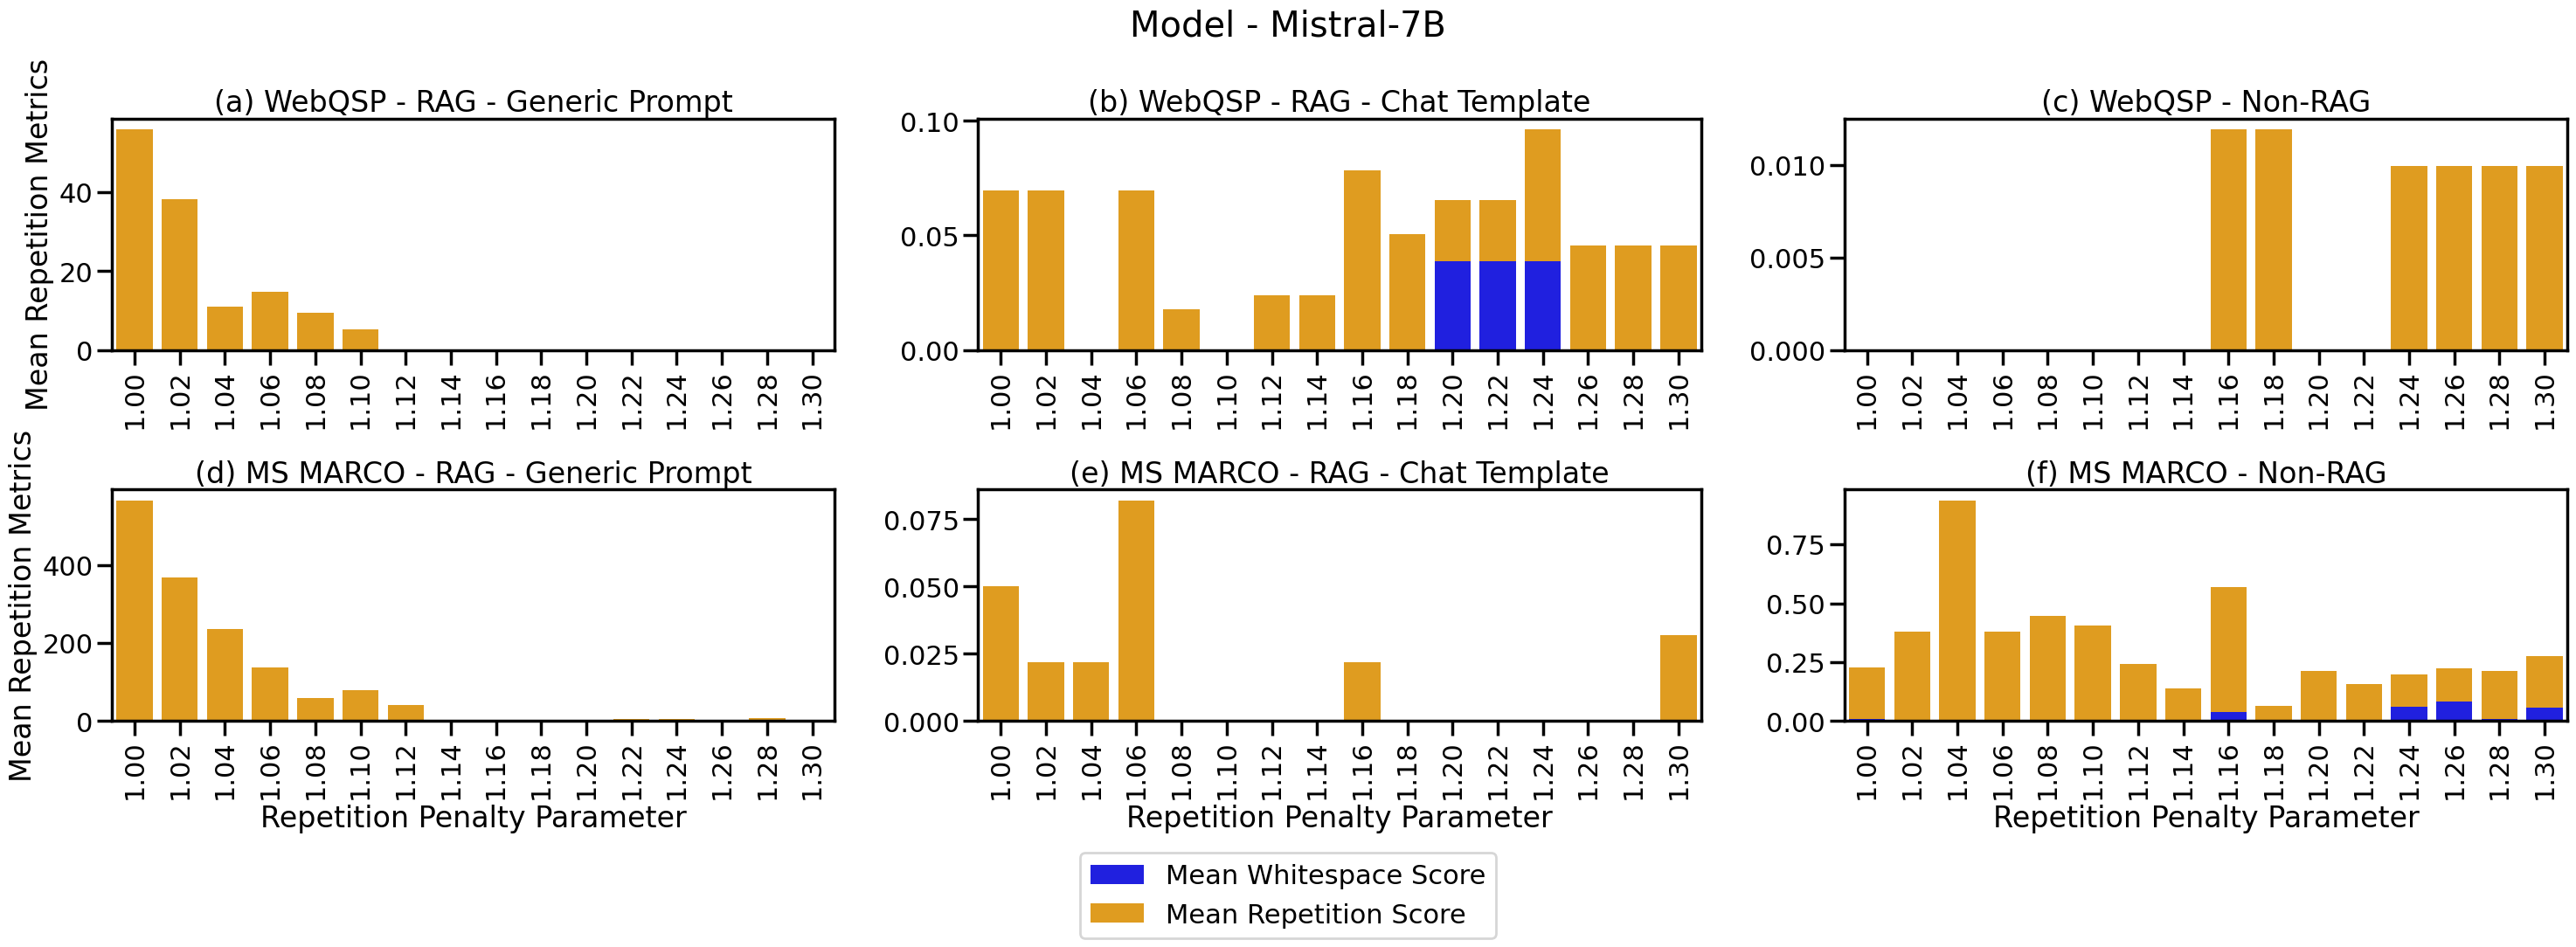

Model: Meta-Llama-3-8B-Instruct
newline_score len: 16
key: Meta-Llama-3-8B-Instruct(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Meta-Llama-3-8B-Instruct(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: Meta-Llama-3-8B-Instruct(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: newline_score
key: Meta-Llama-3-8B-Instruct(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: repetition_score
newline_score len: 16
key: Meta-Llama-3-8B-Instruct(Non-RAG), model_name_ext: Non-RAG, column: newline_score
key: Meta-Llama-3-8B-Instruct(Non-RAG), model_name_ext: Non-RAG, column: repetition_score
newline_score len: 16
key: Meta-Llama-3-8B-Instruct(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Meta-Llama-3-8B-Instruct(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 1

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

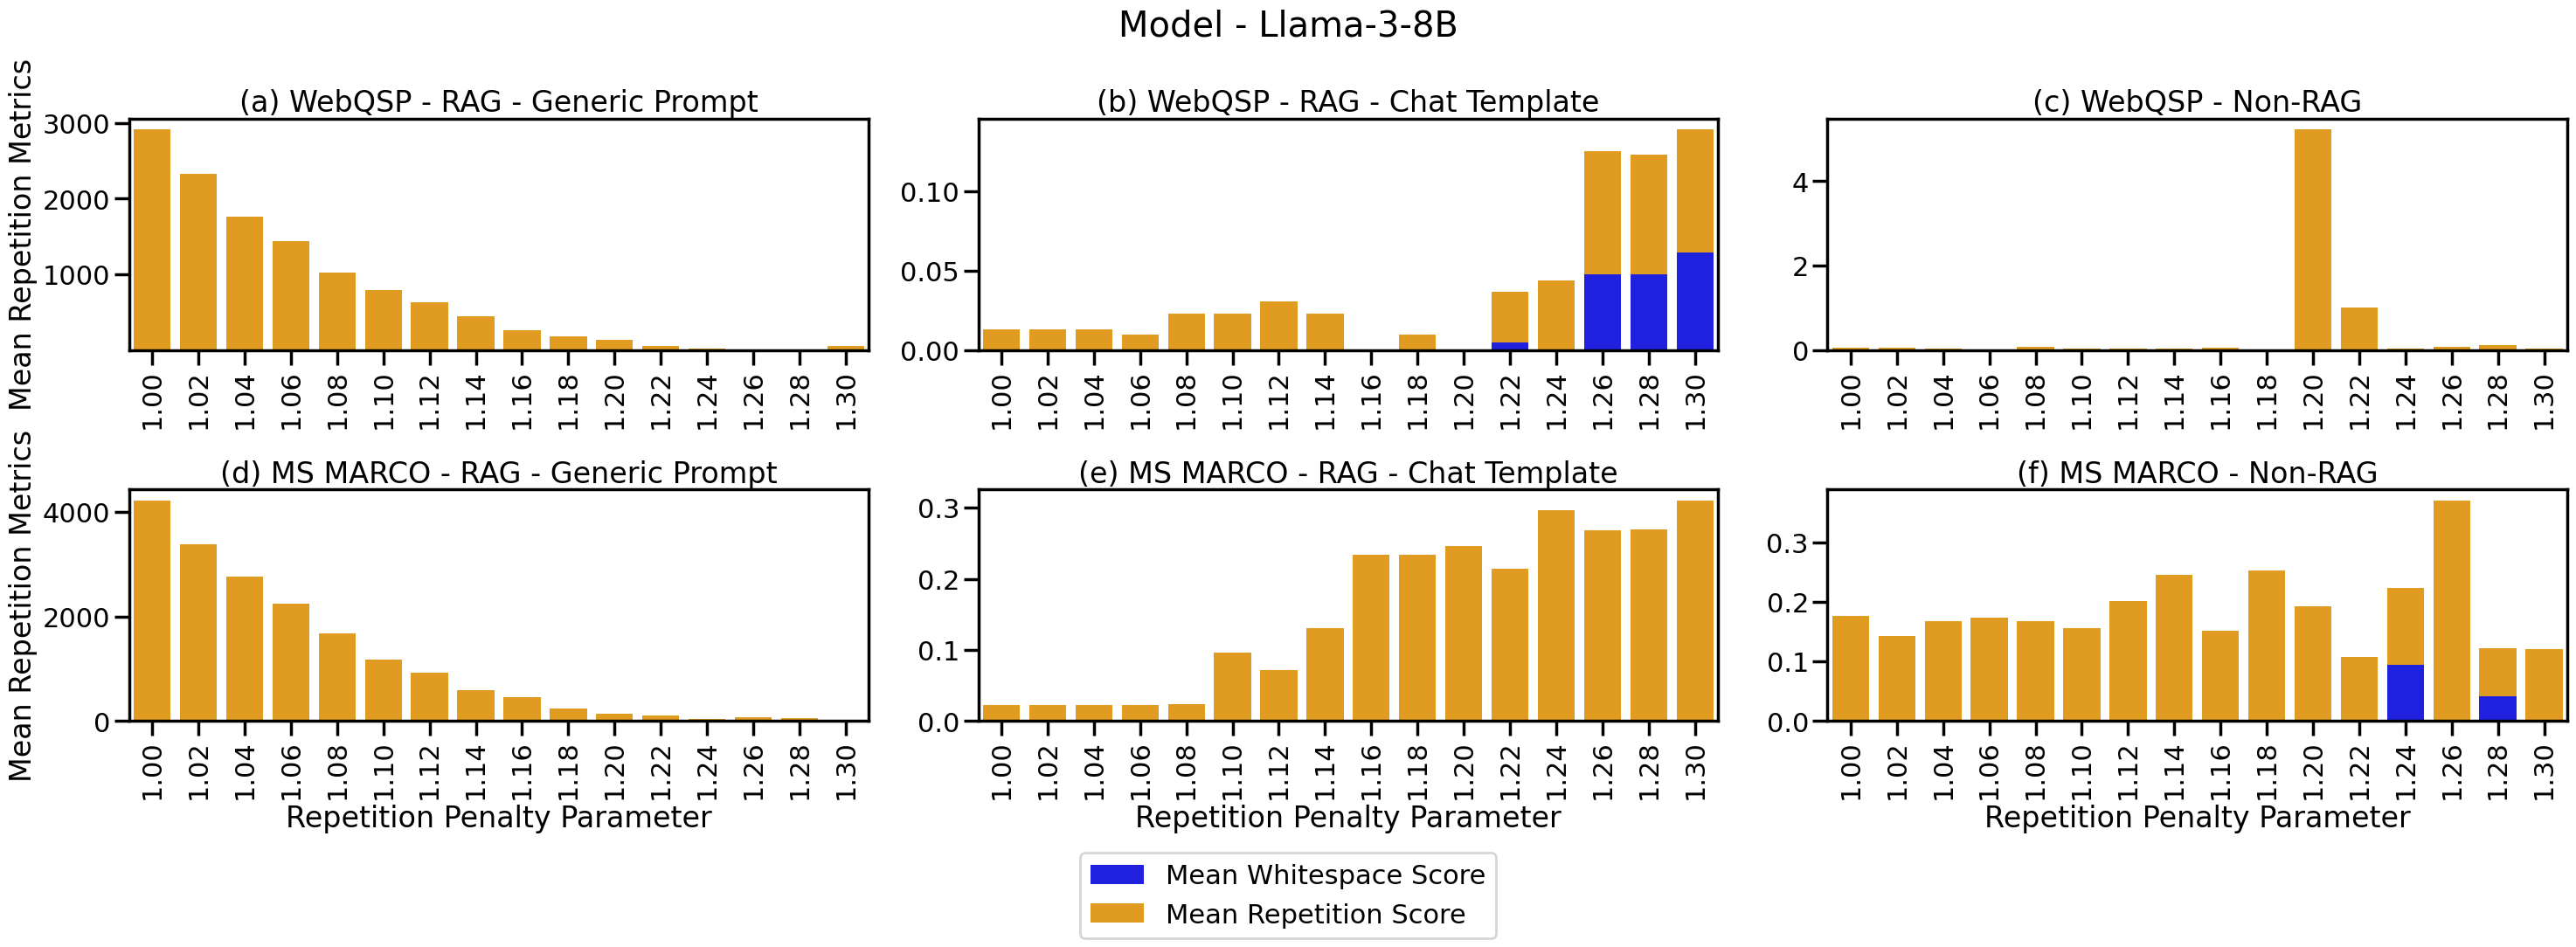

Model: Llama-2-13b-chat-hf
newline_score len: 16
key: Llama-2-13b-chat-hf(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Llama-2-13b-chat-hf(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: Llama-2-13b-chat-hf(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: newline_score
key: Llama-2-13b-chat-hf(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: repetition_score
newline_score len: 16
key: Llama-2-13b-chat-hf(Non-RAG), model_name_ext: Non-RAG, column: newline_score
key: Llama-2-13b-chat-hf(Non-RAG), model_name_ext: Non-RAG, column: repetition_score
newline_score len: 16
key: Llama-2-13b-chat-hf(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Llama-2-13b-chat-hf(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: Llama-2-13b-chat-hf(RAG - Chat Templat

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

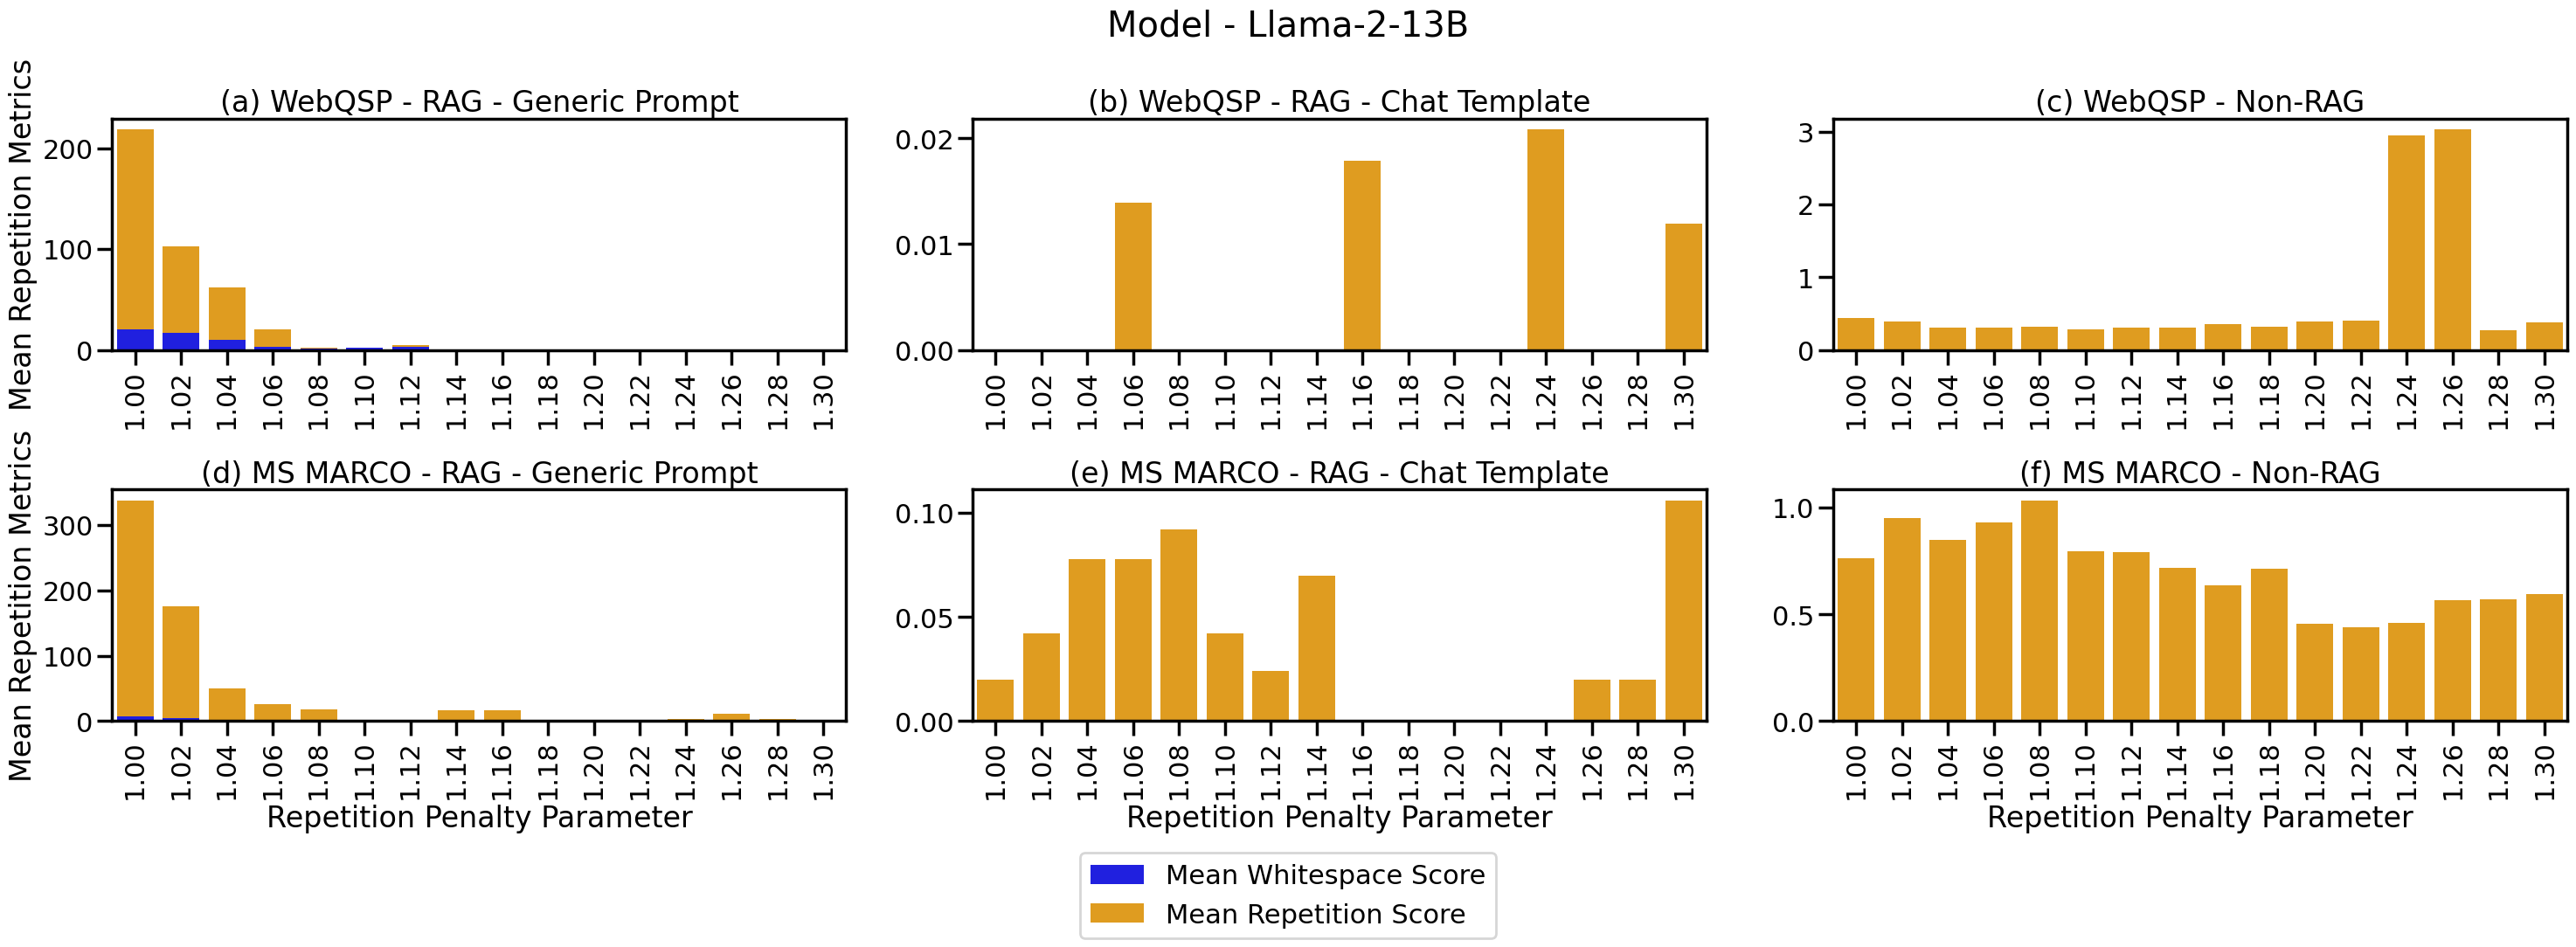

Model: Llama-2-70b-chat-hf
newline_score len: 16
key: Llama-2-70b-chat-hf(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Llama-2-70b-chat-hf(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: Llama-2-70b-chat-hf(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: newline_score
key: Llama-2-70b-chat-hf(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: repetition_score
newline_score len: 16
key: Llama-2-70b-chat-hf(Non-RAG), model_name_ext: Non-RAG, column: newline_score
key: Llama-2-70b-chat-hf(Non-RAG), model_name_ext: Non-RAG, column: repetition_score
newline_score len: 16
key: Llama-2-70b-chat-hf(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Llama-2-70b-chat-hf(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: Llama-2-70b-chat-hf(RAG - Chat Templat

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

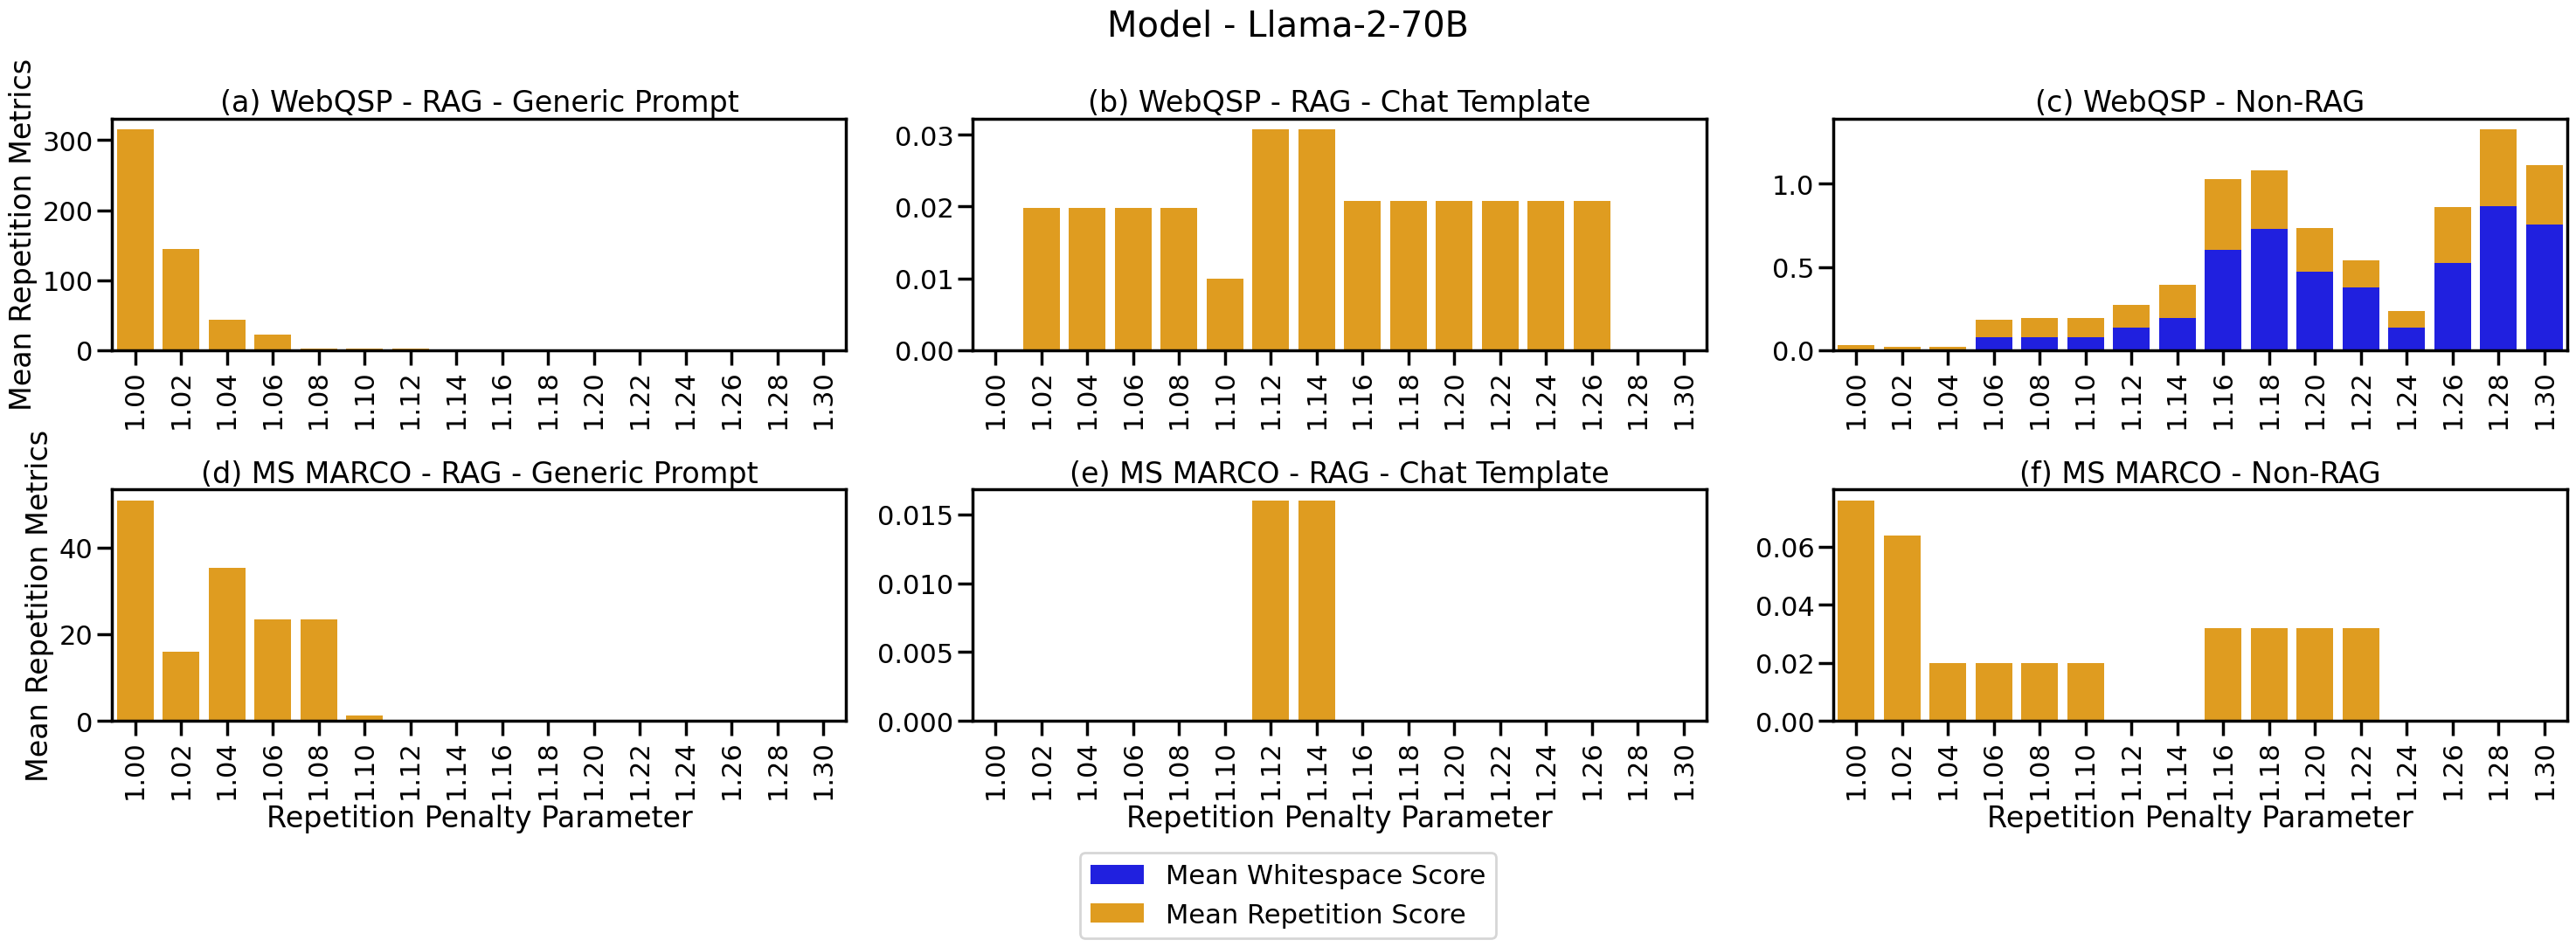

Model: Meta-Llama-3-70B-Instruct
newline_score len: 16
key: Meta-Llama-3-70B-Instruct(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Meta-Llama-3-70B-Instruct(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_score len: 16
key: Meta-Llama-3-70B-Instruct(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: newline_score
key: Meta-Llama-3-70B-Instruct(RAG - Chat Template), model_name_ext: RAG - Chat Template, column: repetition_score
newline_score len: 16
key: Meta-Llama-3-70B-Instruct(Non-RAG), model_name_ext: Non-RAG, column: newline_score
key: Meta-Llama-3-70B-Instruct(Non-RAG), model_name_ext: Non-RAG, column: repetition_score
newline_score len: 16
key: Meta-Llama-3-70B-Instruct(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: newline_score
key: Meta-Llama-3-70B-Instruct(RAG - Generic Prompt), model_name_ext: RAG - Generic Prompt, column: repetition_score
newline_sco

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_ax.set_xticklabels(xticklabels, rotation=90)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_80565/448958466.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

newline_score len: 16
key: Meta-Llama-3-70B-Instruct(Non-RAG), model_name_ext: Non-RAG, column: newline_score
key: Meta-Llama-3-70B-Instruct(Non-RAG), model_name_ext: Non-RAG, column: repetition_score


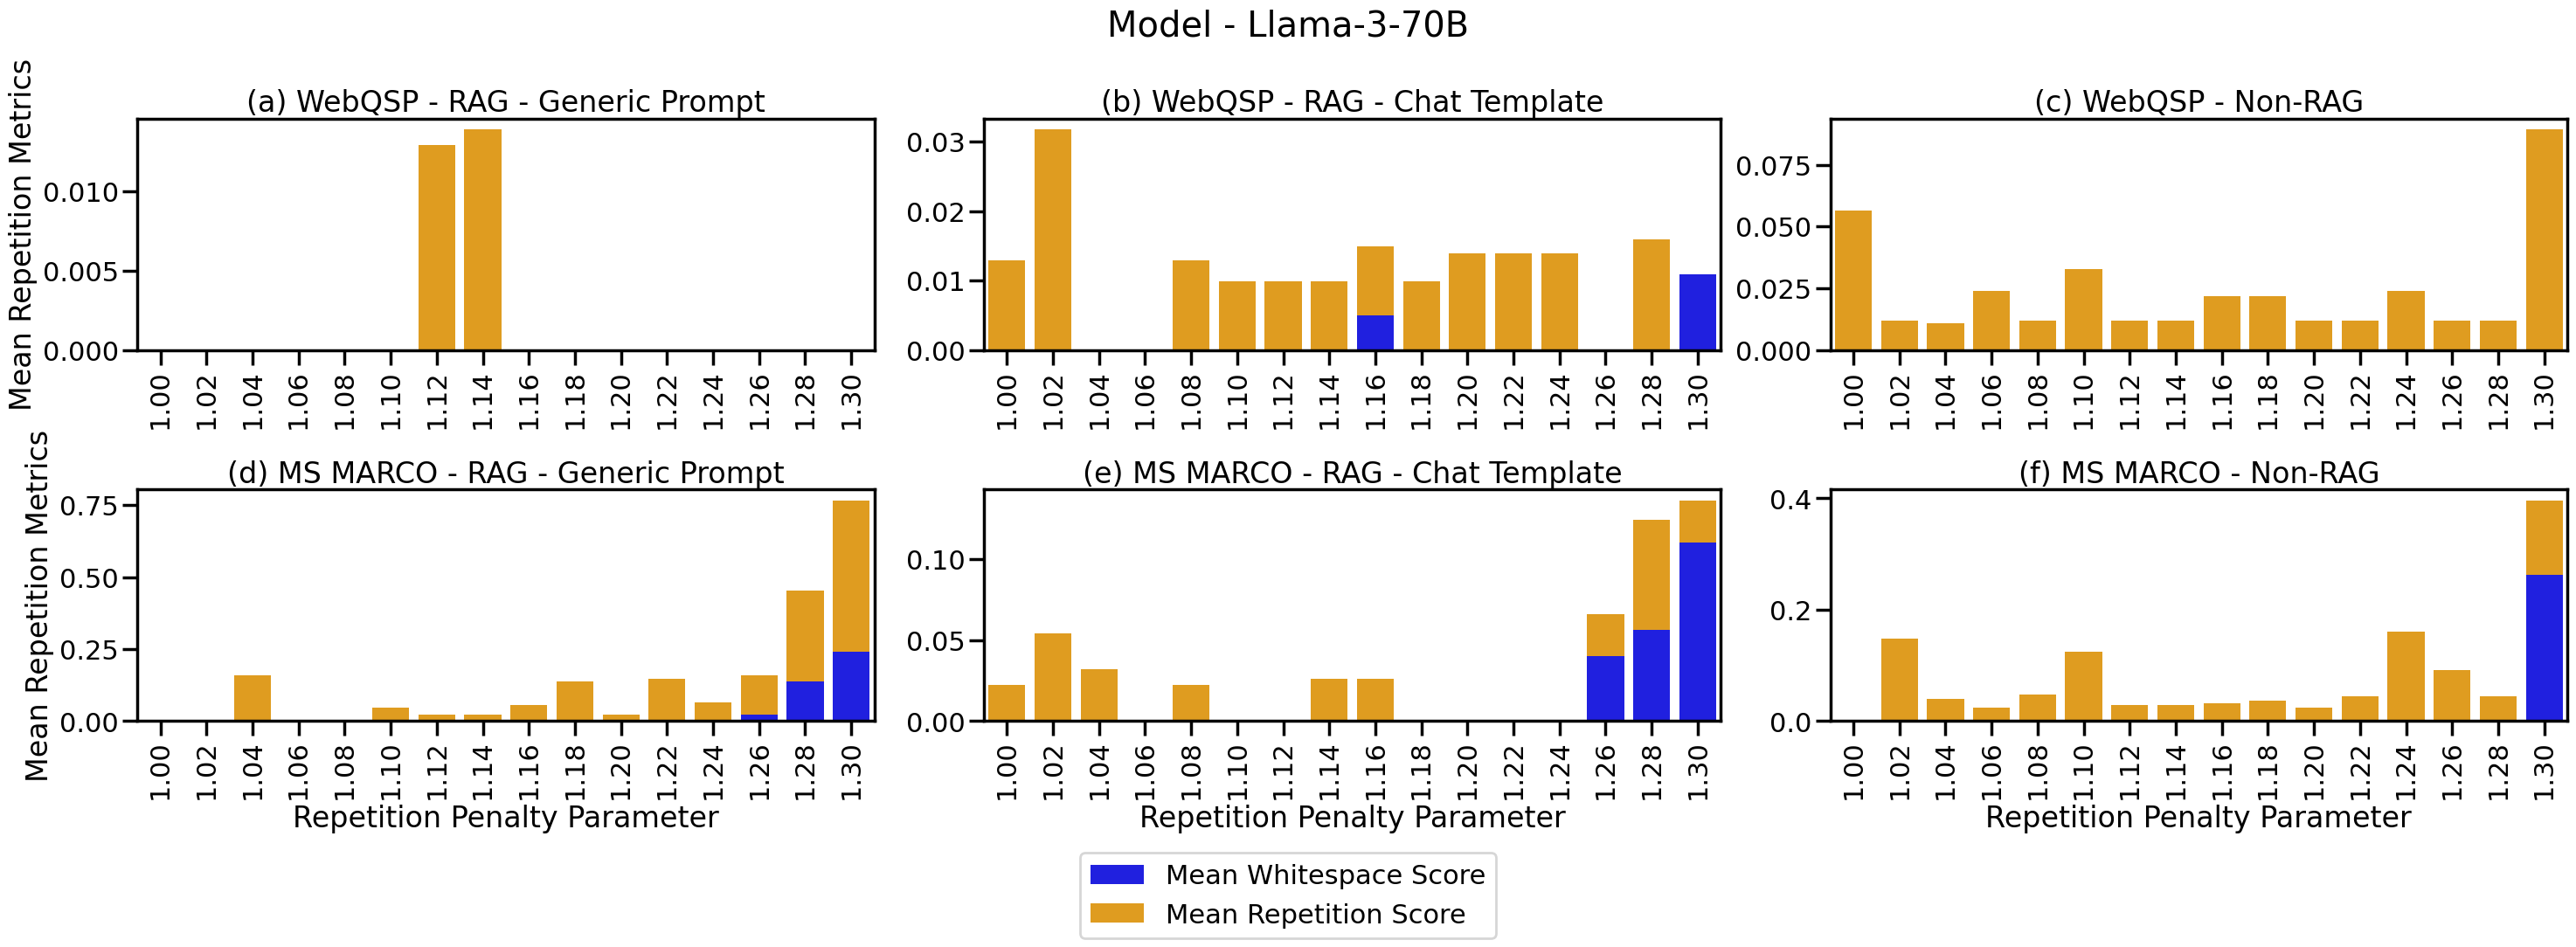

In [56]:
for model_name in model_names:
    print(f"Model: {model_name}")
    plot_detailed_repetitions(results, model_name)

In [57]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns


def plot_rpp_tuning(results, model_name=None, title=True):
    # make the font size bigger
    sns.set_context("poster")

    markers = ["D", "o", "s", "x", "P", "v", "X", "p", "*", "h"]
    colors = [
        "blue",
        "orange",
        "green",
        "red",
        "purple",
        "brown",
        "pink",
        "gray",
        "olive",
        "cyan",
    ]
    bar_colors = ["blue", "orange"]

    fig, ax = plt.subplots(2, 3, figsize=(30, 10))
    # print(f"ax: {ax.shape}")
    columns = ["perf", "rap"]

    for row, dataset_name in enumerate(results.keys()):
        for col, model_name_ext in enumerate(model_name_exts):
            for key in results[dataset_name].keys():
                if model_name not in key or model_name_ext not in key:
                    continue

                df = results[dataset_name][key]["df_overall"]
                # print(df.head())

                repetition_penalties = list(df["repetition_penalty"])

                for i, column in enumerate(columns):
                    # print(f"i: {i}, model_name_ext: {model_name_ext}, column: {column}")
                    sns.lineplot(
                        x="repetition_penalty",
                        y=column,
                        data=df,
                        ax=ax[row][col],
                        label=find_display_name(column, dataset_name),
                        marker=markers[i],
                        color=colors[i],
                        legend=False,
                    )

                    best_perf_index = df[column].idxmax()
                    ax[row][col].axvspan(
                        repetition_penalties[best_perf_index] - 0.01,
                        repetition_penalties[best_perf_index] + 0.01,
                        alpha=0.5,
                        edgecolor="none",
                        facecolor=bar_colors[i],
                    )

                twin = ax[row][col].twinx()
                sns.lineplot(
                    x="repetition_penalty",
                    y="total_repetitions",
                    data=df,
                    ax=twin,
                    label="Mean Total Repetitions",
                    marker=markers[2],
                    color=colors[2],
                    legend=False,
                )

                twin.set_ylabel("Mean Total Repetitions")

                xlabel = "Repetition Penalty Parameter" if row == 1 else None
                ax[row][col].set_xlabel(xlabel)

                ylabel = find_display_name(column, dataset_name, rap_only=False)
                ax[row][col].set_ylabel(ylabel)

                ax[row][col].set_title(
                    f"({chr(97 + row * 3 + col)}) {dataset_name} - {model_name_ext}"
                )
    if title:
        fig.suptitle(f"Model - {shorter(model_name)}")

    handles, labels = ax[row][col].get_legend_handles_labels()
    handles2, labels2 = twin.get_legend_handles_labels()
    labels[0] = "F1 or METEOR"
    labels[1] = "RAP-F1 or RAP-METEOR"
    fig.legend(
        handles + handles2,
        labels + labels2,
        bbox_to_anchor=(0.5, -0.13),
        loc="lower center",
    )

    # make the plot look nice
    plt.tight_layout()
    plt.show()

In [58]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns


def plot_all_models(results, dataset_name, legend=(0, 0)):
    # make the font size bigger
    sns.set_context("poster")

    markers = ["D", "o", "s", "x", "P", "v", "X", "p", "*", "h"]
    colors = [
        "blue",
        "orange",
        "green",
        "red",
        "purple",
        "brown",
        "pink",
        "gray",
        "olive",
        "cyan",
    ]
    fig, ax = plt.subplots(2, 3, figsize=(30, 13))
    # print(f"ax: {ax.shape}")
    columns = ["total_repetitions", "perf"]

    for col, model_name_ext in enumerate(model_name_exts):
        for index, model_name in enumerate(model_names):
            df = results[f"{model_name}({model_name_ext})"]["df_overall"]
            # print(df.head())
            for row, column in enumerate(columns):
                # print(f"key: {key}, model_name_ext: {model_name_ext}, column: {column}")
                sns.lineplot(
                    x="repetition_penalty",
                    y=column,
                    data=df,
                    ax=ax[row][col],
                    label=shorter(model_name),
                    marker=markers[index],
                    color=colors[index],
                    legend=row == legend[0] and col == legend[1],
                )
                xlabel = "Repetition Penalty Parameter" if row == 1 else None
                ax[row][col].set_xlabel(xlabel)

                ylabel = find_display_name(column, dataset_name)
                ax[row][col].set_ylabel(ylabel)

                ax[row][col].set_title(
                    f"({chr(97 + row * 3 + col)}) {dataset_name} - {model_name_ext}"
                )

    # fig.suptitle(dataset_name)

    handles, labels = ax[row][col].get_legend_handles_labels()
    # fig.legend(handles, labels, bbox_to_anchor=(0.5, -0.2), loc="lower center")

    # make the plot look nice
    plt.tight_layout()
    plt.show()

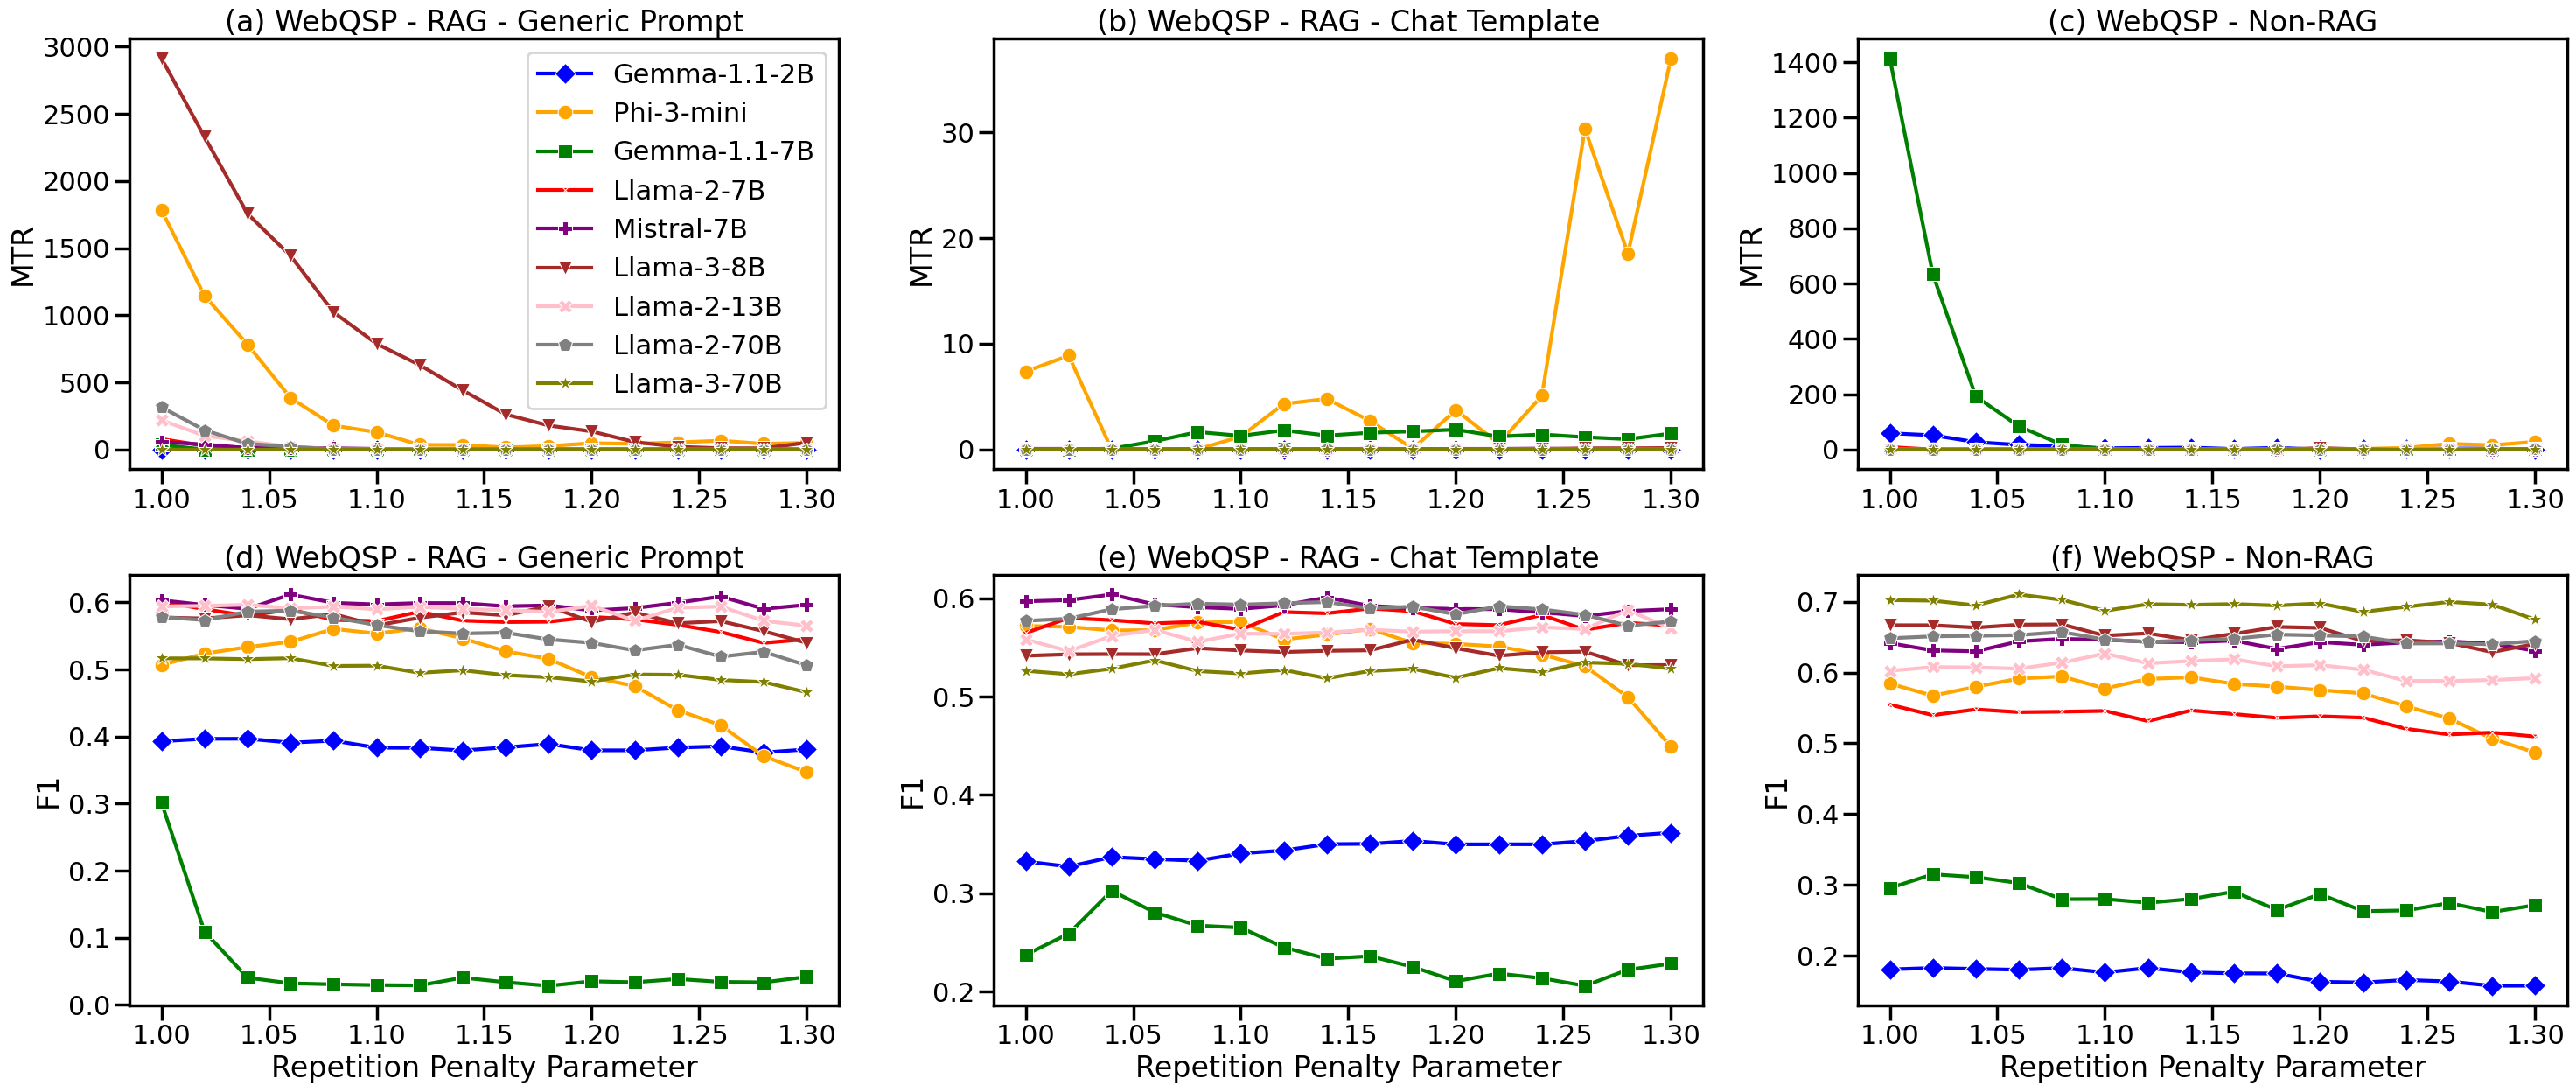

In [59]:
plot_all_models(webqsp_result, "WebQSP")

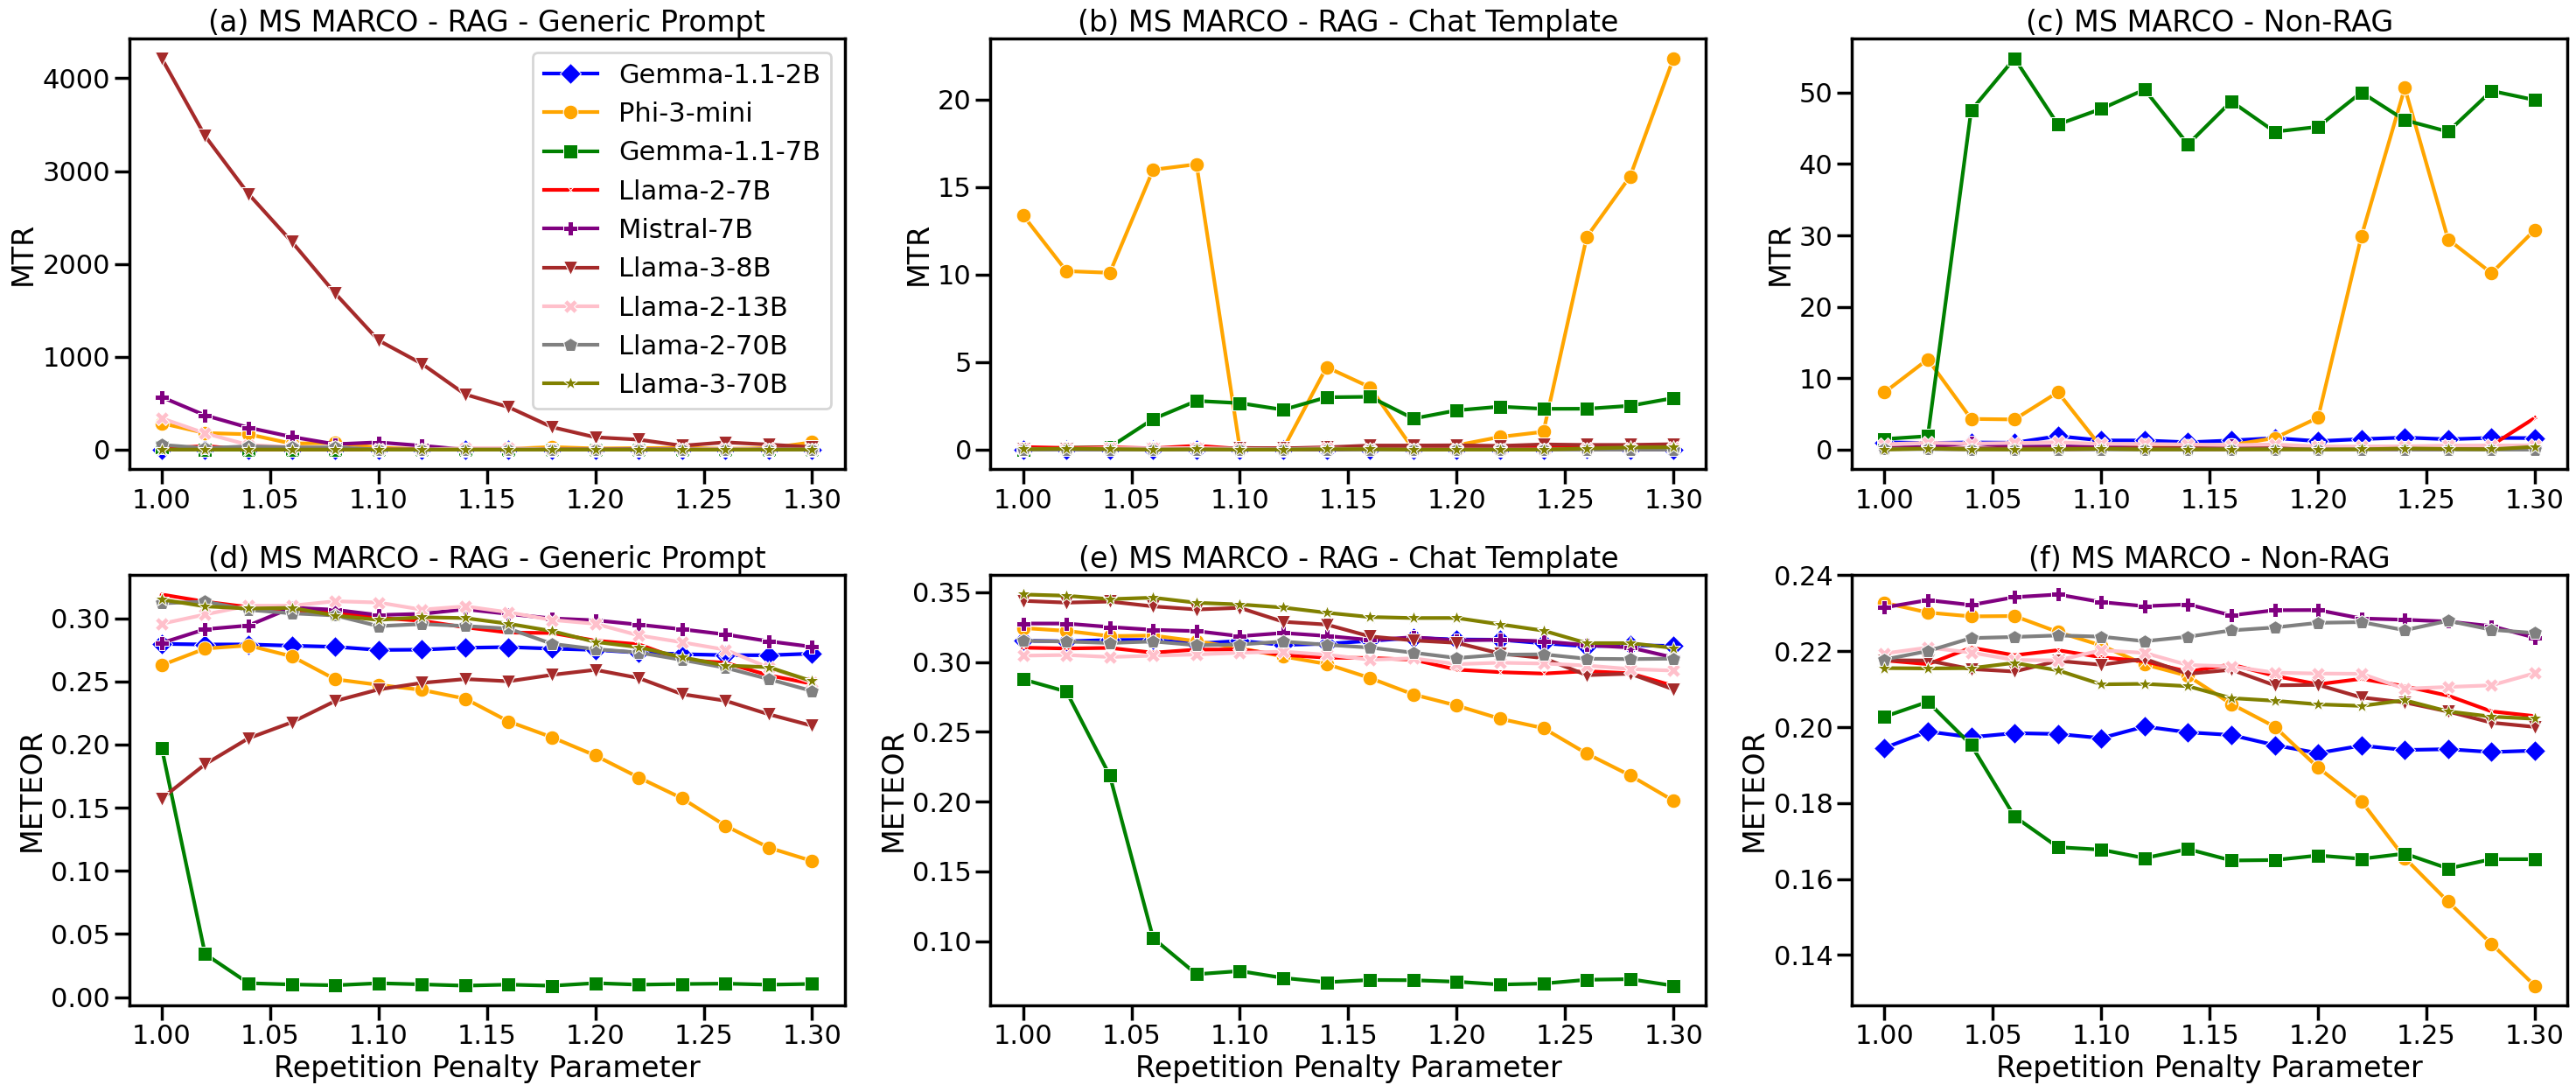

In [60]:
plot_all_models(ms_marco_result, "MS MARCO")

In [61]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns


def plot_rpp_tuning(results, model_name=None, title=True):
    # make the font size bigger
    sns.set_context("poster")

    markers = ["D", "o", "s", "x", "P", "v", "X", "p", "*", "h"]
    colors = [
        "blue",
        "orange",
        "green",
        "red",
        "purple",
        "brown",
        "pink",
        "gray",
        "olive",
        "cyan",
    ]
    bar_colors = ["blue", "orange"]

    fig, ax = plt.subplots(2, 3, figsize=(30, 10))
    # print(f"ax: {ax.shape}")
    columns = ["perf", "rap"]

    for row, dataset_name in enumerate(results.keys()):
        for col, model_name_ext in enumerate(model_name_exts):
            for key in results[dataset_name].keys():
                if model_name not in key or model_name_ext not in key:
                    continue

                df = results[dataset_name][key]["df_overall"]
                # print(df.head())

                repetition_penalties = list(df["repetition_penalty"])

                for i, column in enumerate(columns):
                    # print(f"i: {i}, model_name_ext: {model_name_ext}, column: {column}")
                    sns.lineplot(
                        x="repetition_penalty",
                        y=column,
                        data=df,
                        ax=ax[row][col],
                        label=find_display_name(column, dataset_name),
                        marker=markers[i],
                        color=colors[i],
                        legend=False,
                    )

                    best_perf_index = df[column].idxmax()
                    ax[row][col].axvspan(
                        repetition_penalties[best_perf_index] - 0.01,
                        repetition_penalties[best_perf_index] + 0.01,
                        alpha=0.5,
                        edgecolor="none",
                        facecolor=bar_colors[i],
                    )

                twin = ax[row][col].twinx()
                sns.lineplot(
                    x="repetition_penalty",
                    y="total_repetitions",
                    data=df,
                    ax=twin,
                    label="Mean Total Repetitions",
                    marker=markers[2],
                    color=colors[2],
                    legend=False,
                )

                twin.set_ylabel("Mean Total Repetitions")

                xlabel = "Repetition Penalty Parameter" if row == 1 else None
                ax[row][col].set_xlabel(xlabel)

                ylabel = find_display_name(column, dataset_name, rap_only=False)
                ax[row][col].set_ylabel(ylabel)

                ax[row][col].set_title(
                    f"({chr(97 + row * 3 + col)}) {dataset_name} - {model_name_ext}"
                )
    if title:
        fig.suptitle(f"Model - {shorter(model_name)}")

    handles, labels = ax[row][col].get_legend_handles_labels()
    handles2, labels2 = twin.get_legend_handles_labels()
    labels[0] = "F1 or METEOR"
    labels[1] = "RAP-F1 or RAP-METEOR"
    fig.legend(
        handles + handles2,
        labels + labels2,
        bbox_to_anchor=(0.5, -0.13),
        loc="lower center",
    )

    # make the plot look nice
    plt.tight_layout()
    plt.show()

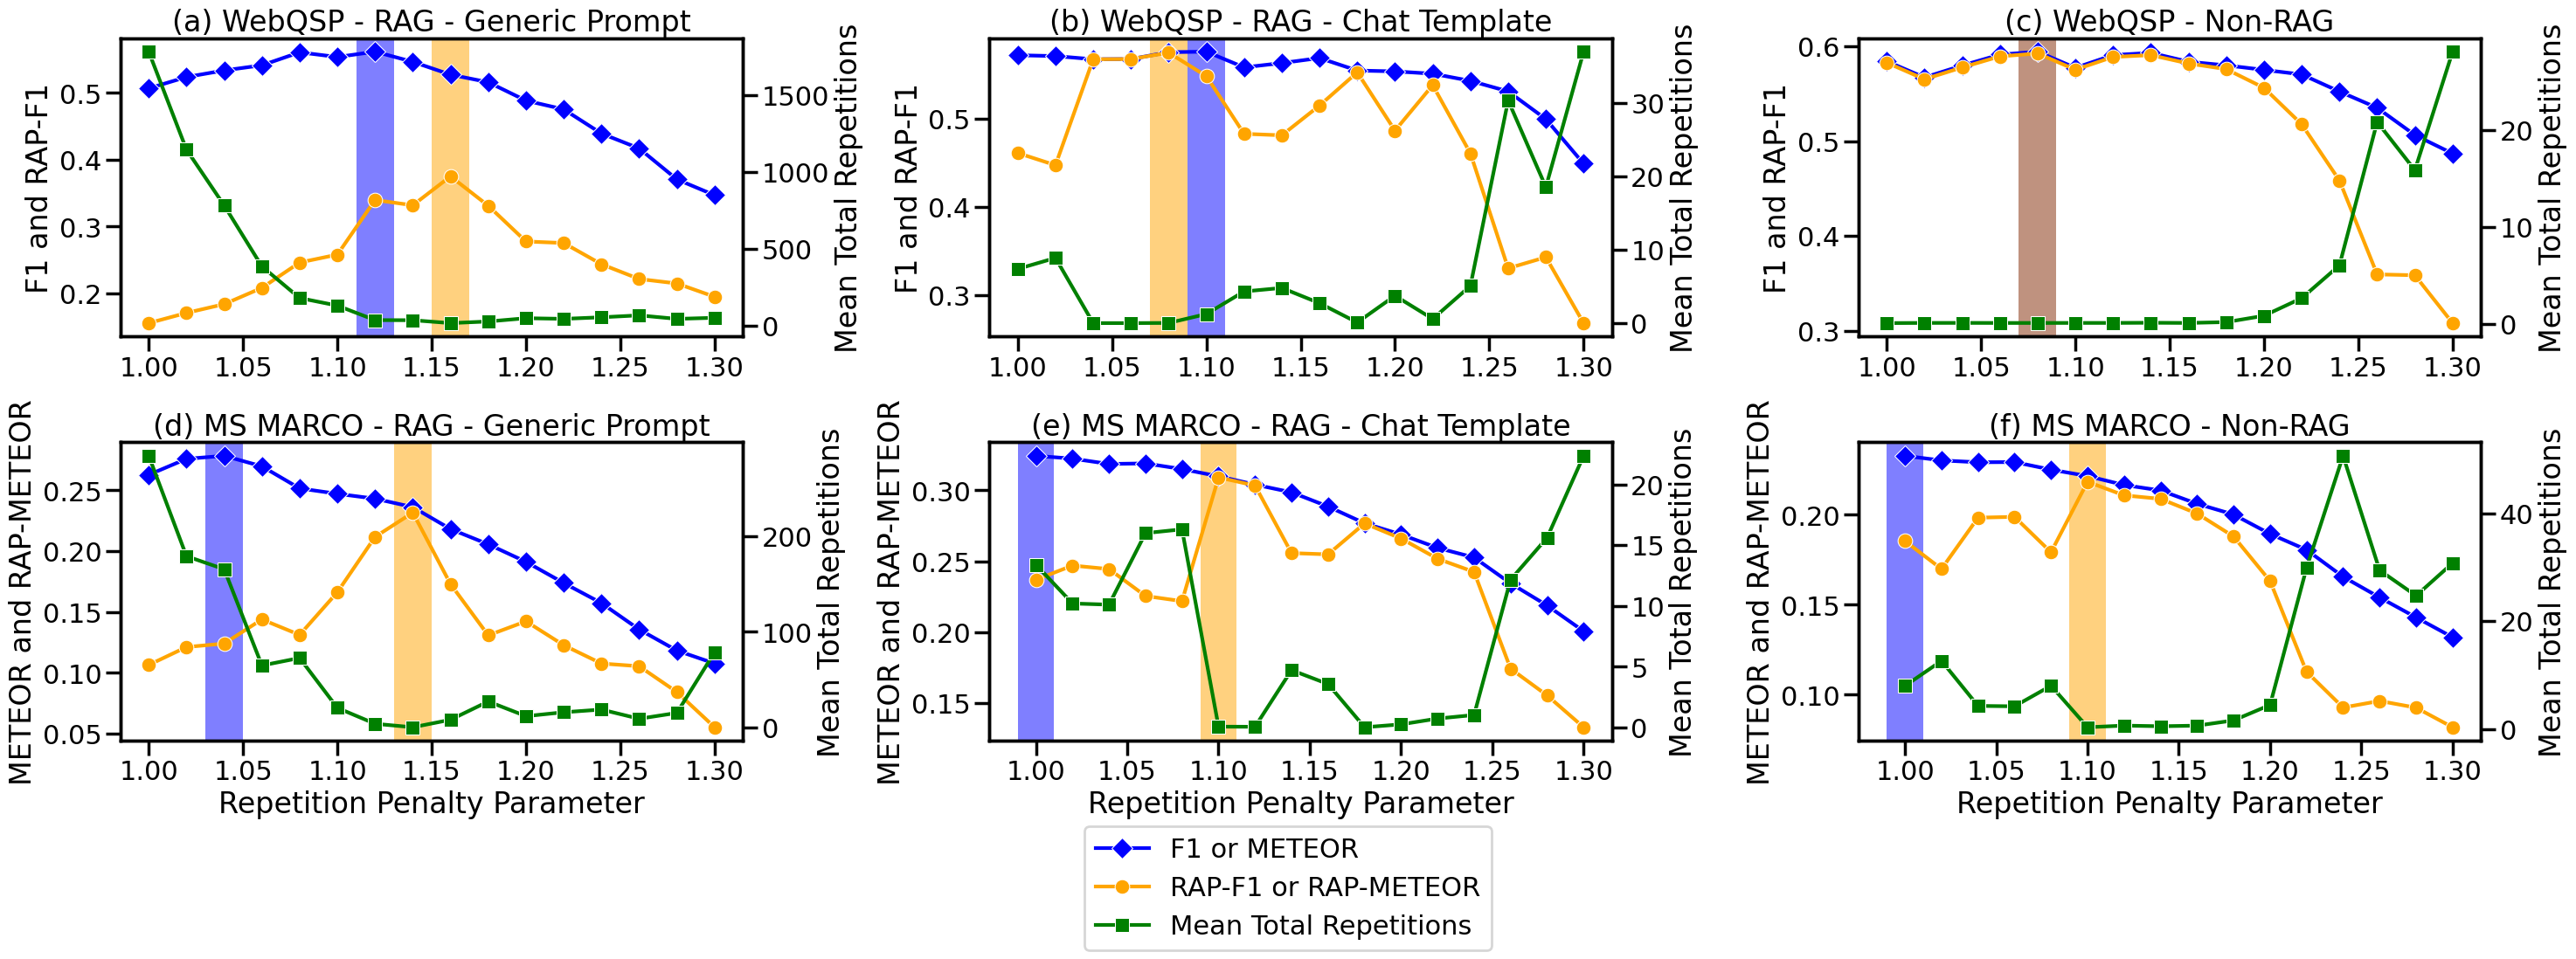

In [62]:
plot_rpp_tuning(results, "Phi-3-mini-128k-instruct", title=False)

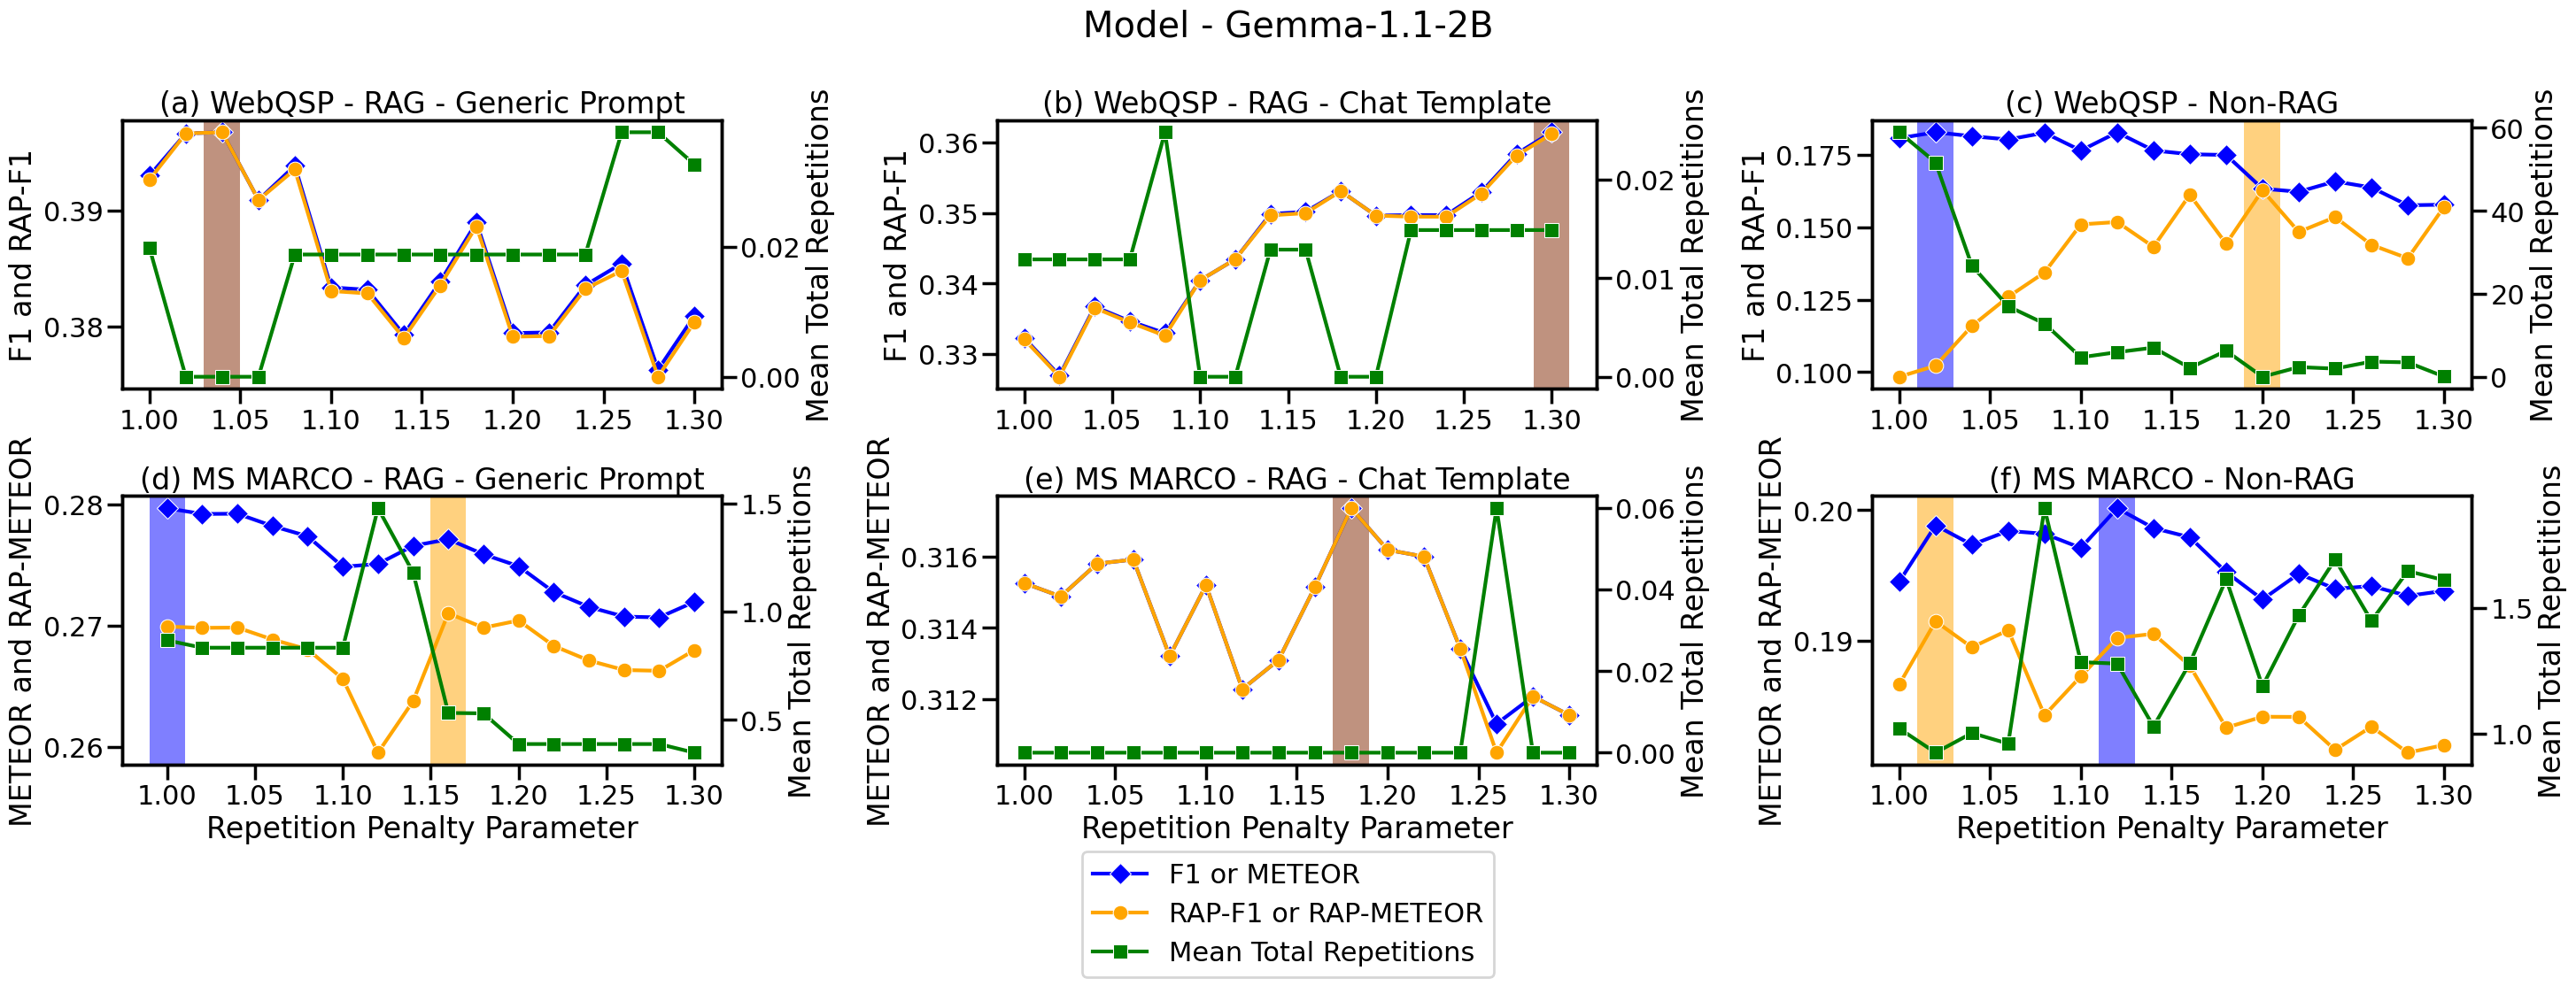

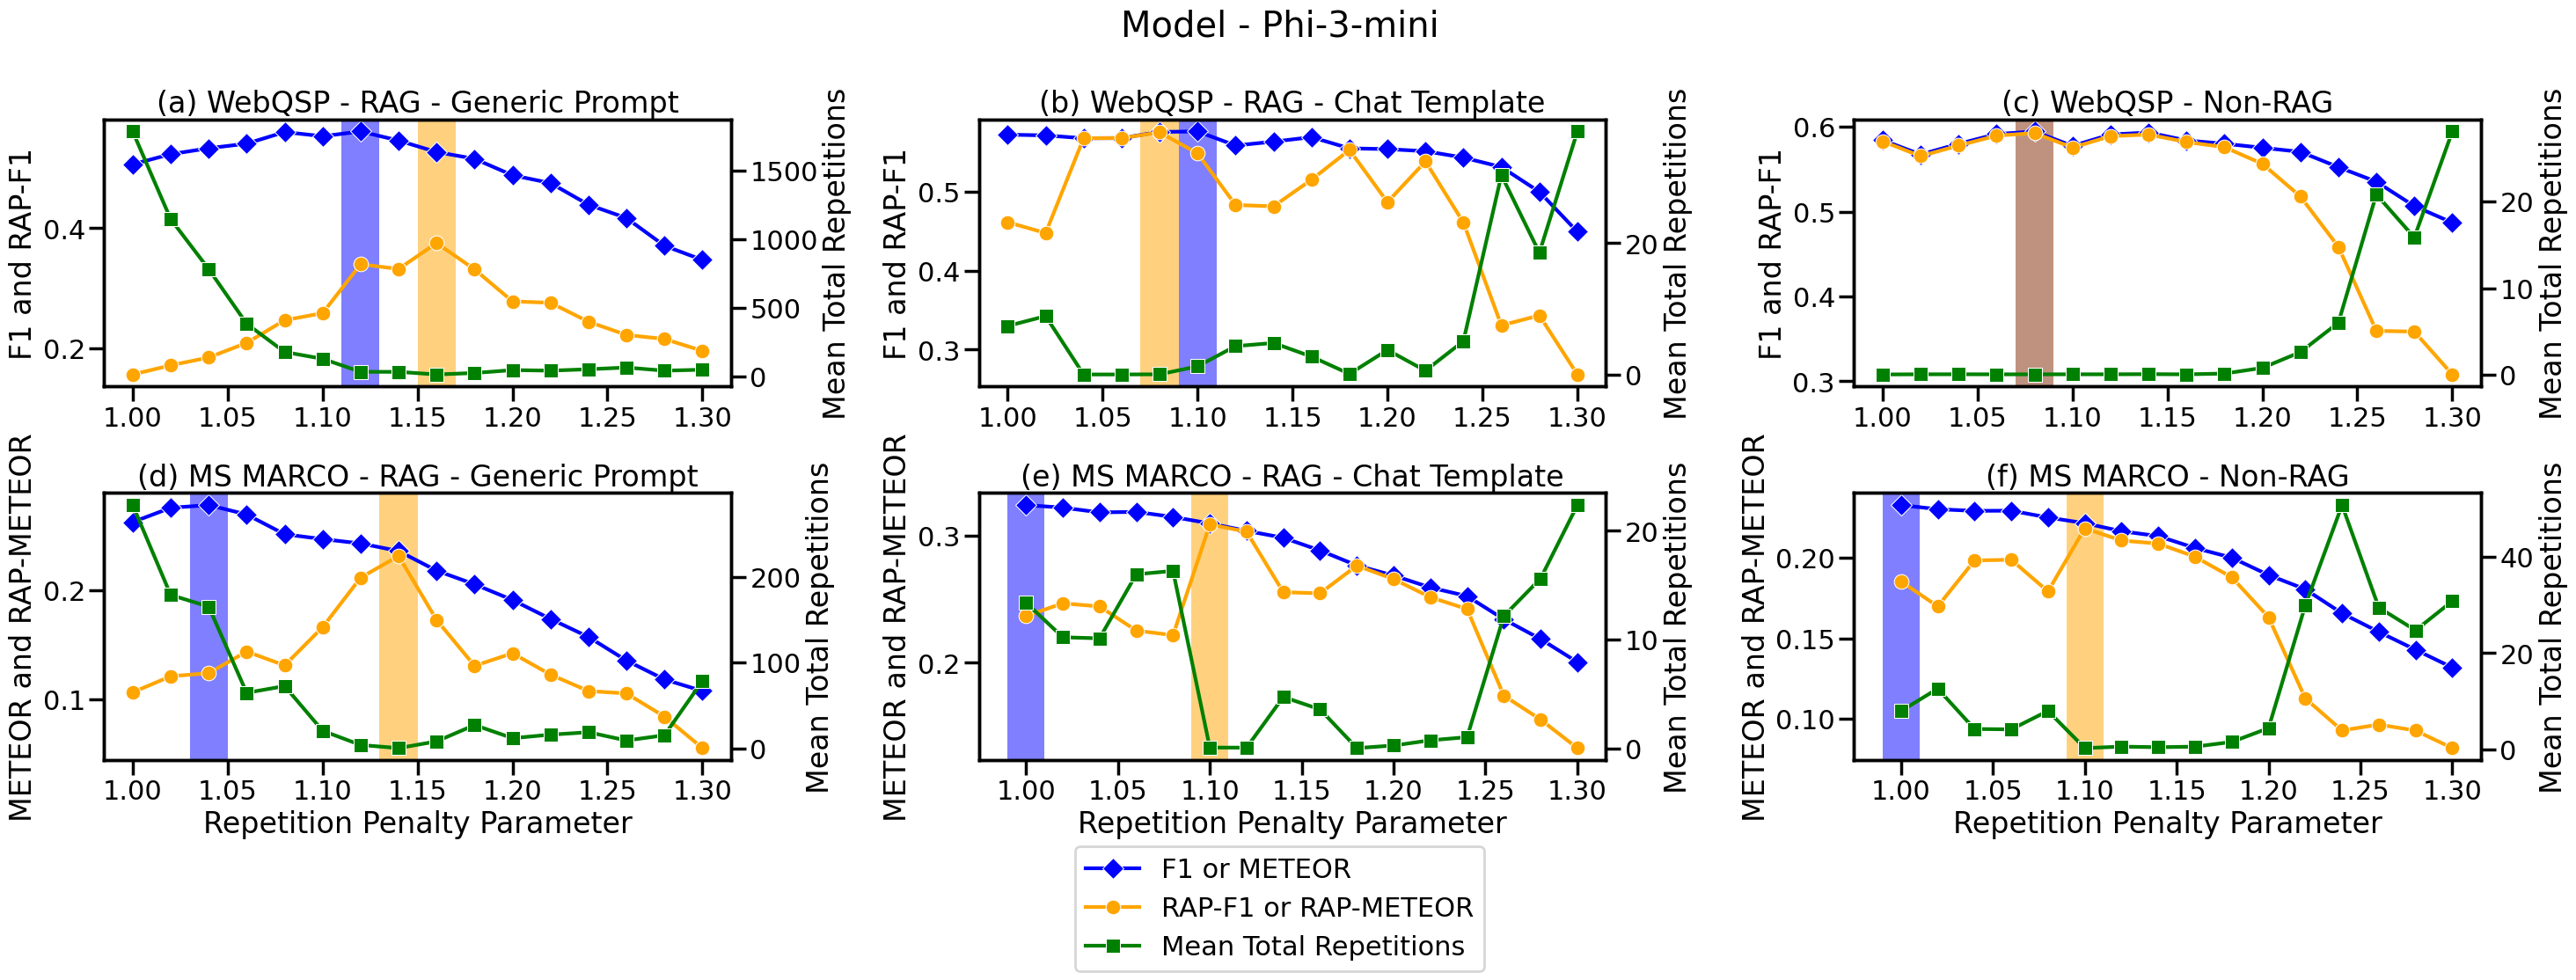

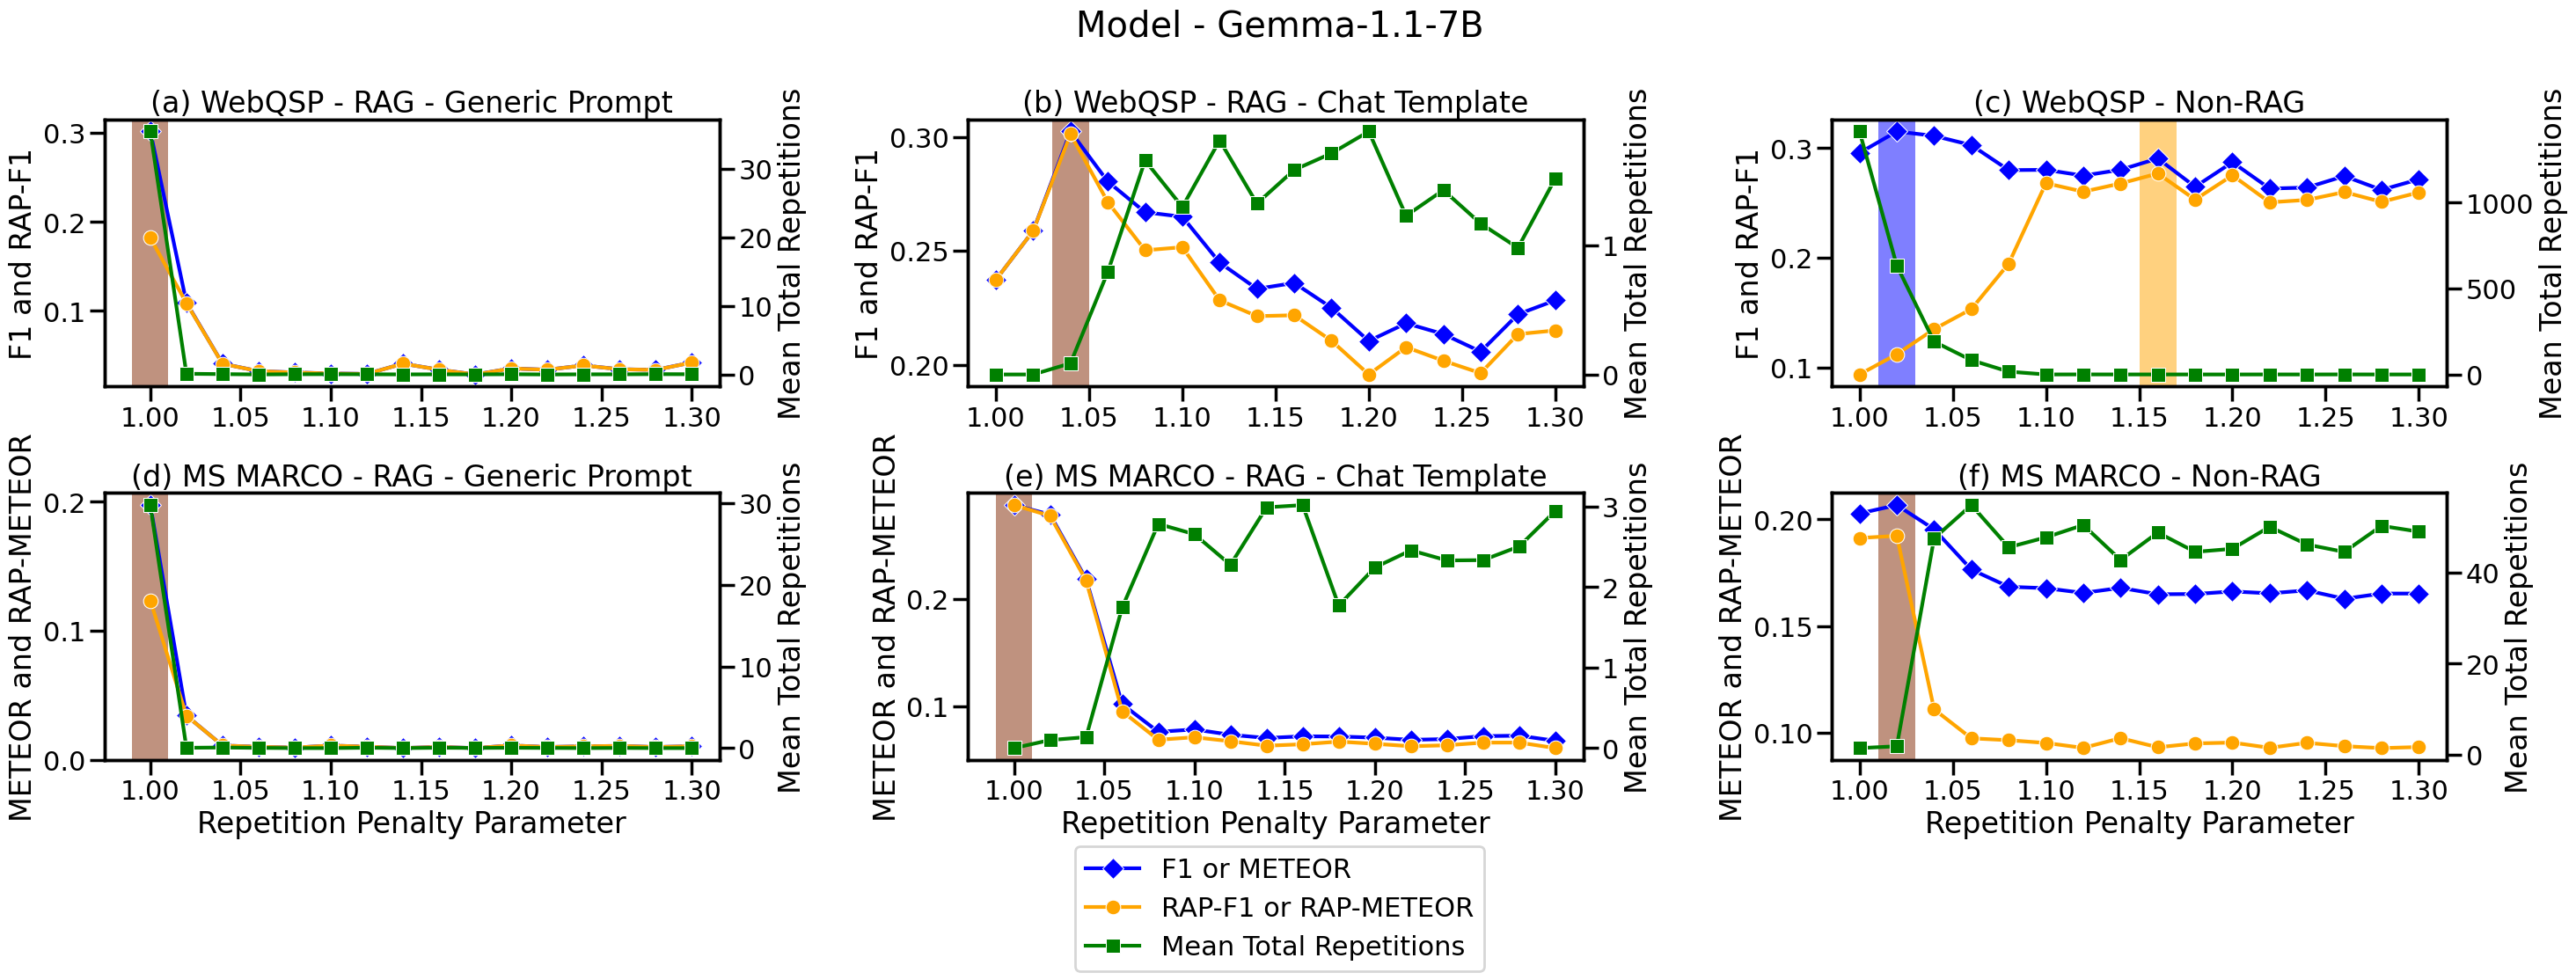

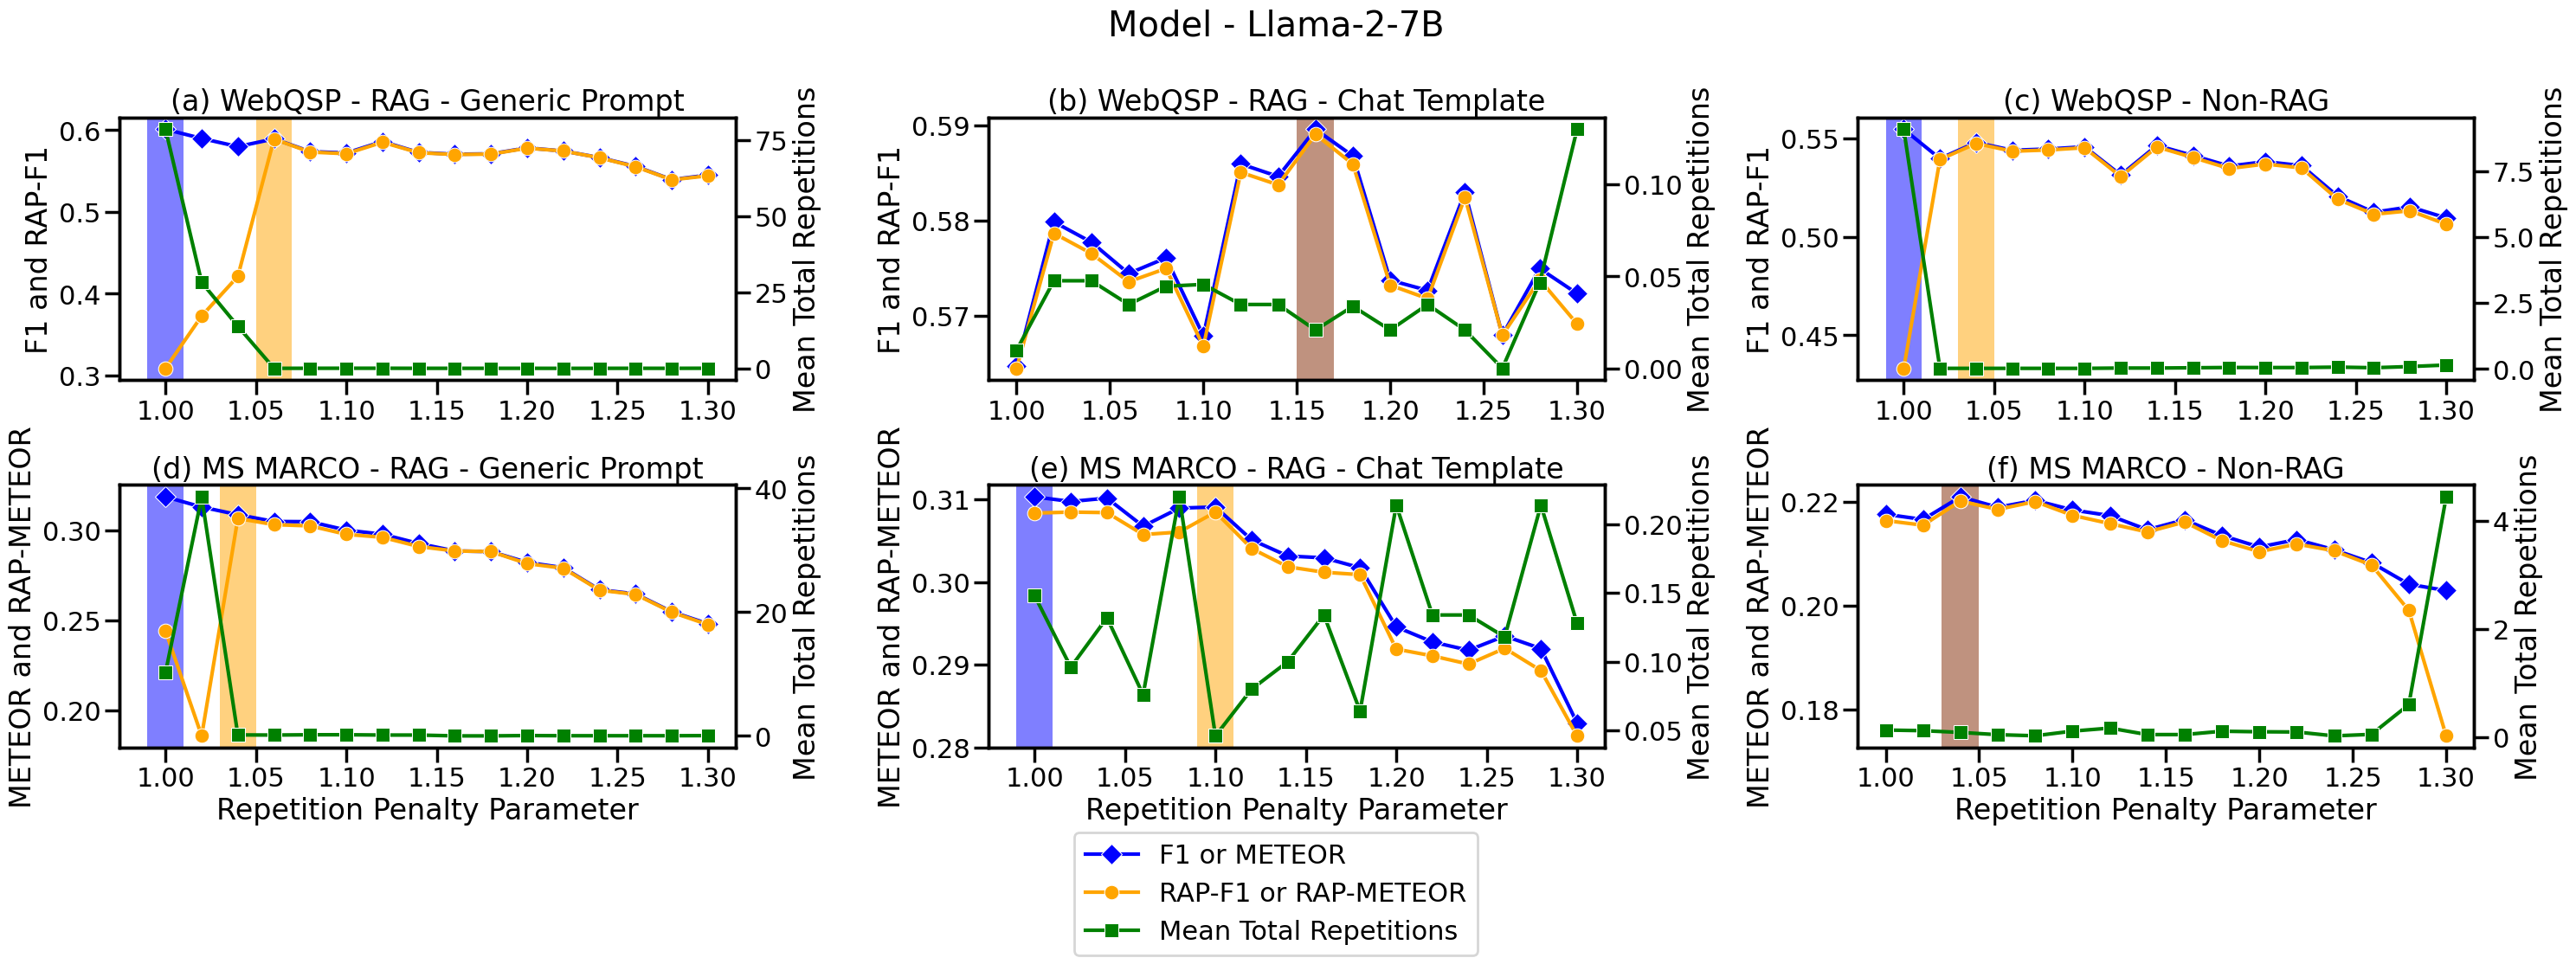

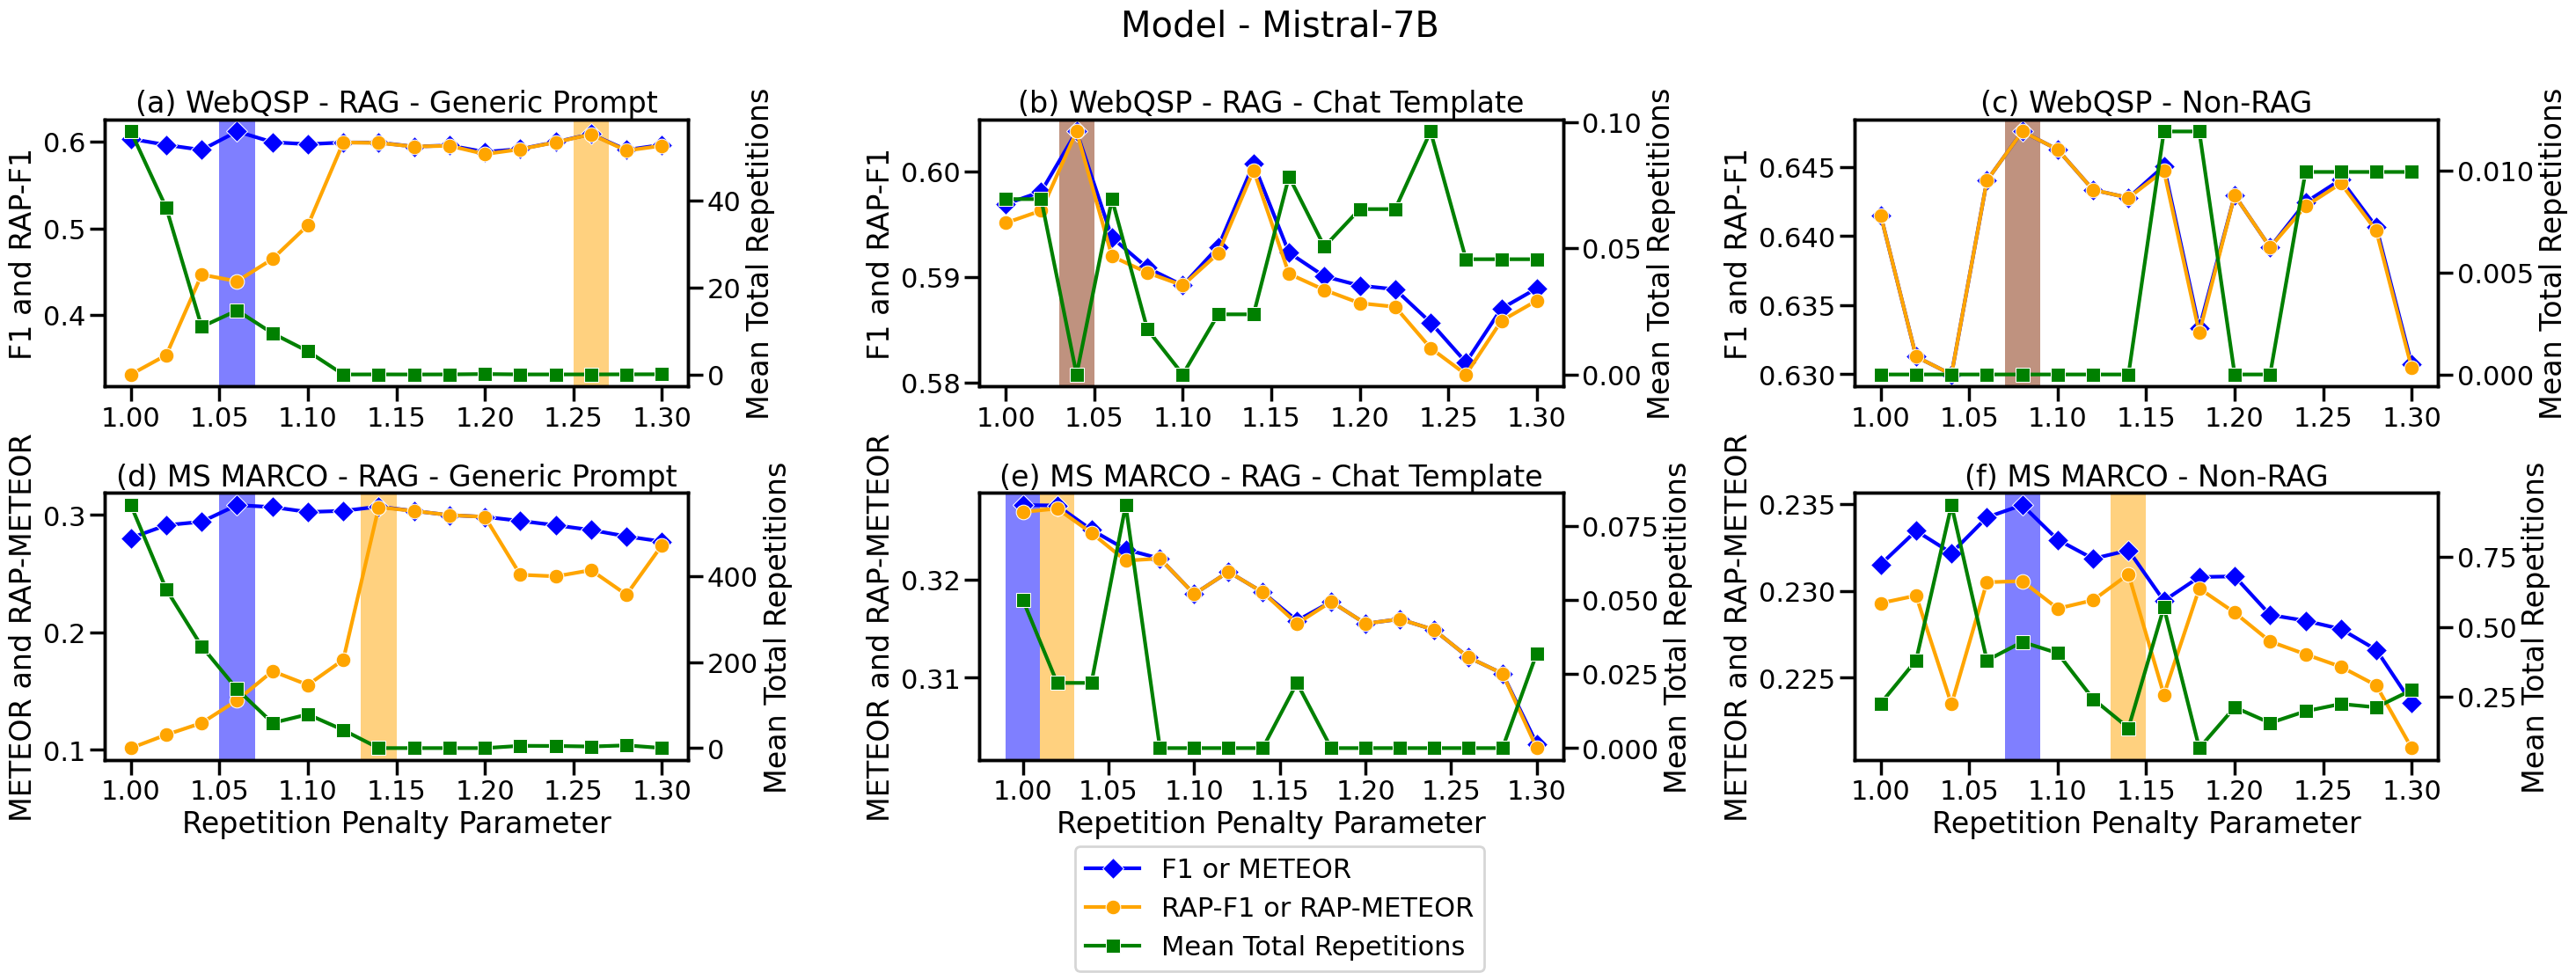

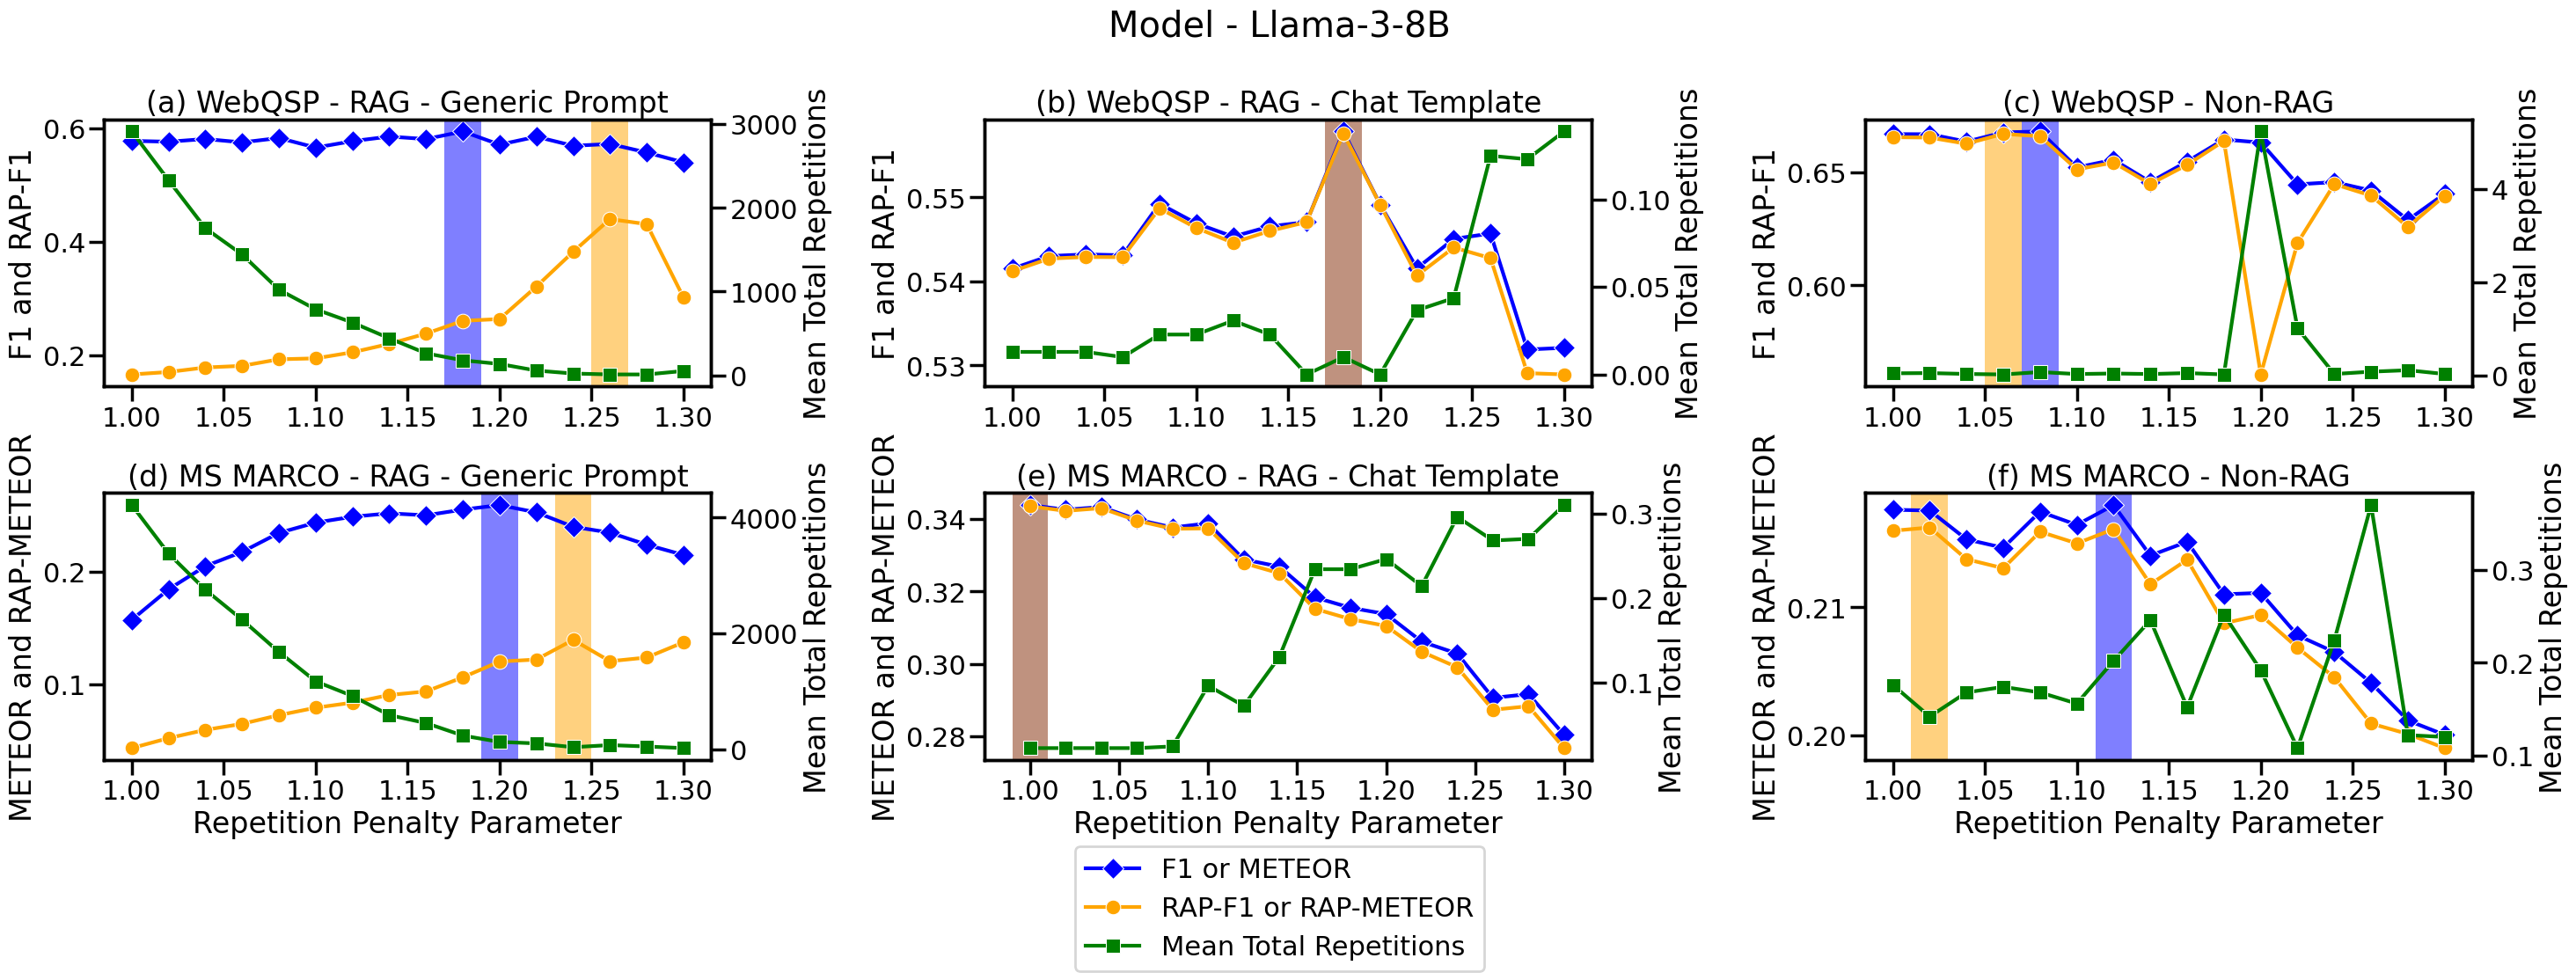

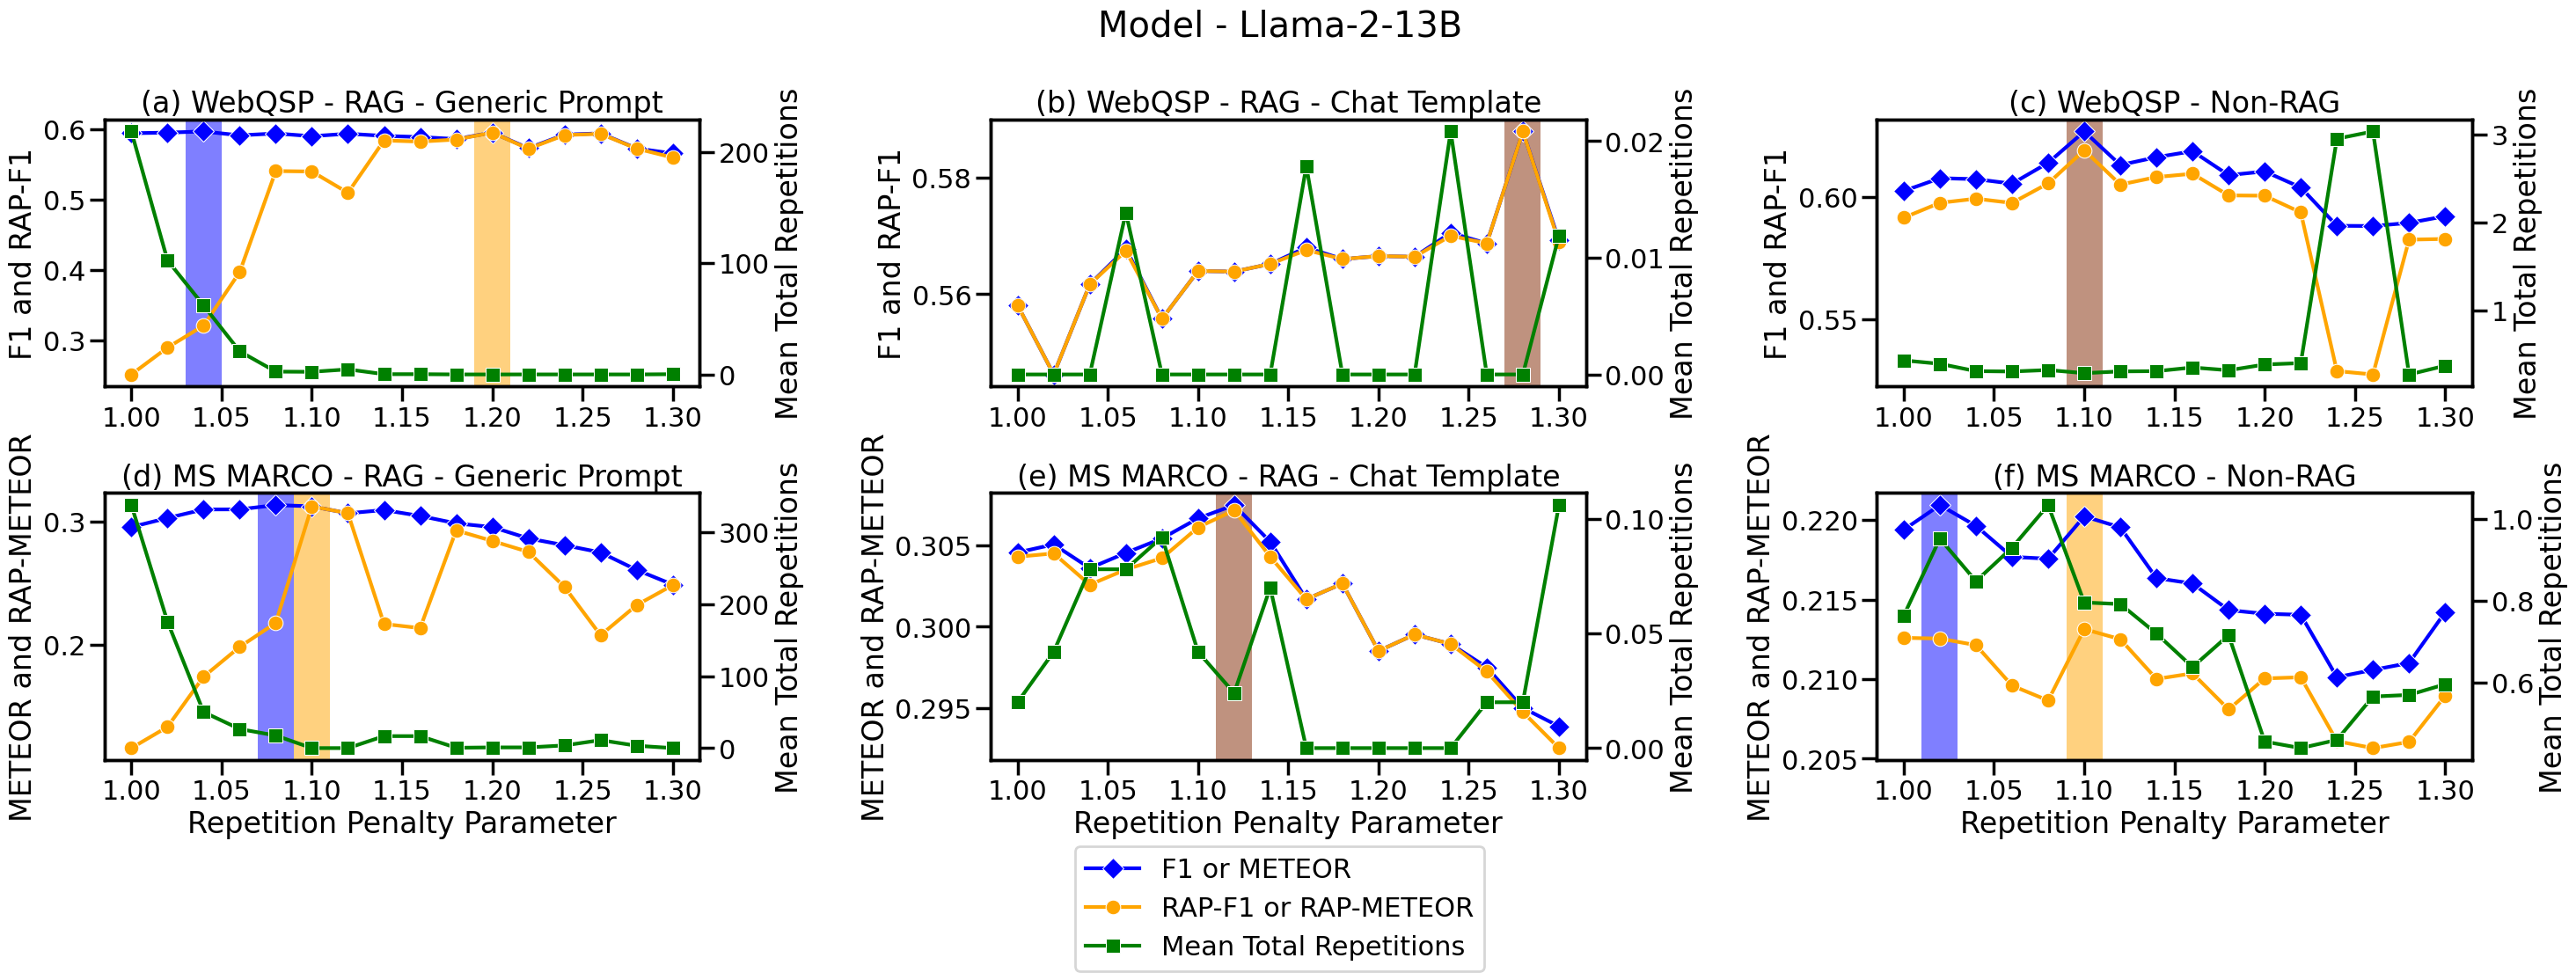

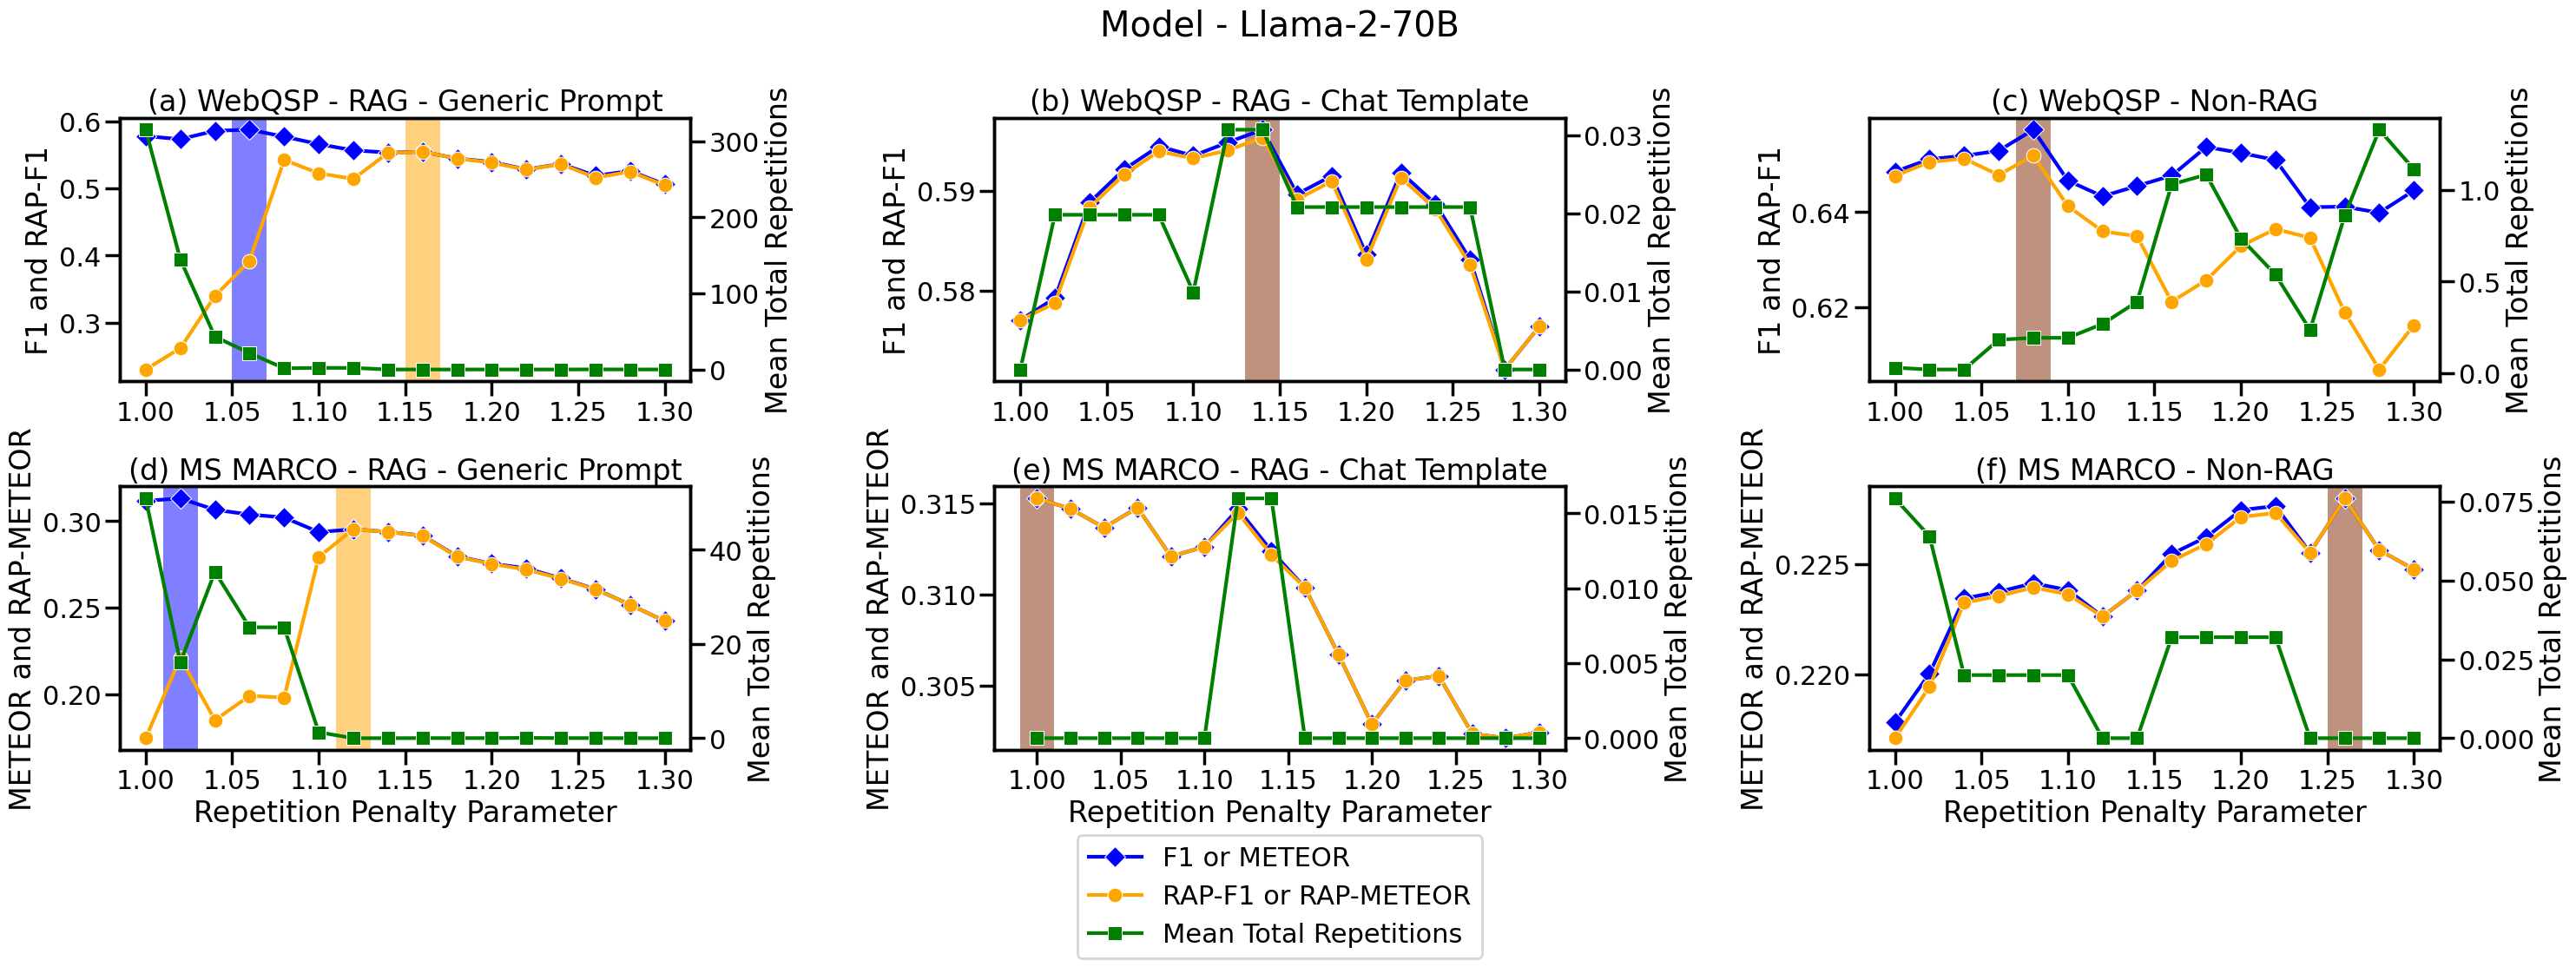

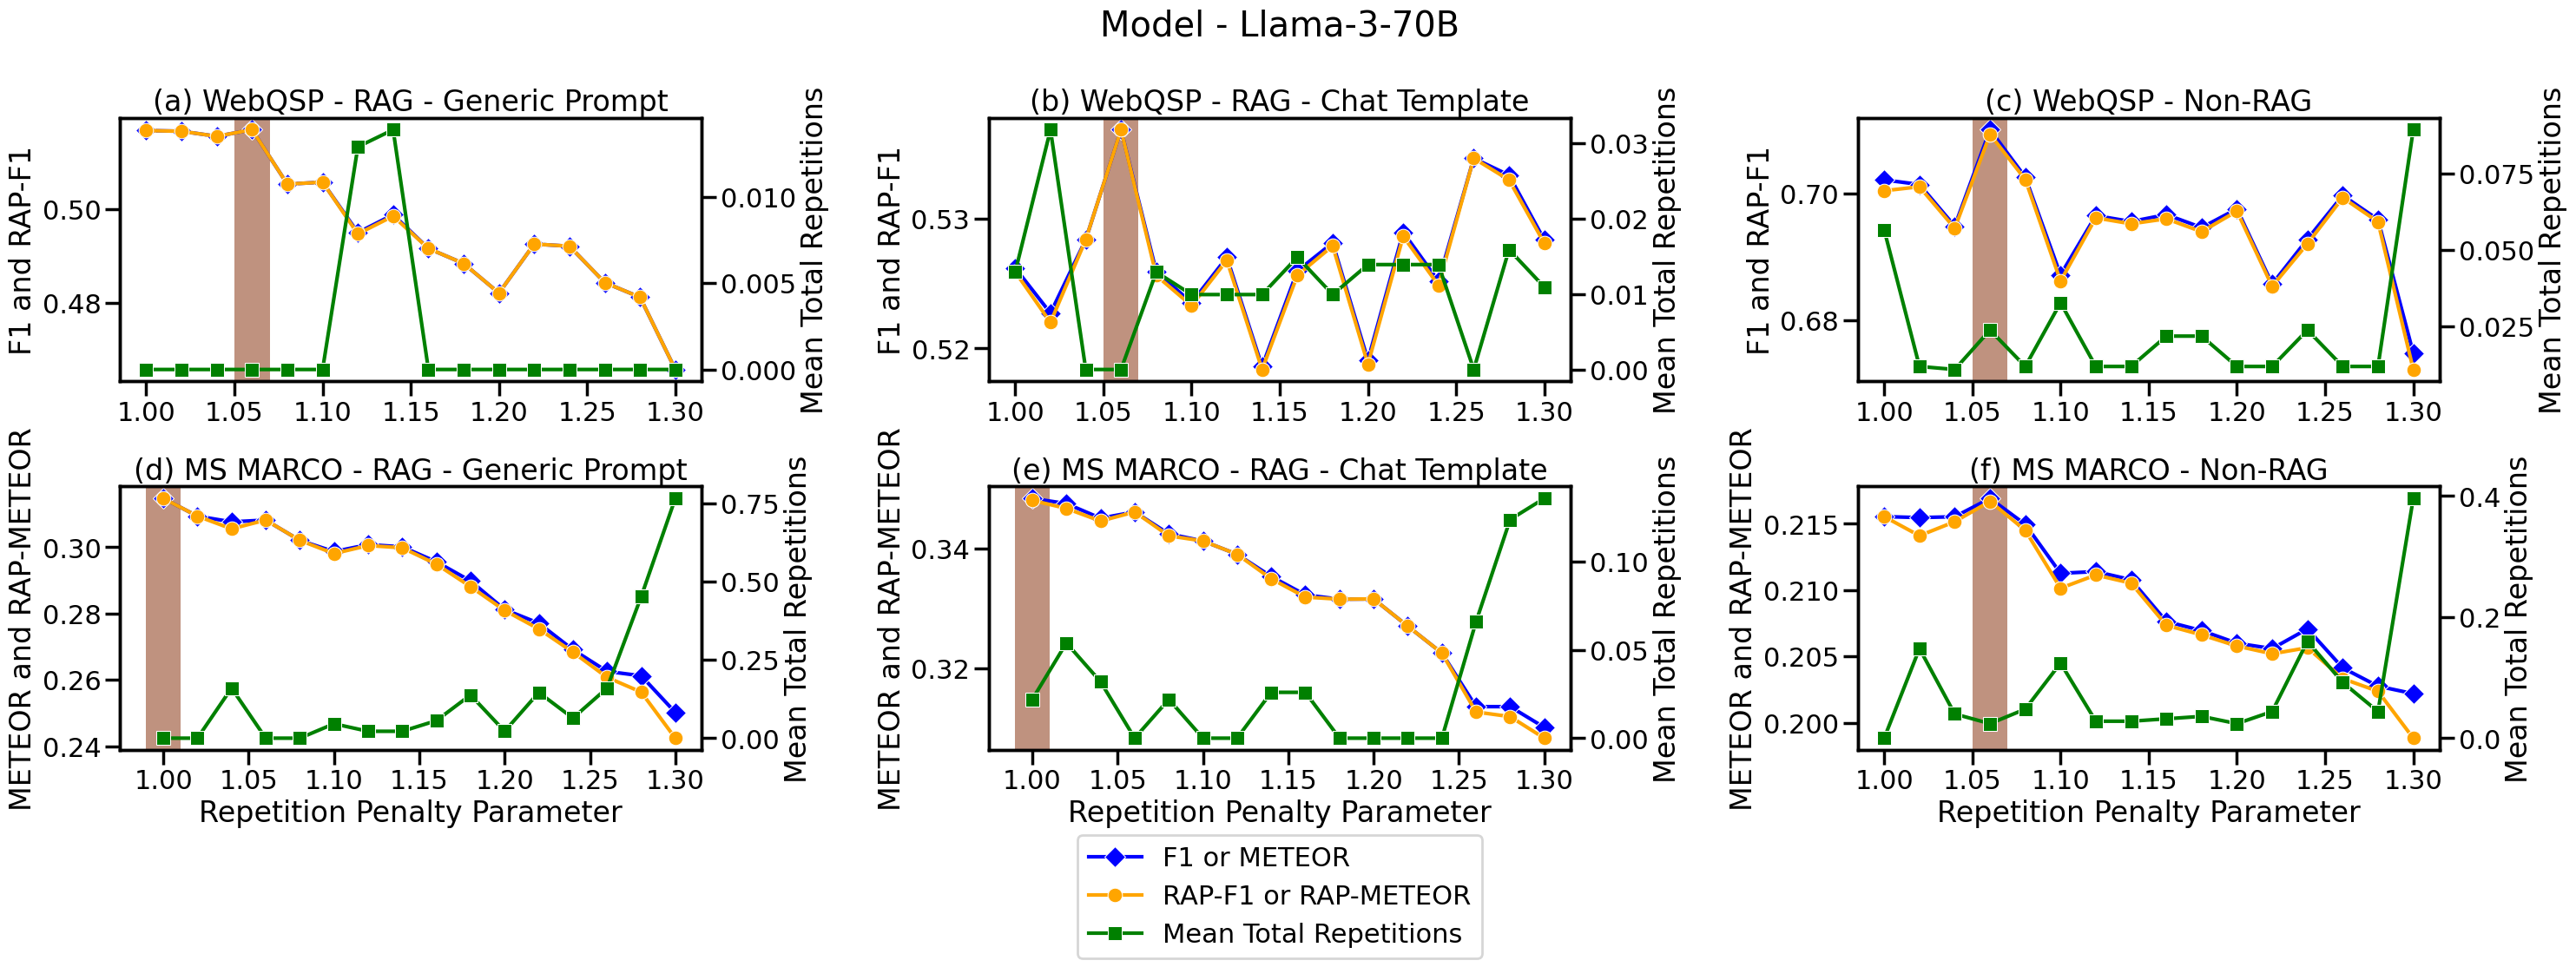

In [63]:
for model_name in model_names:
    plot_rpp_tuning(results, model_name)